# AIce Breakers

In [2]:
# Import relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.formula.api import ols

### 1) Collect the data
##### Basic data cleaning completed in excel before importing to Python for exploration and analysis

In [4]:
# Import data as dataframe
sd = pd.read_excel('Dataset_consolidated_11.05.2025.xlsx')

In [5]:
sd.head()

year     province town_city  post_code  company_code  \
0  2021.0  Guadalajara   ALOVERA    19208.0        5561.0   
1  2021.0  Guadalajara   ALOVERA    19208.0        5561.0   
2  2021.0  Guadalajara   ALOVERA    19208.0        5561.0   
3  2021.0  Guadalajara   ALOVERA    19208.0        5561.0   
4  2021.0  Guadalajara   ALOVERA    19208.0        5561.0   

   petrol_station_code petrol_station       date  sold_units day_of_the_week  \
0                459.0        ALOVERA 2021-01-03         1.0          Sunday   
1                459.0        ALOVERA 2021-01-27         2.0       Wednesday   
2                459.0        ALOVERA 2021-02-14         1.0          Sunday   
3                459.0        ALOVERA 2021-02-27         1.0        Saturday   
4                459.0        ALOVERA 2021-03-06         2.0        Saturday   

   ...  tavg  tmin  tmax prcp  snow   wdir  wspd wpgt    pres  \
0  ...   2.2  -1.8   7.8  0.0   NaN  267.0  11.4  NaN  1017.0   
1  ...  13.0   9.7  17.8  0.0   NaN  275.0   9.6  NaN  1025.2   
2  ...   9.8   5.0  14.6  0.0   NaN   67.0   5.7  NaN  1029.6   
3  ...  12.4   7.5  18.2  0.0   NaN   46.0   9.7  NaN  1025.1   
4  ...  11.3   9.1  14.8  0.0   NaN   73.0   8.6  NaN  1019.9   

   tmax__35_or_above  
0                0.0  
1                0.0  
2                0.0  
3                0.0  
4                0.0  

[5 rows x 33 columns]

### 2) Explore the data

#### a) Overview of the data
##### Summary:
- The data runs from 1st Jan 2021 to 14th December 2022
- There are large variations in the number of entries per day (min: 11 on 12th Jan 2021 to 88 on 14th August 2021

In [8]:
# Describe the data
sd.describe()

year     post_code  company_code  petrol_station_code  \
count  38699.000000  38699.000000  38699.000000         38698.000000   
mean    2021.478539  28924.441407  46094.684591          1231.106672   
min     2021.000000  19004.000000    652.000000             1.000000   
25%     2021.000000  28035.000000  12400.000000           896.000000   
50%     2021.000000  28260.000000  34083.000000          1296.000000   
75%     2022.000000  28801.000000  96177.000000          1768.000000   
max     2022.000000  45529.000000  97142.000000          1991.000000   
std        0.499546   4351.265438  36132.844147           562.233333   

                                date    sold_units   week_number  \
count                          38699  38699.000000  38699.000000   
mean   2021-12-25 09:57:53.671154432      7.254451     26.812786   
min              2021-01-01 00:00:00    -20.000000      1.000000   
25%              2021-07-07 00:00:00      2.000000     17.000000   
50%              2021-12-16 00:00:00      3.000000     27.000000   
75%              2022-06-26 00:00:00      8.000000     37.000000   
max              2022-12-14 00:00:00    229.000000     53.000000   
std                              NaN     11.169286     13.439621   

              month  season_weight  distance_madrid_km  ...          tavg  \
count  38699.000000   38699.000000        38699.000000  ...  38699.000000   
mean       6.592289       2.740717           25.203481  ...     17.827008   
min        1.000000       1.000000            3.300000  ...     -3.200000   
25%        4.000000       2.000000           10.400000  ...     10.700000   
50%        7.000000       3.000000           22.700000  ...     17.900000   
75%        9.000000       4.000000           37.800000  ...     24.700000   
max       12.000000       4.000000           64.000000  ...     33.700000   
std        3.088506       1.109215           16.315946  ...      7.903458   

               tmin          tmax          prcp  snow         wdir  \
count  38699.000000  38699.000000  38699.000000   0.0  38511.00000   
mean      12.853792     23.490560      1.318771   NaN    157.95191   
min       -7.400000      0.300000      0.000000   NaN      1.00000   
25%        7.300000     15.500000      0.000000   NaN     48.00000   
50%       13.100000     23.700000      0.000000   NaN    152.00000   
75%       18.300000     31.300000      0.000000   NaN    251.00000   
max       26.200000     40.700000     67.700000   NaN    359.00000   
std        6.805019      9.097784      5.338327   NaN    108.32342   

               wspd  wpgt          pres  tmax__35_or_above  
count  38511.000000   0.0  38511.000000       38699.000000  
mean      10.402680   NaN   1017.437493           0.131528  
min        3.500000   NaN   1001.000000           0.000000  
25%        7.800000   NaN   1014.000000           0.000000  
50%       10.000000   NaN   1016.400000           0.000000  
75%       12.200000   NaN   1020.400000           0.000000  
max       23.900000   NaN   1034.100000           1.000000  
std        3.649942   NaN      5.334306           0.337981  

[8 rows x 25 columns]

In [9]:
# Check for missing values and datatypes using .info
sd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38700 entries, 0 to 38699
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   year                  38699 non-null  float64       
 1   province              38699 non-null  object        
 2   town_city             38699 non-null  object        
 3   post_code             38699 non-null  float64       
 4   company_code          38699 non-null  float64       
 5   petrol_station_code   38698 non-null  float64       
 6   petrol_station        38699 non-null  object        
 7   date                  38699 non-null  datetime64[ns]
 8   sold_units            38699 non-null  float64       
 9   day_of_the_week       38699 non-null  object        
 10  week_number           38699 non-null  float64       
 11  month                 38699 non-null  float64       
 12  season_weight         38699 non-null  float64       
 13  season          

In [10]:
# Check max and min date
print(sd['date'].max())
print(sd['date'].min())

2022-12-14 00:00:00
2021-01-01 00:00:00


In [11]:
# Check how many date entries there are
sd['date'].nunique()

713

In [12]:
# Check how many entries there are for each date
sd['date'].value_counts().sort_values()

date
2021-01-12    11
2022-12-14    12
2021-01-11    13
2022-11-28    14
2021-01-09    16
              ..
2021-12-31    86
2021-07-03    86
2022-07-16    86
2022-07-17    87
2021-08-14    88
Name: count, Length: 713, dtype: int64

#### b) Daily Sales Exploration
##### Summary
- At first glance there are a days with larger sales in 2022 than 2021
- The highest days for sales are the weekends, but Friday is much higher (over double) other weekdays
- Saturday is by far the highest day of the week for ice demand

In [14]:
sd.columns

Index(['year', 'province', 'town_city', 'post_code', 'company_code',
       'petrol_station_code', 'petrol_station', 'date', 'sold_units',
       'day_of_the_week', 'week_number', 'month', 'season_weight', 'season',
       'distance_madrid_km', 'direction', 'preferred_road_1',
       'preferred_road_2', 'road_type', 'total_holiday_weight', 'weekend',
       'public_holiday', 'festivals', 'tavg', 'tmin', 'tmax', 'prcp', 'snow',
       'wdir', 'wspd', 'wpgt', 'pres', 'tmax__35_or_above'],
      dtype='object')

In [15]:
# Group the data by date and calculate average temperature by day
sd_daily = sd.groupby('date').agg({
    'tavg' : 'mean',
    'sold_units' : 'sum',
    'tmax__35_or_above' : 'any',
    'day_of_the_week' : 'first',
    'public_holiday' : 'first',
    'festivals': 'first',
    'tmax' : 'mean',
    'prcp' : 'mean'
}).reset_index()

sd_daily.head()

date  tavg  sold_units  tmax__35_or_above day_of_the_week  \
0 2021-01-01   3.5       827.0              False          Friday   
1 2021-01-02   1.8       166.0              False        Saturday   
2 2021-01-03   2.2       138.0              False          Sunday   
3 2021-01-04   2.6        45.0              False          Monday   
4 2021-01-05   0.9       172.0              False         Tuesday   

   public_holiday  festivals  tmax  prcp  
0             NaN        NaN   6.5   0.0  
1             0.0        0.0   5.4   0.0  
2             1.0        0.0   7.8   0.0  
3             0.0        NaN   5.4   0.0  
4             0.0        NaN   4.7   0.0

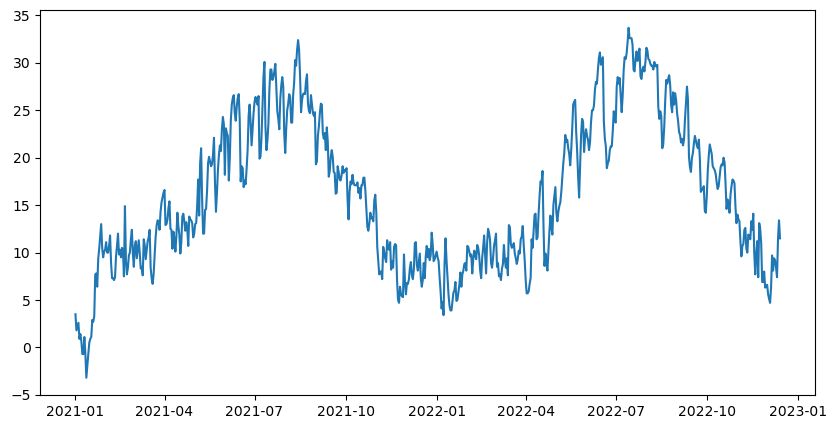

In [16]:
# Plot the daily temperature
plt.figure(figsize=(10,5))
plt.plot(sd_daily['date'], sd_daily['tavg'])

plt.show()

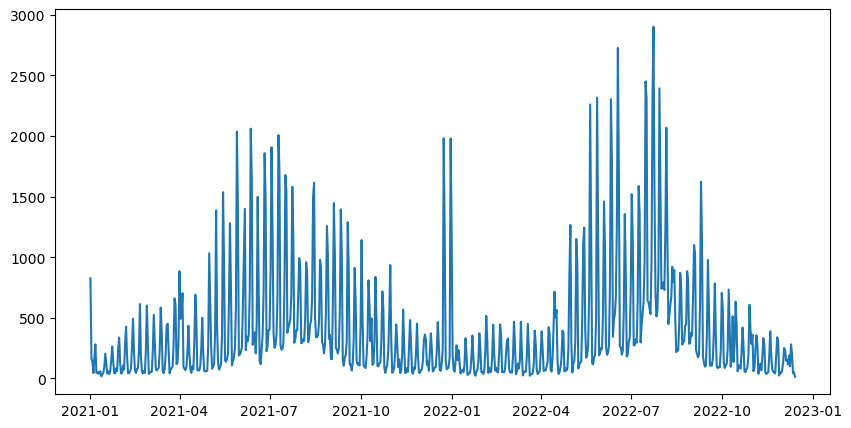

In [17]:
# Plot the units sold
plt.figure(figsize=(10,5))
plt.plot(sd_daily['date'], sd_daily['sold_units'])

plt.show()

In [18]:
# Explore differences in day of week x units sold
day_sales = sd.groupby('day_of_the_week')['sold_units'].sum().reset_index()

day_sales

day_of_the_week  sold_units
0          Friday     44489.0
1          Monday     17863.0
2        Saturday     95103.0
3          Sunday     69471.0
4        Thursday     19902.0
5         Tuesday     16312.0
6       Wednesday     17600.0

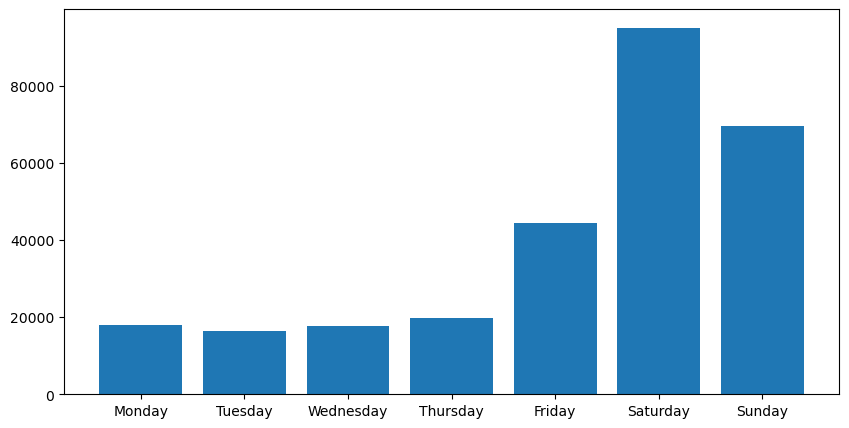

In [19]:
# Create a visualisation of day of week x units sold
# Define the correct order of days
day_order =  ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Set Day of Week as categorical
day_sales['day_of_the_week'] = pd.Categorical(day_sales['day_of_the_week'], categories= day_order, ordered=True)

day_sales =  day_sales.sort_values('day_of_the_week')

plt.figure(figsize=(10, 5))
plt.bar(day_sales['day_of_the_week'], day_sales['sold_units'])

plt.show()

#### c) Monthly Sales Exploration
##### Summary
- Overall, July has the most units sold followed by June and then August.
- Its clear that ice sales are highly seasonal indicating that temperature is a factor
- In terms 2021 vs. 2022, 2022 saw significantly higher sales from May to August. In other months 2021 was higher or equal to 2022

In [21]:
# Explore differences in month x units sold
month_sales = sd.groupby('month')['sold_units'].sum().reset_index()

month_sales

month  sold_units
0     1.0      9301.0
1     2.0      9746.0
2     3.0     11104.0
3     4.0     14575.0
4     5.0     33861.0
5     6.0     40950.0
6     7.0     55898.0
7     8.0     38273.0
8     9.0     25636.0
9    10.0     19493.0
10   11.0      9968.0
11   12.0     11935.0

In [22]:
# Create a visualisation of months x units sold
# Change month numbers to names
month_map = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'}

# Apply the mapping
month_sales['Month Name'] = month_sales['month'].map(month_map)

month_sales

month  sold_units Month Name
0     1.0      9301.0    January
1     2.0      9746.0   February
2     3.0     11104.0      March
3     4.0     14575.0      April
4     5.0     33861.0        May
5     6.0     40950.0       June
6     7.0     55898.0       July
7     8.0     38273.0     August
8     9.0     25636.0  September
9    10.0     19493.0    October
10   11.0      9968.0   November
11   12.0     11935.0   December

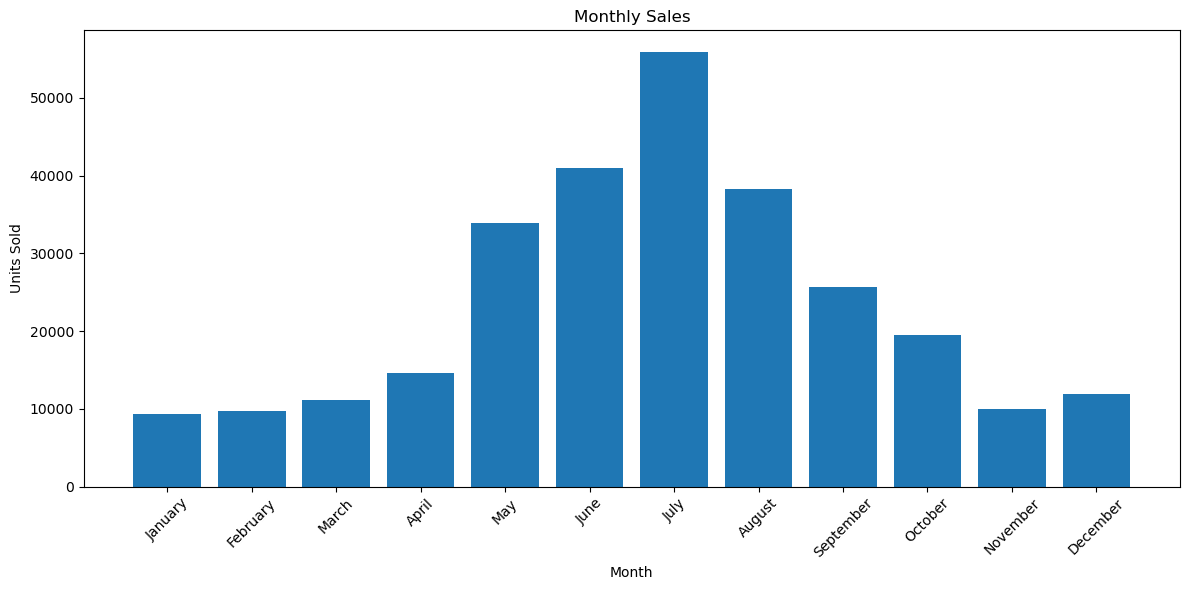

In [23]:
# Plot sales by month to identify monthly variation
plt.figure(figsize=(12, 6))
plt.bar(month_sales['Month Name'], month_sales['sold_units'])
plt.xticks(rotation=45)
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Units Sold')
plt.tight_layout()
plt.show()

In [24]:
# Look at variance in sales per month between 2021 & 2022
sd['month_year'] = sd['date'].dt.strftime('%B %Y')

sd.head()

year     province town_city  post_code  company_code  \
0  2021.0  Guadalajara   ALOVERA    19208.0        5561.0   
1  2021.0  Guadalajara   ALOVERA    19208.0        5561.0   
2  2021.0  Guadalajara   ALOVERA    19208.0        5561.0   
3  2021.0  Guadalajara   ALOVERA    19208.0        5561.0   
4  2021.0  Guadalajara   ALOVERA    19208.0        5561.0   

   petrol_station_code petrol_station       date  sold_units day_of_the_week  \
0                459.0        ALOVERA 2021-01-03         1.0          Sunday   
1                459.0        ALOVERA 2021-01-27         2.0       Wednesday   
2                459.0        ALOVERA 2021-02-14         1.0          Sunday   
3                459.0        ALOVERA 2021-02-27         1.0        Saturday   
4                459.0        ALOVERA 2021-03-06         2.0        Saturday   

   ...  tmin  tmax  prcp snow   wdir  wspd wpgt    pres  tmax__35_or_above  \
0  ...  -1.8   7.8   0.0  NaN  267.0  11.4  NaN  1017.0                0.0   
1  ...   9.7  17.8   0.0  NaN  275.0   9.6  NaN  1025.2                0.0   
2  ...   5.0  14.6   0.0  NaN   67.0   5.7  NaN  1029.6                0.0   
3  ...   7.5  18.2   0.0  NaN   46.0   9.7  NaN  1025.1                0.0   
4  ...   9.1  14.8   0.0  NaN   73.0   8.6  NaN  1019.9                0.0   

      month_year  
0   January 2021  
1   January 2021  
2  February 2021  
3  February 2021  
4     March 2021  

[5 rows x 34 columns]

In [25]:
# Group by Month year and units sold
month_year_sales = sd.groupby('month_year')['sold_units'].sum().reset_index()

month_year_sales

month_year  sold_units
0       April 2021      7348.0
1       April 2022      7227.0
2      August 2021     18269.0
3      August 2022     20004.0
4    December 2021      9954.0
5    December 2022      1981.0
6    February 2021      5013.0
7    February 2022      4733.0
8     January 2021      4100.0
9     January 2022      5201.0
10       July 2021     23352.0
11       July 2022     32546.0
12       June 2021     19079.0
13       June 2022     21871.0
14      March 2021      6690.0
15      March 2022      4414.0
16        May 2021     15985.0
17        May 2022     17876.0
18   November 2021      5341.0
19   November 2022      4627.0
20    October 2021     11051.0
21    October 2022      8442.0
22  September 2021     13207.0
23  September 2022     12429.0

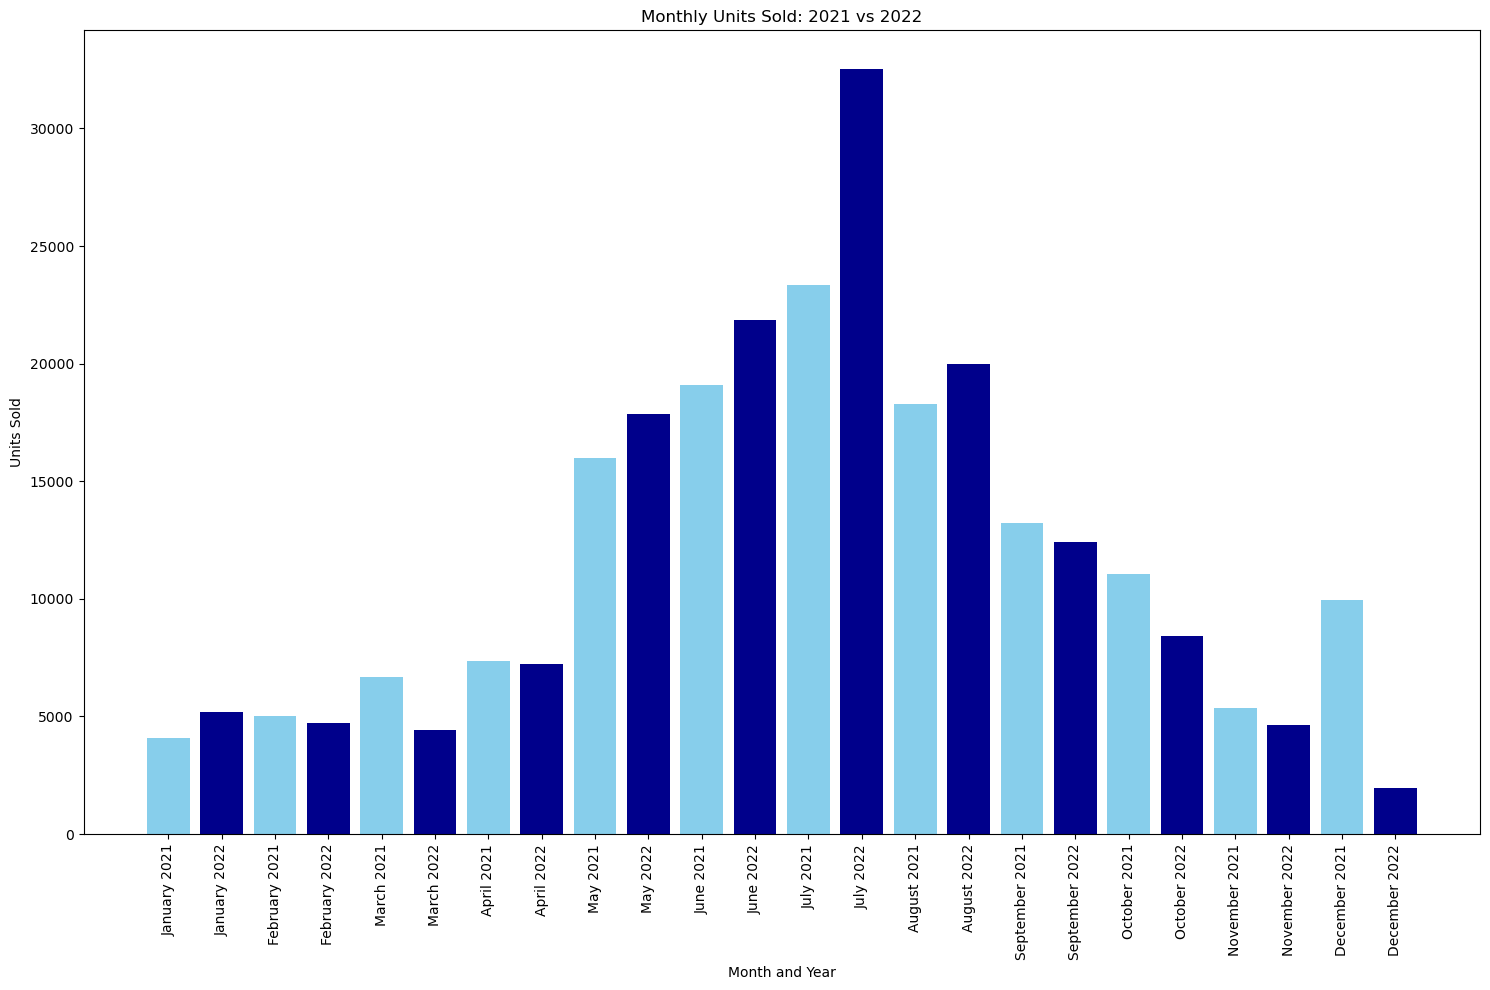

In [26]:
# Create a visualisation of month_year x units sold
# Define the correct order of month_year
month_year_order =  [
    'January 2021',
    'January 2022',
    'February 2021',
    'February 2022',
    'March 2021',
    'March 2022',
    'April 2021',
    'April 2022',
    'May 2021',
    'May 2022',
    'June 2021',
    'June 2022',
    'July 2021',
    'July 2022',
    'August 2021',        
    'August 2022',
    'September 2021',
    'September 2022',
    'October 2021',
    'October 2022',
    'November 2021',
    'November 2022',
    'December 2021',
    'December 2022']

# Set month_year as categorical
month_year_sales['month_year'] = pd.Categorical(month_year_sales['month_year'], categories= month_year_order, ordered=True)

month_year_sales =  month_year_sales.sort_values('month_year')

# Extract year from 'Month_Year'
month_year_sales['year'] = month_year_sales['month_year'].str[-4:]

# Define a colour map i.e. different colours for 2021 and 2022
colours = month_year_sales['year'].map({'2021': 'skyblue', '2022': 'darkblue'})

plt.figure(figsize=(15, 10))
plt.bar(month_year_sales['month_year'], month_year_sales['sold_units'], color=colours)

plt.xlabel('Month and Year')
plt.ylabel('Units Sold')
plt.title('Monthly Units Sold: 2021 vs 2022')
plt.xticks(rotation=90)  
plt.tight_layout() 
plt.show()

plt.show()


In [27]:
sd.head()

year     province town_city  post_code  company_code  \
0  2021.0  Guadalajara   ALOVERA    19208.0        5561.0   
1  2021.0  Guadalajara   ALOVERA    19208.0        5561.0   
2  2021.0  Guadalajara   ALOVERA    19208.0        5561.0   
3  2021.0  Guadalajara   ALOVERA    19208.0        5561.0   
4  2021.0  Guadalajara   ALOVERA    19208.0        5561.0   

   petrol_station_code petrol_station       date  sold_units day_of_the_week  \
0                459.0        ALOVERA 2021-01-03         1.0          Sunday   
1                459.0        ALOVERA 2021-01-27         2.0       Wednesday   
2                459.0        ALOVERA 2021-02-14         1.0          Sunday   
3                459.0        ALOVERA 2021-02-27         1.0        Saturday   
4                459.0        ALOVERA 2021-03-06         2.0        Saturday   

   ...  tmin  tmax  prcp snow   wdir  wspd wpgt    pres  tmax__35_or_above  \
0  ...  -1.8   7.8   0.0  NaN  267.0  11.4  NaN  1017.0                0.0   
1  ...   9.7  17.8   0.0  NaN  275.0   9.6  NaN  1025.2                0.0   
2  ...   5.0  14.6   0.0  NaN   67.0   5.7  NaN  1029.6                0.0   
3  ...   7.5  18.2   0.0  NaN   46.0   9.7  NaN  1025.1                0.0   
4  ...   9.1  14.8   0.0  NaN   73.0   8.6  NaN  1019.9                0.0   

      month_year  
0   January 2021  
1   January 2021  
2  February 2021  
3  February 2021  
4     March 2021  

[5 rows x 34 columns]

In [28]:
# Analyse year on year sales per month
YonY_monthly_sales = sd.groupby(['year', 'month'])['sold_units'].sum().reset_index()

YonY_monthly_sales.head()

year  month  sold_units
0  2021.0    1.0      4100.0
1  2021.0    2.0      5013.0
2  2021.0    3.0      6690.0
3  2021.0    4.0      7348.0
4  2021.0    5.0     15985.0

In [29]:
# Pivot to allow for visualisation
monthly_pivot = YonY_monthly_sales.pivot(index='month', columns='year', values='sold_units').reset_index()

monthly_pivot.head()

year  month   2021.0   2022.0
0       1.0   4100.0   5201.0
1       2.0   5013.0   4733.0
2       3.0   6690.0   4414.0
3       4.0   7348.0   7227.0
4       5.0  15985.0  17876.0

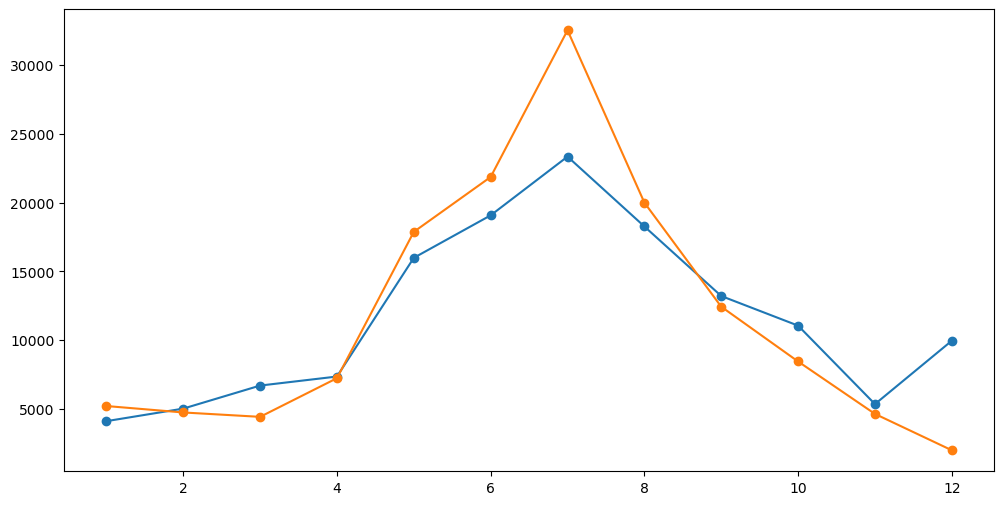

In [30]:
# Plot 2021 vs 2022 ice sales
plt.figure(figsize=(12, 6))
for year in [2021, 2022]:
    plt.plot(monthly_pivot['month'], monthly_pivot[year], marker='o', label=str(year))

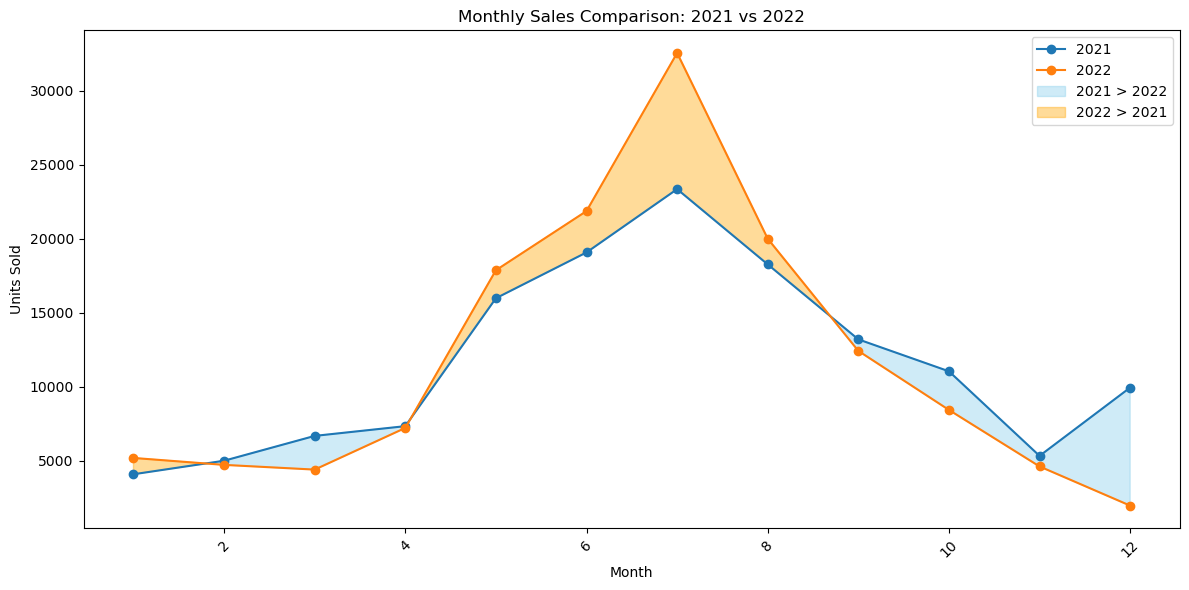

In [31]:
# Fill between the lines
plt.figure(figsize=(12, 6))
for year in [2021, 2022]:
    plt.plot(monthly_pivot['month'], monthly_pivot[year], marker='o', label=str(year))

# Fill where 2021 > 2022 (shade blue)
plt.fill_between(
    monthly_pivot['month'],
    monthly_pivot[2021],
    monthly_pivot[2022],
    where=(monthly_pivot[2021] > monthly_pivot[2022]),
    interpolate=True,
    color='skyblue',
    alpha=0.4,
    label='2021 > 2022'
)

# Fill where 2022 > 2021 (shade orange)
plt.fill_between(
    monthly_pivot['month'],
    monthly_pivot[2021],
    monthly_pivot[2022],
    where=(monthly_pivot[2022] > monthly_pivot[2021]),
    interpolate=True,
    color='orange',
    alpha=0.4,
    label='2022 > 2021'
)

# Add labels and legend
plt.xlabel('Month')
plt.ylabel('Units Sold')
plt.title('Monthly Sales Comparison: 2021 vs 2022')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

#### d) Weekly Sales exploration
##### Summary
- The weekly picture demonstrates large variations in units sold in the summer 2022.Significantly more sold in certain weeks, followed by large dips in units sold potentially demonstrating a lack of stock.
- Weeks which tend to have hot days in them, see the highest sales

In [33]:
sd.head()

year     province town_city  post_code  company_code  \
0  2021.0  Guadalajara   ALOVERA    19208.0        5561.0   
1  2021.0  Guadalajara   ALOVERA    19208.0        5561.0   
2  2021.0  Guadalajara   ALOVERA    19208.0        5561.0   
3  2021.0  Guadalajara   ALOVERA    19208.0        5561.0   
4  2021.0  Guadalajara   ALOVERA    19208.0        5561.0   

   petrol_station_code petrol_station       date  sold_units day_of_the_week  \
0                459.0        ALOVERA 2021-01-03         1.0          Sunday   
1                459.0        ALOVERA 2021-01-27         2.0       Wednesday   
2                459.0        ALOVERA 2021-02-14         1.0          Sunday   
3                459.0        ALOVERA 2021-02-27         1.0        Saturday   
4                459.0        ALOVERA 2021-03-06         2.0        Saturday   

   ...  tmin  tmax  prcp snow   wdir  wspd wpgt    pres  tmax__35_or_above  \
0  ...  -1.8   7.8   0.0  NaN  267.0  11.4  NaN  1017.0                0.0   
1  ...   9.7  17.8   0.0  NaN  275.0   9.6  NaN  1025.2                0.0   
2  ...   5.0  14.6   0.0  NaN   67.0   5.7  NaN  1029.6                0.0   
3  ...   7.5  18.2   0.0  NaN   46.0   9.7  NaN  1025.1                0.0   
4  ...   9.1  14.8   0.0  NaN   73.0   8.6  NaN  1019.9                0.0   

      month_year  
0   January 2021  
1   January 2021  
2  February 2021  
3  February 2021  
4     March 2021  

[5 rows x 34 columns]

In [34]:
sd.columns

Index(['year', 'province', 'town_city', 'post_code', 'company_code',
       'petrol_station_code', 'petrol_station', 'date', 'sold_units',
       'day_of_the_week', 'week_number', 'month', 'season_weight', 'season',
       'distance_madrid_km', 'direction', 'preferred_road_1',
       'preferred_road_2', 'road_type', 'total_holiday_weight', 'weekend',
       'public_holiday', 'festivals', 'tavg', 'tmin', 'tmax', 'prcp', 'snow',
       'wdir', 'wspd', 'wpgt', 'pres', 'tmax__35_or_above', 'month_year'],
      dtype='object')

In [35]:
# Replicate the monthly sales chart, but by week instead of month
# Create a week column in the dataframe
sd['week'] = sd['date'].dt.isocalendar().week

sd.head()

year     province town_city  post_code  company_code  \
0  2021.0  Guadalajara   ALOVERA    19208.0        5561.0   
1  2021.0  Guadalajara   ALOVERA    19208.0        5561.0   
2  2021.0  Guadalajara   ALOVERA    19208.0        5561.0   
3  2021.0  Guadalajara   ALOVERA    19208.0        5561.0   
4  2021.0  Guadalajara   ALOVERA    19208.0        5561.0   

   petrol_station_code petrol_station       date  sold_units day_of_the_week  \
0                459.0        ALOVERA 2021-01-03         1.0          Sunday   
1                459.0        ALOVERA 2021-01-27         2.0       Wednesday   
2                459.0        ALOVERA 2021-02-14         1.0          Sunday   
3                459.0        ALOVERA 2021-02-27         1.0        Saturday   
4                459.0        ALOVERA 2021-03-06         2.0        Saturday   

   ...  tmax  prcp  snow   wdir  wspd wpgt    pres tmax__35_or_above  \
0  ...   7.8   0.0   NaN  267.0  11.4  NaN  1017.0               0.0   
1  ...  17.8   0.0   NaN  275.0   9.6  NaN  1025.2               0.0   
2  ...  14.6   0.0   NaN   67.0   5.7  NaN  1029.6               0.0   
3  ...  18.2   0.0   NaN   46.0   9.7  NaN  1025.1               0.0   
4  ...  14.8   0.0   NaN   73.0   8.6  NaN  1019.9               0.0   

      month_year  week  
0   January 2021    53  
1   January 2021     4  
2  February 2021     6  
3  February 2021     8  
4     March 2021     9  

[5 rows x 35 columns]

In [36]:
# Group data by year and week
YonY_weekly_sales = sd.groupby(['year', 'week']).agg({
    'sold_units': 'sum', 
    'tmax__35_or_above': 'any',
    'tmax' : 'mean',
    'tavg': 'mean'}).reset_index()

YonY_weekly_sales.head()

year  week  sold_units  tmax__35_or_above       tmax       tavg
0  2021.0     1       693.0              False   3.543439   0.919457
1  2021.0     2       573.0              False   5.716410   0.038462
2  2021.0     3       762.0              False   9.907500   6.392917
3  2021.0     4       941.0              False  13.056610  10.551525
4  2021.0     5      1169.0              False  12.955016   9.853074

In [37]:
# Check that the Hot Days Boolean converted to groupby week
YonY_weekly_sales['tmax__35_or_above'].value_counts()

tmax__35_or_above
False    85
True     19
Name: count, dtype: int64

In [38]:
# Pivot the data to allow for year on year comparison
weekly_pivot = YonY_weekly_sales.pivot(index='week', columns='year', values='sold_units').reset_index()

weekly_pivot.head()

year  week  2021.0  2022.0
0        1   693.0  1071.0
1        2   573.0   878.0
2        3   762.0   862.0
3        4   941.0   947.0
4        5  1169.0  1268.0

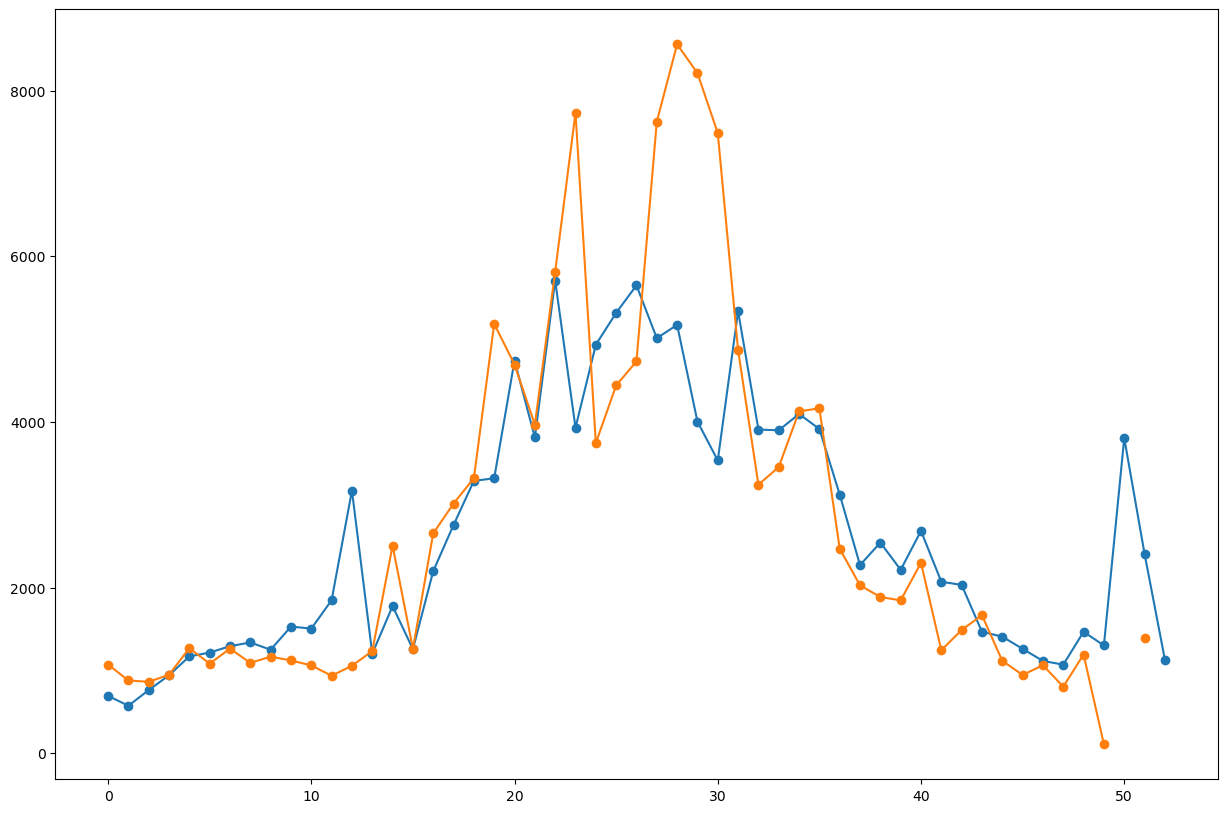

In [39]:
plt.figure(figsize=(15, 10))
for year in [2021, 2022]:
    plt.plot(weekly_pivot.index, weekly_pivot[year], marker='o', label=str(year))

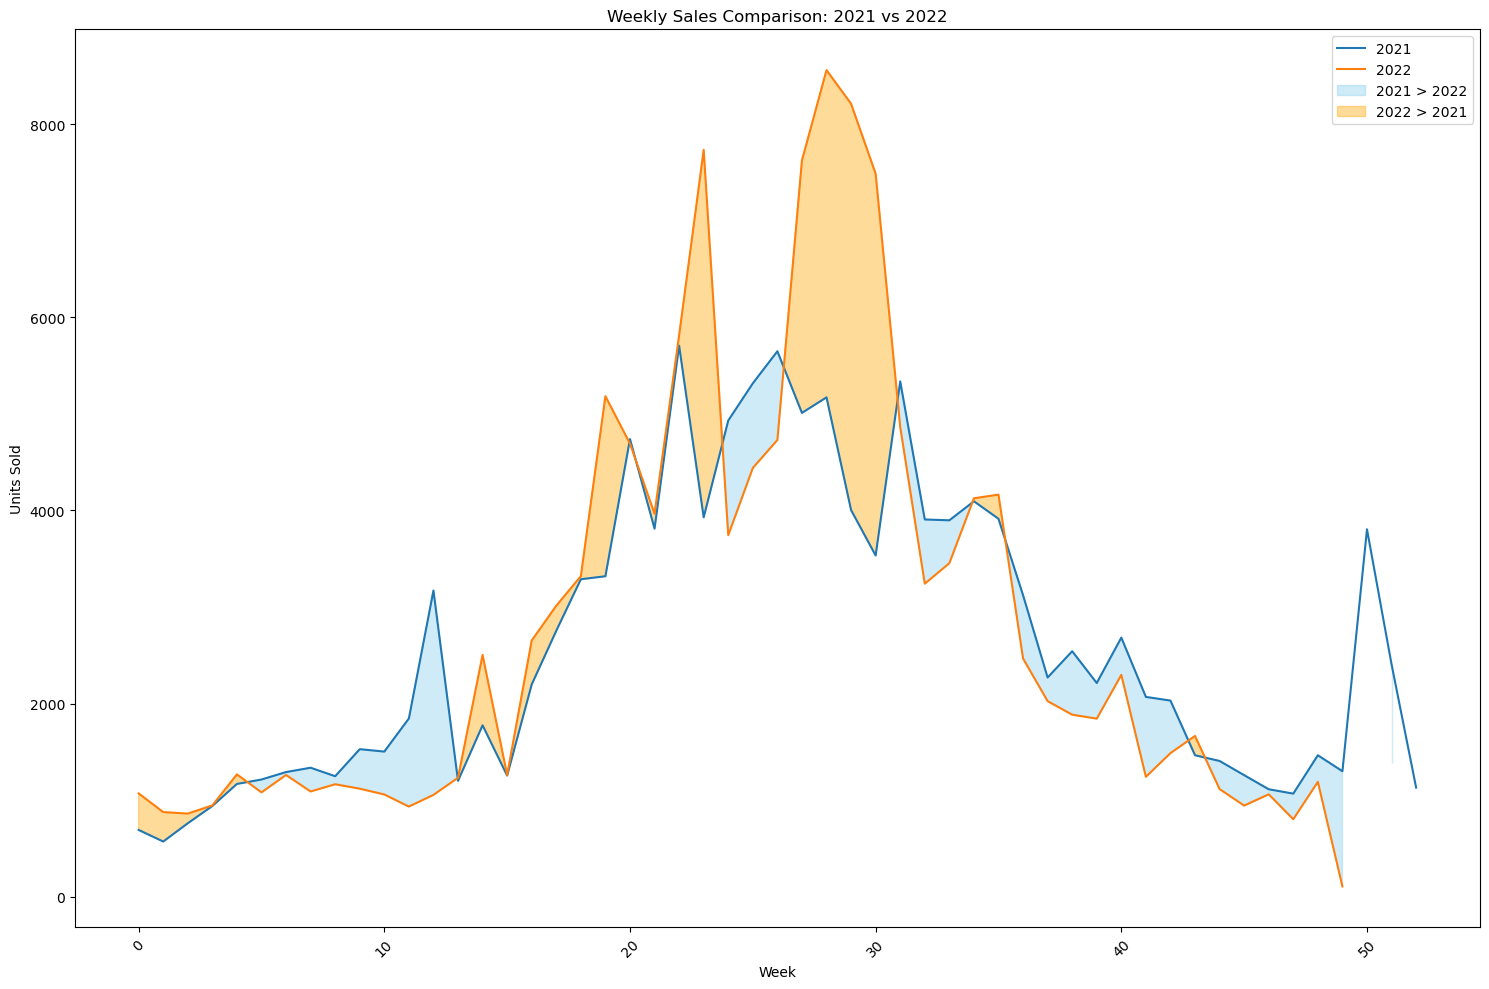

In [40]:
# Fill between the lines
plt.figure(figsize=(15, 10))
for year in [2021, 2022]:
    plt.plot(weekly_pivot.index, weekly_pivot[year], label=str(year))

# Fill where 2021 > 2022 (shade blue)
plt.fill_between(
    weekly_pivot.index,
    weekly_pivot[2021],
    weekly_pivot[2022],
    where=(weekly_pivot[2021] > weekly_pivot[2022]),
    interpolate=True,
    color='skyblue',
    alpha=0.4,
    label='2021 > 2022'
)

# Fill where 2022 > 2021 (shade orange)
plt.fill_between(
    weekly_pivot.index,
    weekly_pivot[2021],
    weekly_pivot[2022],
    where=(weekly_pivot[2022] > weekly_pivot[2021]),
    interpolate=True,
    color='orange',
    alpha=0.4,
    label='2022 > 2021'
)

# Add labels and legend
plt.xlabel('Week')
plt.ylabel('Units Sold')
plt.title('Weekly Sales Comparison: 2021 vs 2022')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

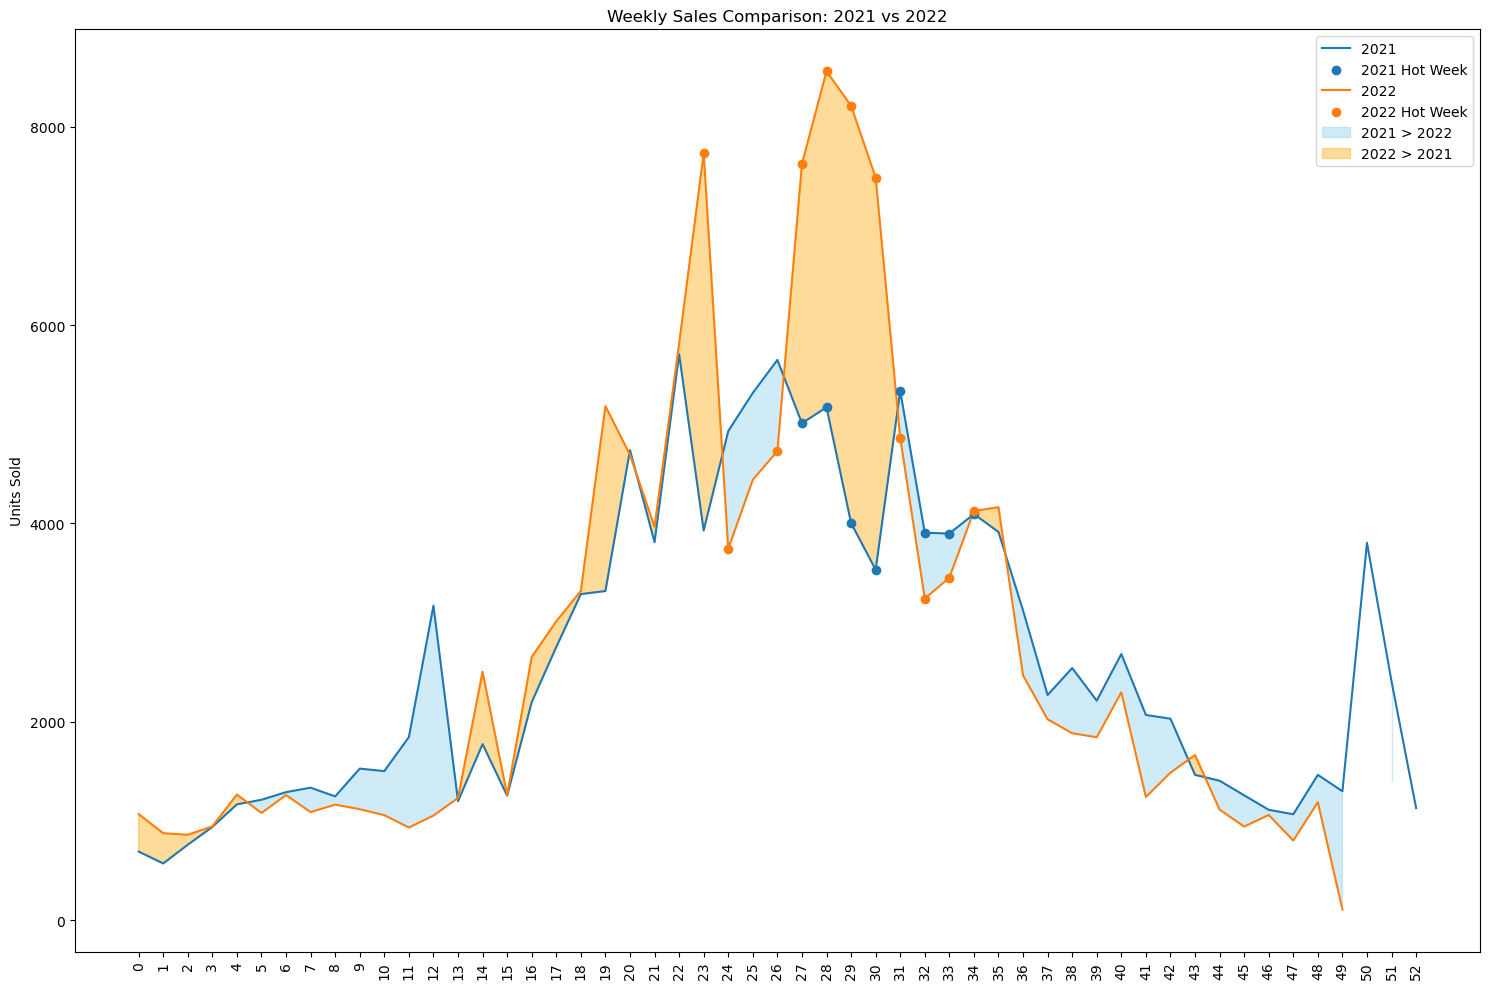

In [41]:
# Run the same chart, but including hot week identifiers 
# Fill between the lines
plt.figure(figsize=(15, 10))
for year in [2021, 2022]:
    plt.plot(weekly_pivot.index, weekly_pivot[year], label=str(year))
    
    # Filter for weeks that have >1 hot day in them
    hot_weeks = YonY_weekly_sales[
    (YonY_weekly_sales['year'] == year) &
    (YonY_weekly_sales['tmax__35_or_above'] == True)]
    # Plot hot weeks on chart
    plt.scatter(
    hot_weeks['week'],
    weekly_pivot.loc[hot_weeks['week'], year],
    label=f'{year} Hot Week',
    zorder=5)
                                

# Fill where 2021 > 2022 (shade blue)
plt.fill_between(
    weekly_pivot.index,
    weekly_pivot[2021],
    weekly_pivot[2022],
    where=(weekly_pivot[2021] > weekly_pivot[2022]),
    interpolate=True,
    color='skyblue',
    alpha=0.4,
    label='2021 > 2022'
)

# Fill where 2022 > 2021 (shade orange)
plt.fill_between(
    weekly_pivot.index,
    weekly_pivot[2021],
    weekly_pivot[2022],
    where=(weekly_pivot[2022] > weekly_pivot[2021]),
    interpolate=True,
    color='orange',
    alpha=0.4,
    label='2022 > 2021'
)

# Add labels and legend
weeks = weekly_pivot.index
plt.xticks(ticks=weeks, labels=weeks, rotation=45)
plt.ylabel('Units Sold')
plt.title('Weekly Sales Comparison: 2021 vs 2022')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

In [42]:
# Pivot Temperature data to allow for year on year comparison
weekly_pivot_temp = YonY_weekly_sales.pivot(index='week', columns='year', values='tavg').reset_index()

weekly_pivot_temp.head()

year  week     2021.0    2022.0
0        1   0.919457  5.840187
1        2   0.038462  5.725468
2        3   6.392917  5.551515
3        4  10.551525  8.135361
4        5   9.853074  9.365188

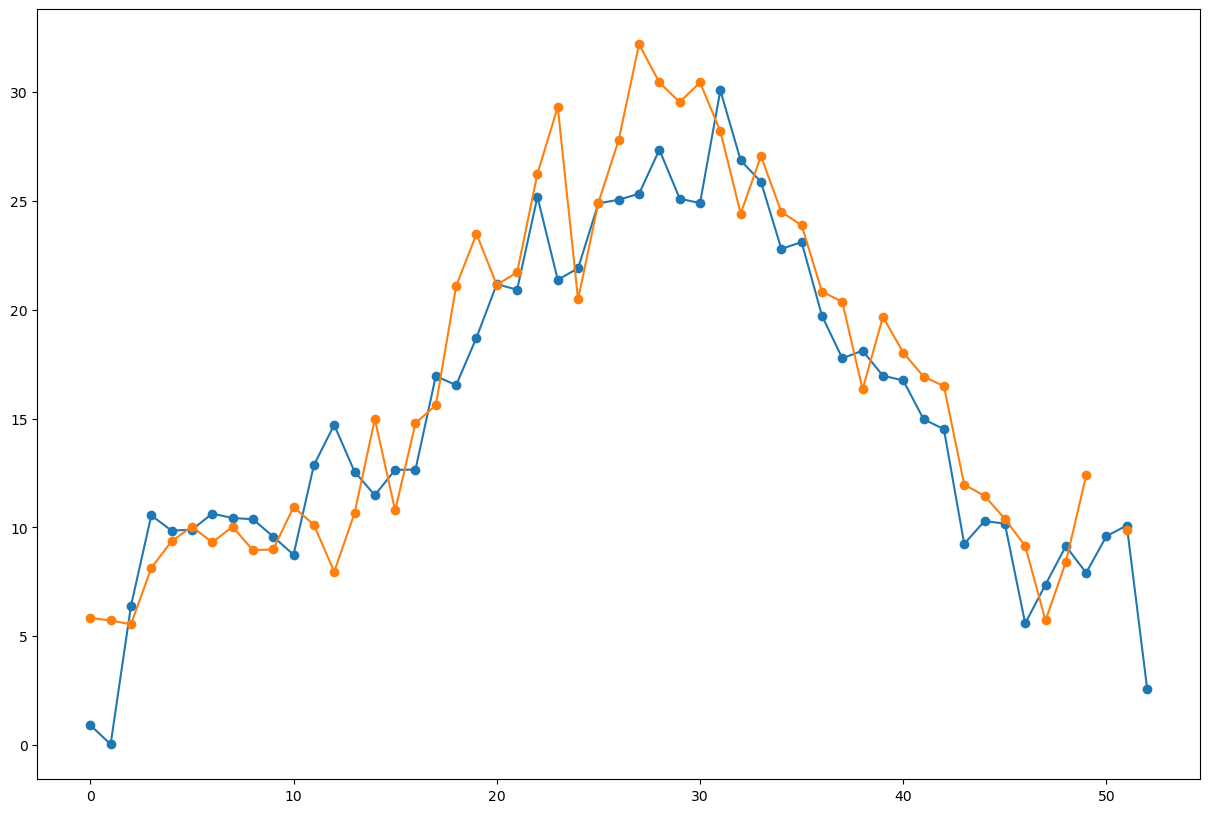

In [43]:
# Plot YonY temperature data
plt.figure(figsize=(15, 10))
for year in [2021, 2022]:
    plt.plot(weekly_pivot_temp.index, weekly_pivot_temp[year], marker='o', label=str(year))

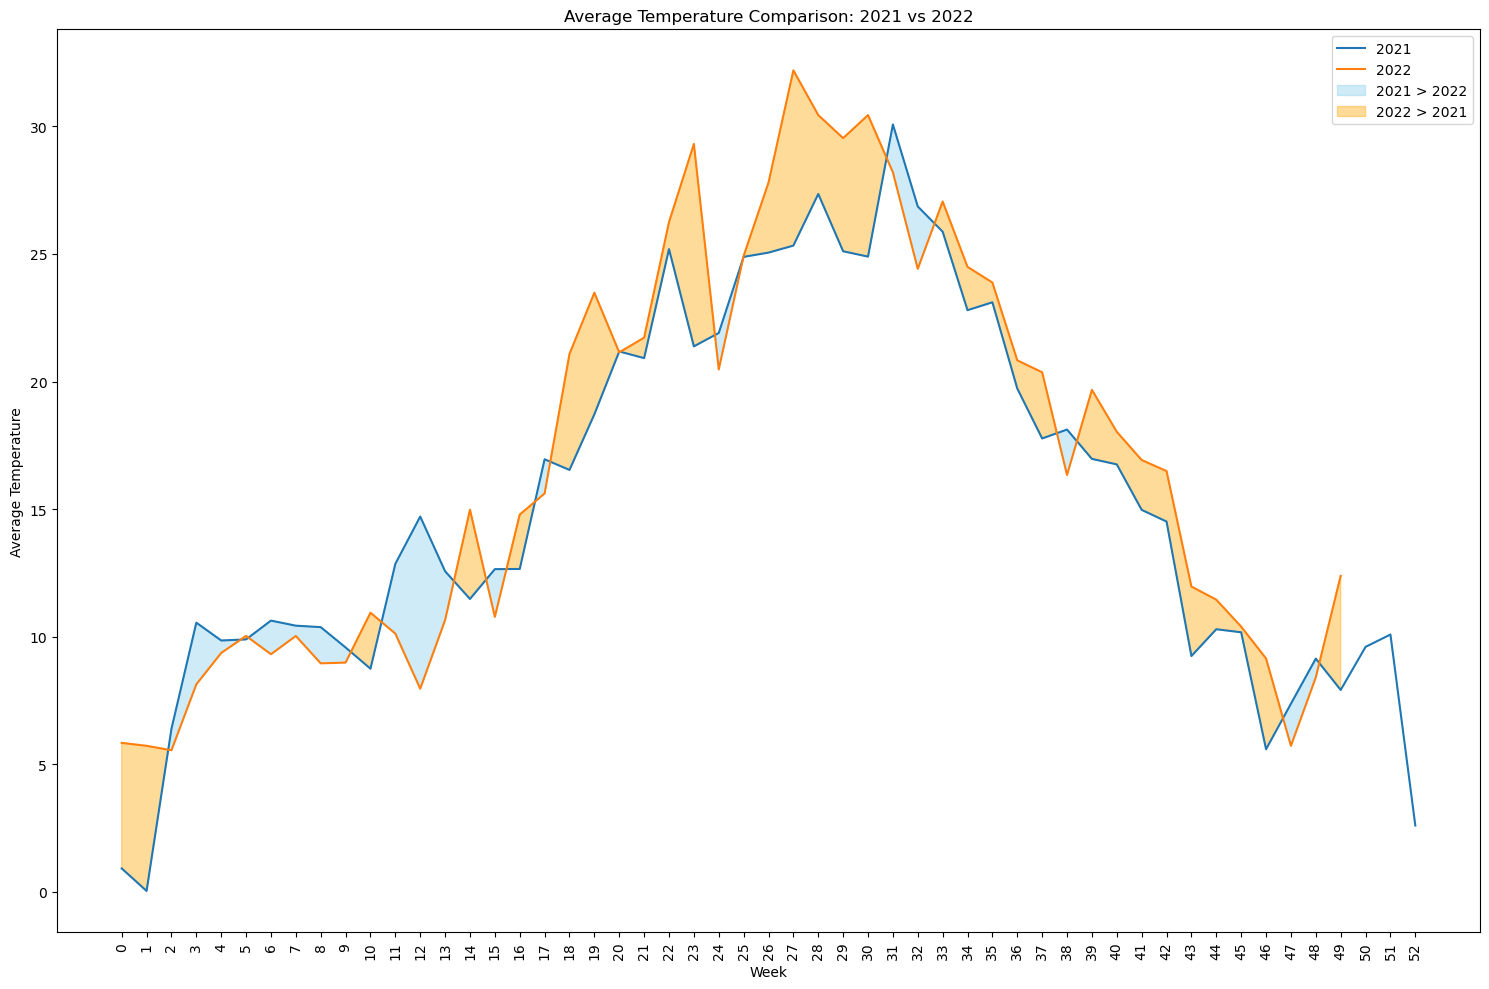

In [44]:
# Fill between the lines
plt.figure(figsize=(15, 10))
for year in [2021, 2022]:
    plt.plot(weekly_pivot_temp.index, weekly_pivot_temp[year], label=str(year))

# Fill where 2021 > 2022 (shade blue)
plt.fill_between(
    weekly_pivot_temp.index,
    weekly_pivot_temp[2021],
    weekly_pivot_temp[2022],
    where=(weekly_pivot_temp[2021] > weekly_pivot_temp[2022]),
    interpolate=True,
    color='skyblue',
    alpha=0.4,
    label='2021 > 2022'
)

# Fill where 2022 > 2021 (shade orange)
plt.fill_between(
    weekly_pivot_temp.index,
    weekly_pivot_temp[2021],
    weekly_pivot_temp[2022],
    where=(weekly_pivot_temp[2022] > weekly_pivot_temp[2021]),
    interpolate=True,
    color='orange',
    alpha=0.4,
    label='2022 > 2021'
)

# Add labels and legend
plt.xlabel('Week')
plt.ylabel('Average Temperature')
plt.title('Average Temperature Comparison: 2021 vs 2022')
plt.xticks(ticks=weeks, labels=weeks, rotation=45)
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

In [45]:
# Add a units sold per degrees 
YonY_weekly_sales['sales_per_degree'] = YonY_weekly_sales['sold_units'] / YonY_weekly_sales['tavg']

In [46]:

YonY_weekly_sales_filtered = YonY_weekly_sales[YonY_weekly_sales['tavg'] > 1].copy()
YonY_weekly_sales_filtered['sales_per_degree'] = (
    YonY_weekly_sales_filtered['sold_units'] / YonY_weekly_sales_filtered['tavg']
)

/var/folders/py/k9sb858d5lx8k2x1x87bzh3c0000gn/T/ipykernel_35890/1198493107.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = YonY_weekly_sales_filtered[YonY_weekly_sales['year'] == year]
/var/folders/py/k9sb858d5lx8k2x1x87bzh3c0000gn/T/ipykernel_35890/1198493107.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = YonY_weekly_sales_filtered[YonY_weekly_sales['year'] == year]


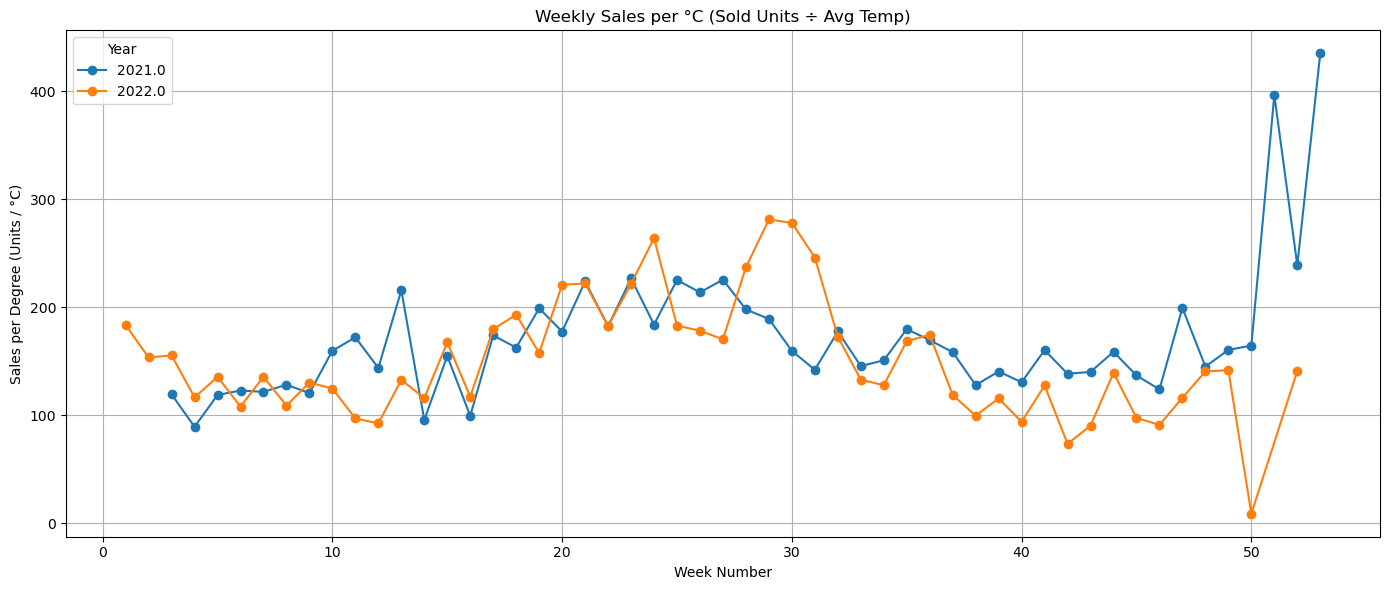

In [47]:
# Plot weekly Sales per degree YonY
plt.figure(figsize=(14, 6))

for year in YonY_weekly_sales_filtered['year'].unique():
    data = YonY_weekly_sales_filtered[YonY_weekly_sales['year'] == year]
    plt.plot(data['week'], data['sales_per_degree'], marker='o', label=str(year))

plt.title("Weekly Sales per °C (Sold Units ÷ Avg Temp)")
plt.xlabel("Week Number")
plt.ylabel("Sales per Degree (Units / °C)")
plt.legend(title='Year')
plt.grid(True)
plt.tight_layout()
plt.show()

In [48]:
YonY_weekly_sales[YonY_weekly_sales['tavg'] < 1][['year', 'week', 'sold_units', 'tavg']]

year  week  sold_units      tavg
0  2021.0     1       693.0  0.919457
1  2021.0     2       573.0  0.038462

#### e) Daily temperature exploration
##### Summary
- Overall, 2022 has a higher average daily temperature than 2021 (16.8 vs. 15.3)
- Summer 2022 was hotter than summer 2021

In [50]:
# Check temperature by day
# Reminder of daily datatframe created previously
sd_daily.head()

date  tavg  sold_units  tmax__35_or_above day_of_the_week  \
0 2021-01-01   3.5       827.0              False          Friday   
1 2021-01-02   1.8       166.0              False        Saturday   
2 2021-01-03   2.2       138.0              False          Sunday   
3 2021-01-04   2.6        45.0              False          Monday   
4 2021-01-05   0.9       172.0              False         Tuesday   

   public_holiday  festivals  tmax  prcp  
0             NaN        NaN   6.5   0.0  
1             0.0        0.0   5.4   0.0  
2             1.0        0.0   7.8   0.0  
3             0.0        NaN   5.4   0.0  
4             0.0        NaN   4.7   0.0

In [51]:
# Strip date and year as seperate columns
sd_daily['month_day'] = sd_daily['date'].dt.strftime('%b %d')

sd_daily.head()

date  tavg  sold_units  tmax__35_or_above day_of_the_week  \
0 2021-01-01   3.5       827.0              False          Friday   
1 2021-01-02   1.8       166.0              False        Saturday   
2 2021-01-03   2.2       138.0              False          Sunday   
3 2021-01-04   2.6        45.0              False          Monday   
4 2021-01-05   0.9       172.0              False         Tuesday   

   public_holiday  festivals  tmax  prcp month_day  
0             NaN        NaN   6.5   0.0    Jan 01  
1             0.0        0.0   5.4   0.0    Jan 02  
2             1.0        0.0   7.8   0.0    Jan 03  
3             0.0        NaN   5.4   0.0    Jan 04  
4             0.0        NaN   4.7   0.0    Jan 05

In [52]:
# Create Year column
sd_daily['year'] = sd_daily['date'].dt.year

sd_daily.head()

date  tavg  sold_units  tmax__35_or_above day_of_the_week  \
0 2021-01-01   3.5       827.0              False          Friday   
1 2021-01-02   1.8       166.0              False        Saturday   
2 2021-01-03   2.2       138.0              False          Sunday   
3 2021-01-04   2.6        45.0              False          Monday   
4 2021-01-05   0.9       172.0              False         Tuesday   

   public_holiday  festivals  tmax  prcp month_day  year  
0             NaN        NaN   6.5   0.0    Jan 01  2021  
1             0.0        0.0   5.4   0.0    Jan 02  2021  
2             1.0        0.0   7.8   0.0    Jan 03  2021  
3             0.0        NaN   5.4   0.0    Jan 04  2021  
4             0.0        NaN   4.7   0.0    Jan 05  2021

In [53]:
# Add a Month_Day column with a dummy year, so it can be sorted in chronological order
sd_daily['month_day_sortable'] = pd.to_datetime(sd_daily['date'].dt.strftime('2025-%m-%d'))

sd_daily.head()

date  tavg  sold_units  tmax__35_or_above day_of_the_week  \
0 2021-01-01   3.5       827.0              False          Friday   
1 2021-01-02   1.8       166.0              False        Saturday   
2 2021-01-03   2.2       138.0              False          Sunday   
3 2021-01-04   2.6        45.0              False          Monday   
4 2021-01-05   0.9       172.0              False         Tuesday   

   public_holiday  festivals  tmax  prcp month_day  year month_day_sortable  
0             NaN        NaN   6.5   0.0    Jan 01  2021         2025-01-01  
1             0.0        0.0   5.4   0.0    Jan 02  2021         2025-01-02  
2             1.0        0.0   7.8   0.0    Jan 03  2021         2025-01-03  
3             0.0        NaN   5.4   0.0    Jan 04  2021         2025-01-04  
4             0.0        NaN   4.7   0.0    Jan 05  2021         2025-01-05

In [54]:
# Group the data by year and month_day_sortable to allow for year on year comparisons
YonY_daily_temp = sd_daily.groupby(['year', 'month_day', 'month_day_sortable'])['tavg'].mean().reset_index()

YonY_daily_temp = YonY_daily_temp.sort_values('month_day_sortable')

YonY_daily_temp.head()

year month_day month_day_sortable  tavg
120  2021    Jan 01         2025-01-01   3.5
468  2022    Jan 01         2025-01-01  10.1
469  2022    Jan 02         2025-01-02   9.5
121  2021    Jan 02         2025-01-02   1.8
470  2022    Jan 03         2025-01-03   9.1

In [55]:
# Pivot the data to be able to plot each year as a seperate line
daily_temp_pivot = YonY_daily_temp.pivot(index='month_day_sortable', columns='year', values='tavg').reset_index()

daily_temp_pivot.head()

year month_day_sortable  2021  2022
0            2025-01-01   3.5  10.1
1            2025-01-02   1.8   9.5
2            2025-01-03   2.2   9.1
3            2025-01-04   2.6   7.4
4            2025-01-05   0.9   5.9

In [56]:
# Add in the Month_Day column (without the dummy year)
daily_temp_pivot['month_day'] = daily_temp_pivot['month_day_sortable'].dt.strftime('%m-%d')

daily_temp_pivot.head()

year month_day_sortable  2021  2022 month_day
0            2025-01-01   3.5  10.1     01-01
1            2025-01-02   1.8   9.5     01-02
2            2025-01-03   2.2   9.1     01-03
3            2025-01-04   2.6   7.4     01-04
4            2025-01-05   0.9   5.9     01-05

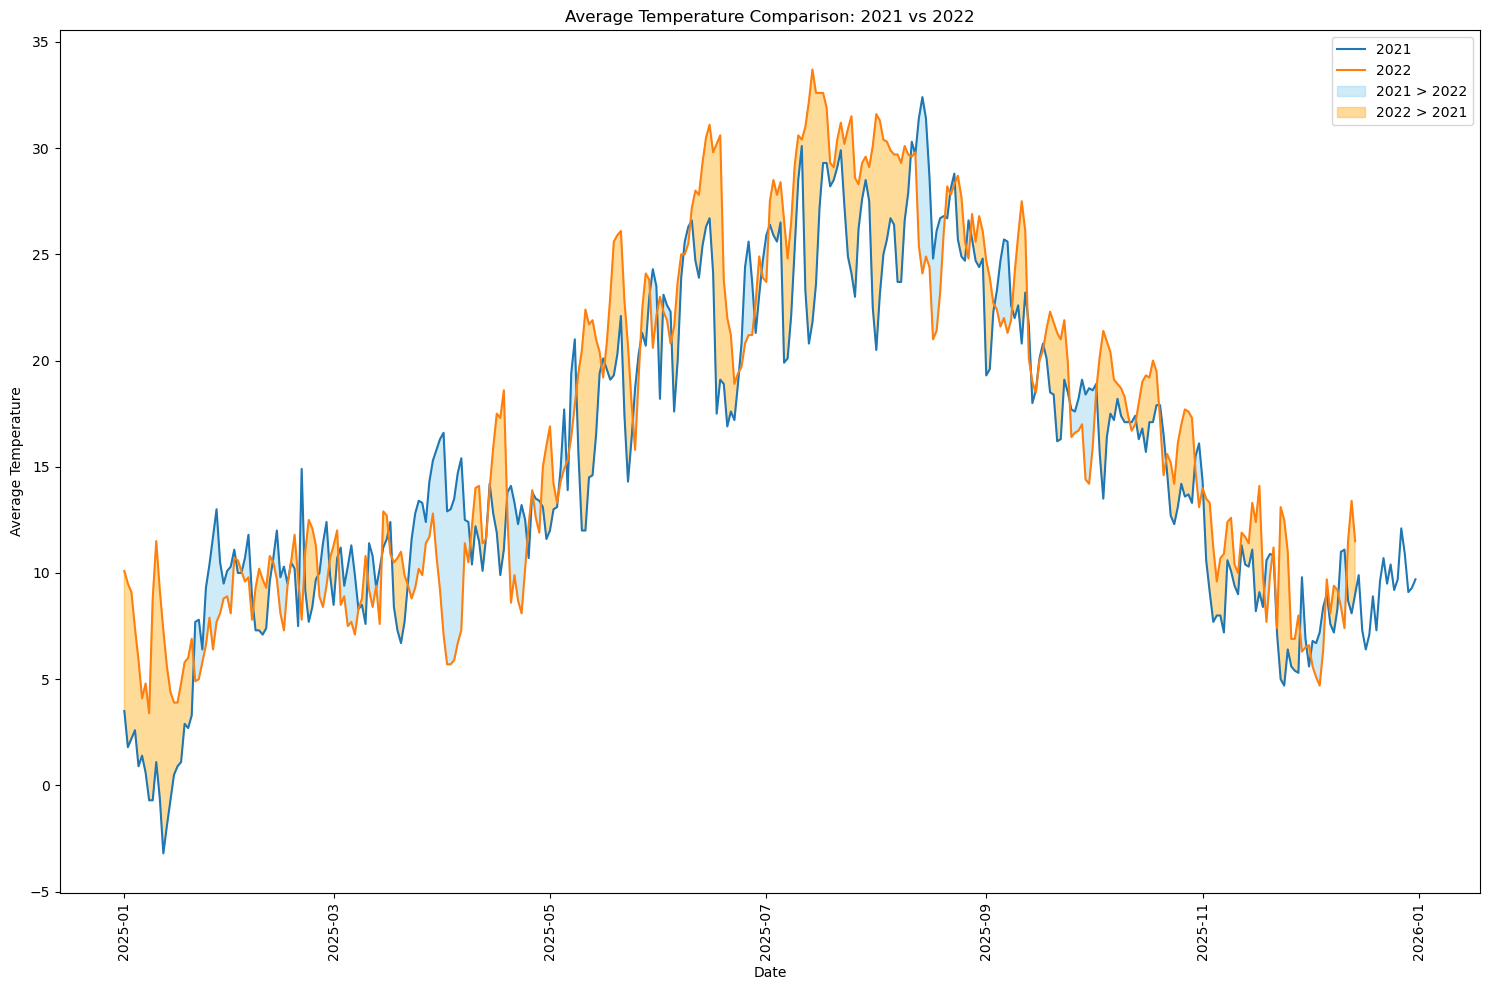

In [57]:
# Plot the Year On Year comparison
# Set it as the index so matplotlib uses it on the x-axis
daily_temp_pivot = daily_temp_pivot.set_index('month_day_sortable')

plt.figure(figsize=(15, 10))
for year in [2021, 2022]:
    plt.plot(daily_temp_pivot.index, daily_temp_pivot[year], label=str(year))

# Fill where 2021 > 2022 (shade blue)
plt.fill_between(
    daily_temp_pivot.index,
    daily_temp_pivot[2021],
    daily_temp_pivot[2022],
    where=(daily_temp_pivot[2021] > daily_temp_pivot[2022]),
    interpolate=True,
    color='skyblue',
    alpha=0.4,
    label='2021 > 2022'
)

# Fill where 2022 > 2021 (shade orange)
plt.fill_between(
    daily_temp_pivot.index,
    daily_temp_pivot[2021],
    daily_temp_pivot[2022],
    where=(daily_temp_pivot[2022] > daily_temp_pivot[2021]),
    interpolate=True,
    color='orange',
    alpha=0.4,
    label='2022 > 2021'
)

# Add labels and legend
plt.xlabel('Date')
plt.ylabel('Average Temperature')
plt.title('Average Temperature Comparison: 2021 vs 2022')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

In [58]:
# Compare average daily temperature 2021 vs 2022
daily_temp_pivot.describe()

year         2021        2022
count  365.000000  348.000000
mean    15.329041   16.885632
std      7.522711    8.057396
min     -3.200000    3.400000
25%      9.800000    9.875000
50%     13.900000   15.900000
75%     21.300000   23.050000
max     32.400000   33.700000

### 3) Analyse the data

#### a) Linear Regression: Average Temperature (tavg) vs. Sold Units
##### Summary:
- Temperature explains 28% of the variations in daily units sold
- For every 1°C increase in average temperature, sales increase by 31 units on average

In [61]:
sd_daily.head()

date  tavg  sold_units  tmax__35_or_above day_of_the_week  \
0 2021-01-01   3.5       827.0              False          Friday   
1 2021-01-02   1.8       166.0              False        Saturday   
2 2021-01-03   2.2       138.0              False          Sunday   
3 2021-01-04   2.6        45.0              False          Monday   
4 2021-01-05   0.9       172.0              False         Tuesday   

   public_holiday  festivals  tmax  prcp month_day  year month_day_sortable  
0             NaN        NaN   6.5   0.0    Jan 01  2021         2025-01-01  
1             0.0        0.0   5.4   0.0    Jan 02  2021         2025-01-02  
2             1.0        0.0   7.8   0.0    Jan 03  2021         2025-01-03  
3             0.0        NaN   5.4   0.0    Jan 04  2021         2025-01-04  
4             0.0        NaN   4.7   0.0    Jan 05  2021         2025-01-05

In [62]:
# Check for NA values
print(sd_daily[['tavg', 'sold_units']].isna().sum())

tavg          0
sold_units    0
dtype: int64


In [63]:
# Import the necessary package
from sklearn import linear_model
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols

# Define independent variable and add constant
x = sd_daily['tavg']
x_constant = sm.add_constant(x)

# Define dependent variable
y = sd_daily['sold_units']

# Create model 
model = sm.OLS(y, x_constant).fit()

# Print summary of metrics
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             sold_units   R-squared:                       0.284
Model:                            OLS   Adj. R-squared:                  0.283
Method:                 Least Squares   F-statistic:                     282.1
Date:                Sun, 01 Jun 2025   Prob (F-statistic):           1.42e-53
Time:                        18:24:43   Log-Likelihood:                -5265.0
No. Observations:                 713   AIC:                         1.053e+04
Df Residuals:                     711   BIC:                         1.054e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -111.5268     33.444     -3.335      0.0

In [64]:
# Extract the predicted values.
py = model.predict(x_constant)

print(py)

0       -1.608533
1      -54.997390
2      -42.435306
3      -29.873222
4      -83.262079
          ...    
708    152.276996
709    120.871786
710    249.633147
711    309.303046
712    249.633147
Length: 713, dtype: float64


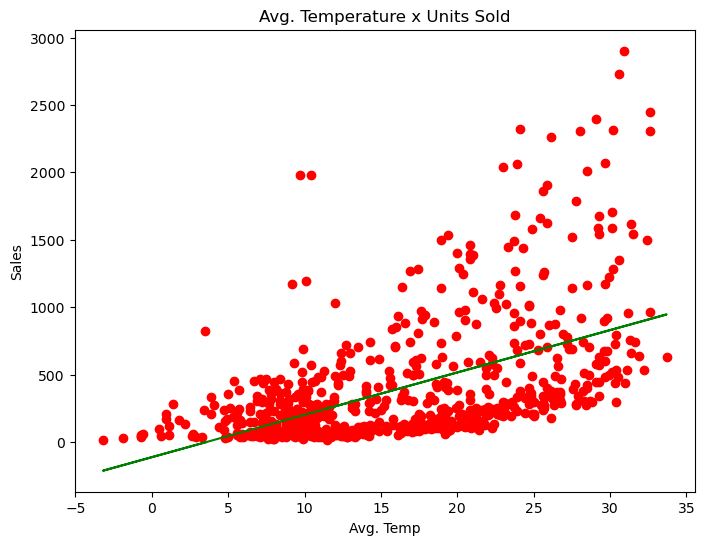

In [65]:
# Plot the graph with a regression line.
# Set plot area
plt.figure(figsize=(8, 6))

# Plot actual figures on scatterplot
plt.scatter(x, y, color='red')
#Plot regression line where py = predicted values
plt.plot(x, py, color='green')

# Set the title and legends for the graph.  
plt.title("Avg. Temperature x Units Sold")
plt.xlabel("Avg. Temp")
plt.ylabel("Sales") 

# Print the graph. 
plt.show()

#### b) Linear Regression: Fri - Sun x Units Sold
##### Summary:
- Fri - Sun explains 30% of the variations in daily units sold
- Being a Friday, Saturday, or Sunday increases sales by 507 units on average, compared to weekdays

In [67]:
# Check the importance of Fri-Sun
sd_daily['Fri-Sun'] = sd_daily['day_of_the_week'].isin(['Friday', 'Saturday', 'Sunday'])

In [68]:
# Check column added
sd_daily.head()

date  tavg  sold_units  tmax__35_or_above day_of_the_week  \
0 2021-01-01   3.5       827.0              False          Friday   
1 2021-01-02   1.8       166.0              False        Saturday   
2 2021-01-03   2.2       138.0              False          Sunday   
3 2021-01-04   2.6        45.0              False          Monday   
4 2021-01-05   0.9       172.0              False         Tuesday   

   public_holiday  festivals  tmax  prcp month_day  year month_day_sortable  \
0             NaN        NaN   6.5   0.0    Jan 01  2021         2025-01-01   
1             0.0        0.0   5.4   0.0    Jan 02  2021         2025-01-02   
2             1.0        0.0   7.8   0.0    Jan 03  2021         2025-01-03   
3             0.0        NaN   5.4   0.0    Jan 04  2021         2025-01-04   
4             0.0        NaN   4.7   0.0    Jan 05  2021         2025-01-05   

   Fri-Sun  
0     True  
1     True  
2     True  
3    False  
4    False

In [69]:
# Define independent variable and add constant
x = sd_daily['Fri-Sun'].astype(int)
x_constant = sm.add_constant(x)

# Define dependent variable.
y = sd_daily['sold_units']

# Create model 
model = sm.OLS(y, x_constant).fit()

# Print summary of metrics
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             sold_units   R-squared:                       0.297
Model:                            OLS   Adj. R-squared:                  0.296
Method:                 Least Squares   F-statistic:                     300.4
Date:                Sun, 01 Jun 2025   Prob (F-statistic):           2.13e-56
Time:                        18:24:43   Log-Likelihood:                -5258.5
No. Observations:                 713   AIC:                         1.052e+04
Df Residuals:                     711   BIC:                         1.053e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        176.1106     19.168      9.188      0.0

#### c) Linear Regression: Public Holidays vs. Units Sold
##### Summary
- The model shows Public Holidays only explains 0.3% of the variation in Units Sold
- The results are not statistically significant, as the P-value is over 0.05 (0.123)

In [71]:
# Check how many missing values there are
sd_daily['public_holiday'].isna().sum()

8

In [72]:
# Define independent variable and add constant
x = sd_daily['public_holiday'].fillna(False).astype(int)
x_constant = sm.add_constant(x)

# Define dependent variable.
y = sd_daily['sold_units']

# Create model 
model = sm.OLS(y, x_constant).fit()

# Print summary of metrics
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             sold_units   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2.387
Date:                Sun, 01 Jun 2025   Prob (F-statistic):              0.123
Time:                        18:24:43   Log-Likelihood:                -5382.9
No. Observations:                 713   AIC:                         1.077e+04
Df Residuals:                     711   BIC:                         1.078e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            386.5075     17.868     21.

In [73]:
# Filter only 2022 because of Covid in 2021
sd_daily_2022 = sd_daily[sd_daily['year'] == 2022].copy()

# Define independent variable and add constant
x = sd_daily_2022['public_holiday'].fillna(False).astype(int)
x_constant = sm.add_constant(x)

# Define dependent variable
y = sd_daily_2022['sold_units']

# Create and fit model
model = sm.OLS(y, x_constant).fit()

# Print summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             sold_units   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     2.817
Date:                Sun, 01 Jun 2025   Prob (F-statistic):             0.0942
Time:                        18:24:43   Log-Likelihood:                -2651.8
No. Observations:                 348   AIC:                             5308.
Df Residuals:                     346   BIC:                             5315.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            393.7957     27.530     14.

#### d) Linear Regression: Festivals vs. Units Sold
##### Summary
- The model shows Public Holidays only explains 0.1% of the variation in Units Sold
- The results are not statistically significant, as the P-value is over 0.05 (0.333)

In [75]:
sd_daily['festivals'].value_counts()

festivals
0.0    641
1.0     50
Name: count, dtype: int64

In [76]:
# Check how many missing values there are
sd_daily['festivals'].isna().sum()

22

In [77]:
# Define independent variable and add constant
x = sd_daily['festivals'].fillna(False).astype(int)
x_constant = sm.add_constant(x)

# Define dependent variable.
y = sd_daily['sold_units']

# Create model 
model = sm.OLS(y, x_constant).fit()

# Print summary of metrics
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             sold_units   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9402
Date:                Sun, 01 Jun 2025   Prob (F-statistic):              0.333
Time:                        18:24:43   Log-Likelihood:                -5383.7
No. Observations:                 713   AIC:                         1.077e+04
Df Residuals:                     711   BIC:                         1.078e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        398.3409     17.900     22.254      0.0

In [78]:
# Filter data for 2022 only
sd_daily_2022 = sd_daily[sd_daily['year'] == 2022]

# Define independent variable and add constant
x = sd_daily_2022['festivals'].fillna(False).astype(int)
x_constant = sm.add_constant(x)

# Define dependent variable
y = sd_daily_2022['sold_units']

# Create model
model = sm.OLS(y, x_constant).fit()

# Print summary of metrics
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             sold_units   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.4158
Date:                Sun, 01 Jun 2025   Prob (F-statistic):              0.519
Time:                        18:24:43   Log-Likelihood:                -2653.0
No. Observations:                 348   AIC:                             5310.
Df Residuals:                     346   BIC:                             5318.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        411.9201     28.064     14.678      0.0

In [79]:
sd_daily.head()

date  tavg  sold_units  tmax__35_or_above day_of_the_week  \
0 2021-01-01   3.5       827.0              False          Friday   
1 2021-01-02   1.8       166.0              False        Saturday   
2 2021-01-03   2.2       138.0              False          Sunday   
3 2021-01-04   2.6        45.0              False          Monday   
4 2021-01-05   0.9       172.0              False         Tuesday   

   public_holiday  festivals  tmax  prcp month_day  year month_day_sortable  \
0             NaN        NaN   6.5   0.0    Jan 01  2021         2025-01-01   
1             0.0        0.0   5.4   0.0    Jan 02  2021         2025-01-02   
2             1.0        0.0   7.8   0.0    Jan 03  2021         2025-01-03   
3             0.0        NaN   5.4   0.0    Jan 04  2021         2025-01-04   
4             0.0        NaN   4.7   0.0    Jan 05  2021         2025-01-05   

   Fri-Sun  
0     True  
1     True  
2     True  
3    False  
4    False

#### e) Multiple Linear Regression: tavg, Fri-Sun, Festivals & Public Holidays vs. Units Sold
##### Summary
- The model  explains 58% of the variation in Units Sold
- The results are statistically significant
- Average temperature and Fri-Sun are the main drivers of the model
- Festivals and Public Holidays have minimal impact

In [81]:
# Run multiple Linear Regression
# Define independent variable and add constant
X = sd_daily[['tavg', 'Fri-Sun','festivals', 'public_holiday']].copy()
X['festivals'] = X['festivals'].fillna(False).astype(int)
X['public_holiday'] = X['public_holiday'].fillna(False).astype(int)
X['Fri-Sun'] = X['Fri-Sun'].astype(int)

X_constant = sm.add_constant(X)

# Define dependent variable.
y = sd_daily['sold_units']

# Run model
model = sm.OLS(y, X_constant).fit()

In [82]:
# Print results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             sold_units   R-squared:                       0.584
Model:                            OLS   Adj. R-squared:                  0.581
Method:                 Least Squares   F-statistic:                     248.2
Date:                Sun, 01 Jun 2025   Prob (F-statistic):          3.74e-133
Time:                        18:24:43   Log-Likelihood:                -5071.7
No. Observations:                 713   AIC:                         1.015e+04
Df Residuals:                     708   BIC:                         1.018e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           -335.2330     27.871    -12.

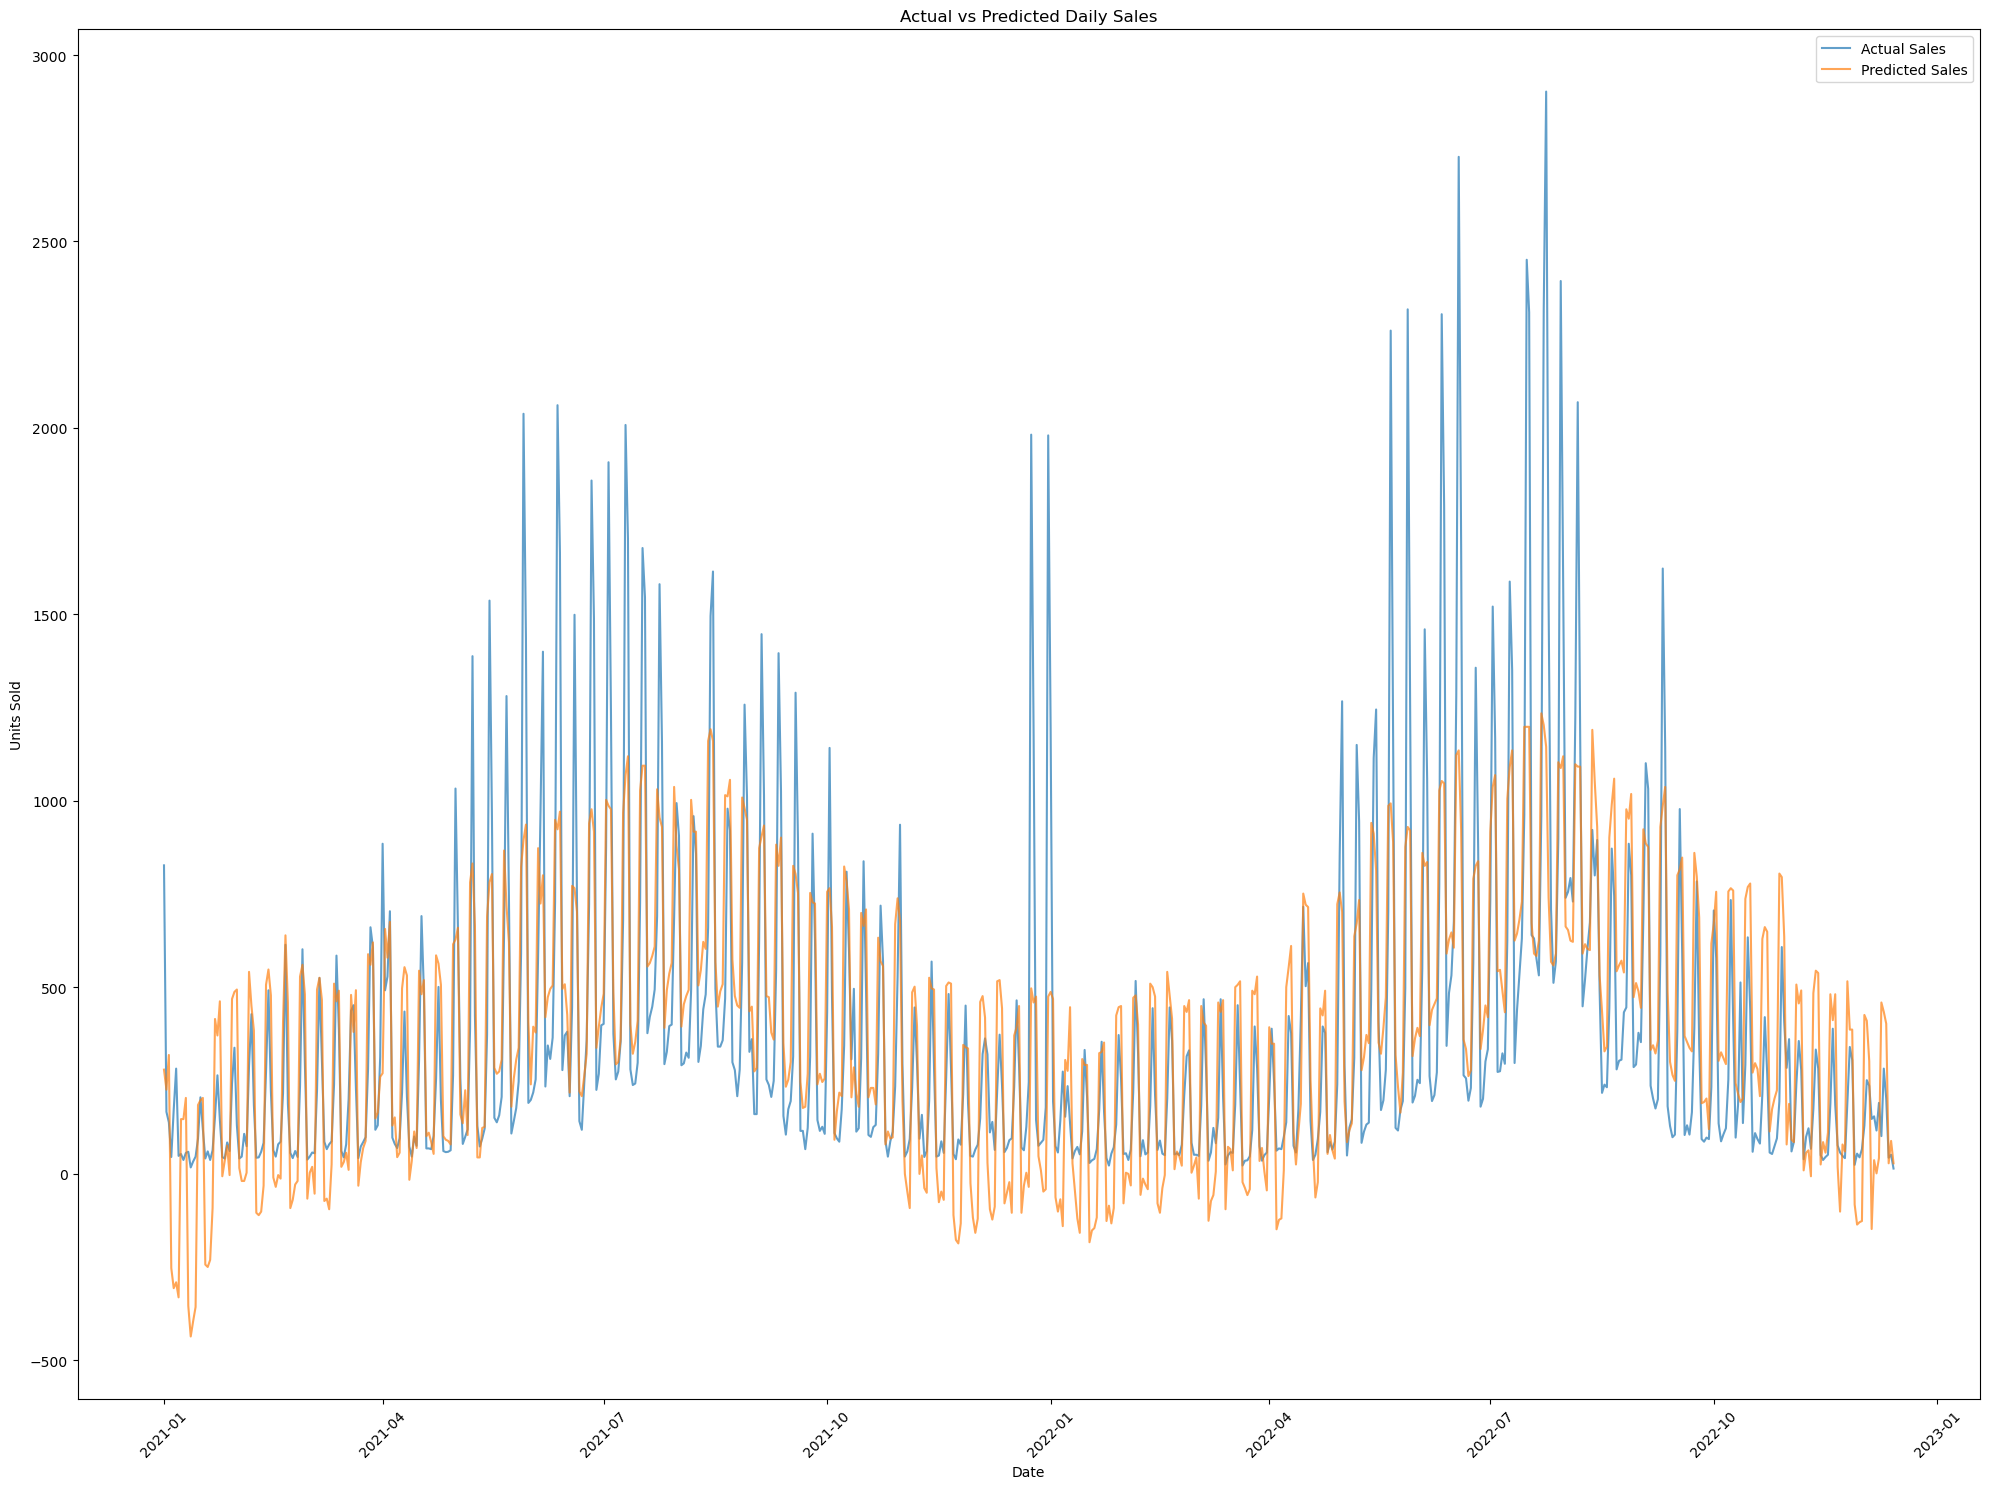

In [83]:
# Visualise the results
# Make predictions using the model
y_pred = model.predict(X_constant)

# Plot actual vs. predicted
plt.figure(figsize=(20, 15))
plt.plot(sd_daily['date'], y, label='Actual Sales', alpha=0.7)
plt.plot(sd_daily['date'], y_pred, label='Predicted Sales', alpha=0.7)

plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.title('Actual vs Predicted Daily Sales')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

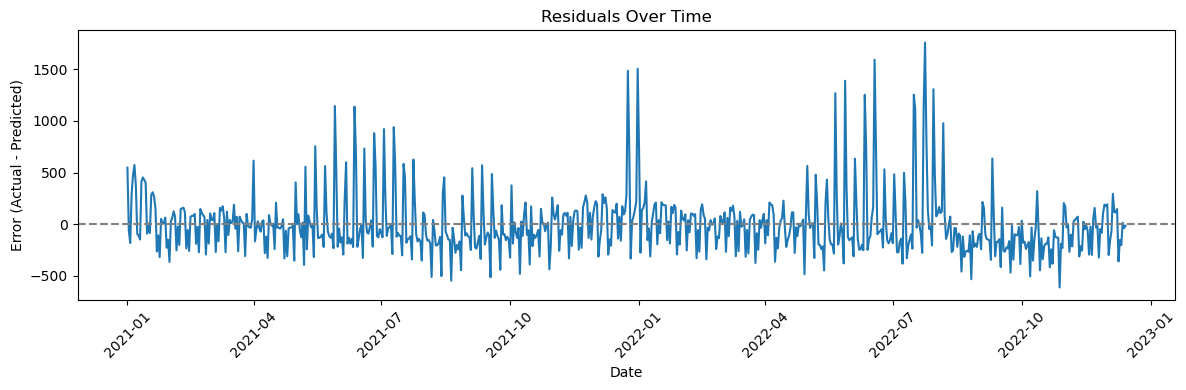

In [84]:
# Plot residuals
residuals = y - y_pred
plt.figure(figsize=(12, 4))
plt.plot(sd_daily['date'], residuals)
plt.axhline(0, color='gray', linestyle='--')
plt.title("Residuals Over Time")
plt.ylabel("Error (Actual - Predicted)")
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [85]:
sd_daily.head()

date  tavg  sold_units  tmax__35_or_above day_of_the_week  \
0 2021-01-01   3.5       827.0              False          Friday   
1 2021-01-02   1.8       166.0              False        Saturday   
2 2021-01-03   2.2       138.0              False          Sunday   
3 2021-01-04   2.6        45.0              False          Monday   
4 2021-01-05   0.9       172.0              False         Tuesday   

   public_holiday  festivals  tmax  prcp month_day  year month_day_sortable  \
0             NaN        NaN   6.5   0.0    Jan 01  2021         2025-01-01   
1             0.0        0.0   5.4   0.0    Jan 02  2021         2025-01-02   
2             1.0        0.0   7.8   0.0    Jan 03  2021         2025-01-03   
3             0.0        NaN   5.4   0.0    Jan 04  2021         2025-01-04   
4             0.0        NaN   4.7   0.0    Jan 05  2021         2025-01-05   

   Fri-Sun  
0     True  
1     True  
2     True  
3    False  
4    False

#### f) Multiple Linear Regression: tavg, Fri-Sun, Festivals, Public Holidays, Hot Days vs. Units Sold
##### Summary
- The model  explains 60% of the variation in Units Sold
- The results are statistically significant
- Extreme heat days drive large spikes — 240 extra units

In [87]:
# Run model with Hot Day indicator included
# Define independent variable and add constant
X = sd_daily[['tavg', 'Fri-Sun','festivals', 'public_holiday', 'tmax__35_or_above']].copy()
X['festivals'] = X['festivals'].fillna(False).astype(int)
X['public_holiday'] = X['public_holiday'].fillna(False).astype(int)
X['Fri-Sun'] = X['Fri-Sun'].astype(int)
X['tmax__35_or_above'] = X['tmax__35_or_above'].astype(int)

X_constant = sm.add_constant(X)

# Define dependent variable.
y = sd_daily['sold_units']

# Run model
model = sm.OLS(y, X_constant).fit()

In [88]:
# Print results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             sold_units   R-squared:                       0.600
Model:                            OLS   Adj. R-squared:                  0.597
Method:                 Least Squares   F-statistic:                     211.7
Date:                Sun, 01 Jun 2025   Prob (F-statistic):          7.50e-138
Time:                        18:24:43   Log-Likelihood:                -5057.9
No. Observations:                 713   AIC:                         1.013e+04
Df Residuals:                     707   BIC:                         1.016e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              -273.7139     29.73

In [89]:
sd_2022 = sd[sd['year'] == 2022]

sd_2022.head()

year     province town_city  post_code  company_code  \
20180  2022.0  Guadalajara   ALOVERA    19208.0        5561.0   
20181  2022.0  Guadalajara   ALOVERA    19208.0        5561.0   
20182  2022.0  Guadalajara   ALOVERA    19208.0        5561.0   
20183  2022.0  Guadalajara   ALOVERA    19208.0        5561.0   
20184  2022.0  Guadalajara   ALOVERA    19208.0        5561.0   

       petrol_station_code petrol_station       date  sold_units  \
20180                459.0        ALOVERA 2022-01-01         3.0   
20181                459.0        ALOVERA 2022-01-21         3.0   
20182                459.0        ALOVERA 2022-02-04         1.0   
20183                459.0        ALOVERA 2022-02-06         2.0   
20184                459.0        ALOVERA 2022-02-20         3.0   

      day_of_the_week  ...  tmax  prcp  snow   wdir  wspd wpgt    pres  \
20180        Saturday  ...  16.7   0.0   NaN   21.0   6.1  NaN  1028.6   
20181          Friday  ...   8.9   0.0   NaN   32.0  10.7  NaN  1027.9   
20182          Friday  ...  13.2   0.0   NaN  269.0   5.0  NaN  1022.5   
20183          Sunday  ...  13.2   0.0   NaN   33.0   9.3  NaN  1029.3   
20184          Sunday  ...  14.1   0.0   NaN   39.0   8.2  NaN  1029.5   

      tmax__35_or_above     month_year  week  
20180               0.0   January 2022    52  
20181               0.0   January 2022     3  
20182               0.0  February 2022     5  
20183               0.0  February 2022     5  
20184               0.0  February 2022     7  

[5 rows x 35 columns]

#### g) Multiple Linear Regression: tmax, festivals, public holiday, hot days
- Moving from average temperature to maximum temperature appears to have improved the model performance
- Festival and Public Holidays markers still don't have a meaningful impact
- hot days still shows positive impact on model

In [91]:
# Run model with Hot Day indicator included
# Define independent variable and add constant
X = sd_daily[['tmax','festivals', 'public_holiday', 'tmax__35_or_above']].copy()
X['festivals'] = X['festivals'].fillna(False).astype(int)
X['public_holiday'] = X['public_holiday'].fillna(False).astype(int)
X['tmax__35_or_above'] = X['tmax__35_or_above'].astype(int)

X_constant = sm.add_constant(X)

# Define dependent variable.
y = sd_daily['sold_units']

# Run model
model = sm.OLS(y, X_constant).fit()

# Print summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             sold_units   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.307
Method:                 Least Squares   F-statistic:                     79.87
Date:                Sun, 01 Jun 2025   Prob (F-statistic):           6.18e-56
Time:                        18:24:43   Log-Likelihood:                -5251.4
No. Observations:                 713   AIC:                         1.051e+04
Df Residuals:                     708   BIC:                         1.054e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              -130.1607     42.12

#### h) Multiple Linear Regression: splitting out all days of week & tmax
- these 2 variables account for over 66% of variation in total sales
- Saturday has the biggest impact (+497 sales vs. Friday), then Sunday (+249 sales vs. Friday)
- Monday to Thursday all have negative impact on sales vs. Friday (c.-250 sales each day)

In [93]:
sd_daily.columns

Index(['date', 'tavg', 'sold_units', 'tmax__35_or_above', 'day_of_the_week',
       'public_holiday', 'festivals', 'tmax', 'prcp', 'month_day', 'year',
       'month_day_sortable', 'Fri-Sun'],
      dtype='object')

In [94]:
# Create dummy variables for each day of the week
day_dummies = pd.get_dummies(sd_daily['day_of_the_week'], prefix='day', drop_first=True)

# Combine with tmax
X = pd.concat([sd_daily[['tmax']], day_dummies], axis=1)

# Convert all to float (ensures proper dtype)
X = X.astype(float)

# Add constant
X = sm.add_constant(X)

# Define dependent variable
y = sd_daily['sold_units']

# Run the regression
model = sm.OLS(y, X).fit()

# View results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             sold_units   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                     199.9
Date:                Sun, 01 Jun 2025   Prob (F-statistic):          1.06e-162
Time:                        18:24:43   Log-Likelihood:                -4994.3
No. Observations:                 713   AIC:                         1.000e+04
Df Residuals:                     705   BIC:                         1.004e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -152.6274     35.834     -4.259

#### i) Multiple Linear Regression: days of week & tmax but filtered to only 2022
- Filter out 2021 data as impacted by Covid
- Model improves to explain 69% of the variation in units sold


In [96]:
# Filter the data for 2022
sd_2022 = sd_daily[sd_daily['date'].dt.year == 2022].copy()

# Create dummy variables for each day of the week
day_dummies = pd.get_dummies(sd_2022['day_of_the_week'], prefix='day', drop_first=True)

# Combine with tmax
X = pd.concat([sd_2022[['tmax']], day_dummies], axis=1)

# Convert all to float to ensure proper dtype
X = X.astype(float)

# Add constant
X = sm.add_constant(X)

# Define dependent variable
y = sd_2022['sold_units']

# Run the regression
model = sm.OLS(y, X).fit()

# View results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             sold_units   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     106.6
Date:                Sun, 01 Jun 2025   Prob (F-statistic):           8.47e-82
Time:                        18:24:43   Log-Likelihood:                -2451.2
No. Observations:                 348   AIC:                             4918.
Df Residuals:                     340   BIC:                             4949.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -304.8412     54.463     -5.597

#### j) Multiple Linear Regression: day of week, tmax & hot Saturday, Sunday & Monday flag (2022)
- Check to see if impact of temperature over 35 degrees AND being a weekend has incremental impact on sales
- With these included model has now improved to explain 78% of variation in units sold
- Hot Saturday as sees increase in sales of +1,087

In [98]:
# Create a column for Hot Saturdays (i.e. Saturdays which are over 35 degrees)
sd_2022['hot_saturday'] = (sd_2022['day_of_the_week'] == 'Saturday') & (sd_2022['tmax__35_or_above'] == True)

In [99]:
# Create a column for Hot Sunday (i.e. Sunday which are over 35 degrees)
sd_2022['hot_sunday'] = (sd_2022['day_of_the_week'] == 'Sunday') & (sd_2022['tmax__35_or_above'] == True)

In [100]:
# Create a column for Hot Friday (i.e. Friday which are over 35 degrees)
sd_2022['hot_friday'] = (sd_2022['day_of_the_week'] == 'Friday') & (sd_2022['tmax__35_or_above'] == True)

In [101]:
sd_2022.head()

date  tavg  sold_units  tmax__35_or_above day_of_the_week  \
365 2022-01-01  10.1      1196.0              False        Saturday   
366 2022-01-02   9.5       194.0              False          Sunday   
367 2022-01-03   9.1        74.0              False          Monday   
368 2022-01-04   7.4        57.0              False         Tuesday   
369 2022-01-05   5.9       143.0              False       Wednesday   

     public_holiday  festivals  tmax  prcp month_day  year month_day_sortable  \
365             NaN        NaN  16.7   0.0    Jan 01  2022         2025-01-01   
366             0.0        0.0  14.5   0.0    Jan 02  2022         2025-01-02   
367             0.0        1.0  13.8   0.0    Jan 03  2022         2025-01-03   
368             0.0        0.0  12.1   7.3    Jan 04  2022         2025-01-04   
369             1.0        NaN   8.9   5.0    Jan 05  2022         2025-01-05   

     Fri-Sun  hot_saturday  hot_sunday  hot_friday  
365     True         False       False       False  
366     True         False       False       False  
367    False         False       False       False  
368    False         False       False       False  
369    False         False       False       False

In [102]:
# Create dummy variables for each day of the week
day_dummies = pd.get_dummies(sd_2022['day_of_the_week'], prefix='day', drop_first=True)

# Combine with tmax + hot_saturdays
X = pd.concat([sd_2022[['tmax', 'hot_saturday', 'hot_friday', 'hot_sunday']], day_dummies], axis=1)

# Convert all to float to ensure proper dtype
X = X.astype(float)

# Add constant
X = sm.add_constant(X)

# Define dependent variable
y = sd_2022['sold_units']

# Run the regression
model = sm.OLS(y, X).fit()

# View results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             sold_units   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     122.9
Date:                Sun, 01 Jun 2025   Prob (F-statistic):          4.97e-106
Time:                        18:24:44   Log-Likelihood:                -2385.9
No. Observations:                 348   AIC:                             4794.
Df Residuals:                     337   BIC:                             4836.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -184.7789     47.088     -3.924

In [103]:
# Reset indexes to ensure alignment
sd_2022 = sd_2022.reset_index(drop=True)
X = X.reset_index(drop=True)

# Generate predictions
sd_2022['predicted_sold_units'] = model.predict(X)

In [104]:
sd_2022.head()

date  tavg  sold_units  tmax__35_or_above day_of_the_week  \
0 2022-01-01  10.1      1196.0              False        Saturday   
1 2022-01-02   9.5       194.0              False          Sunday   
2 2022-01-03   9.1        74.0              False          Monday   
3 2022-01-04   7.4        57.0              False         Tuesday   
4 2022-01-05   5.9       143.0              False       Wednesday   

   public_holiday  festivals  tmax  prcp month_day  year month_day_sortable  \
0             NaN        NaN  16.7   0.0    Jan 01  2022         2025-01-01   
1             0.0        0.0  14.5   0.0    Jan 02  2022         2025-01-02   
2             0.0        1.0  13.8   0.0    Jan 03  2022         2025-01-03   
3             0.0        0.0  12.1   7.3    Jan 04  2022         2025-01-04   
4             1.0        NaN   8.9   5.0    Jan 05  2022         2025-01-05   

   Fri-Sun  hot_saturday  hot_sunday  hot_friday  predicted_sold_units  
0     True         False       False       False            655.518256  
1     True         False       False       False            426.338816  
2    False         False       False       False            -21.035267  
3    False         False       False       False            -93.419626  
4    False         False       False       False           -146.807541

In [105]:
# Evaluate Model Fit 
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(sd_2022['sold_units'], sd_2022['predicted_sold_units'])
print(f"Mean Absolute Error: {mae:.2f}")

Mean Absolute Error: 155.30


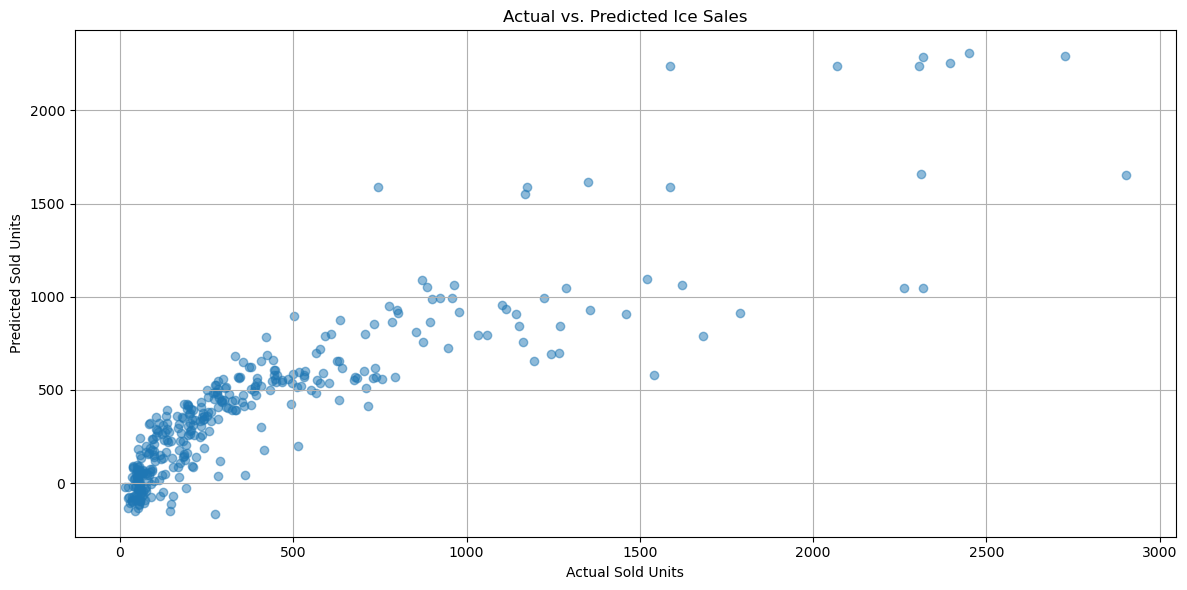

In [106]:
# Plot Prediction vs. Actual

plt.figure(figsize=(12, 6))
plt.scatter(sd_2022['sold_units'], sd_2022['predicted_sold_units'], alpha=0.5)
plt.xlabel('Actual Sold Units')
plt.ylabel('Predicted Sold Units')
plt.title('Actual vs. Predicted Ice Sales')
plt.grid(True)
plt.tight_layout()
plt.show()

#### k) Multiple Linear Regression: Run best model (day of week, tmax & hot Saturday, Sunday & Monday flag (2022)) but apply to station level data
- Model performance drops when applied to Station Level data rather than total sales across all stations
- Model only explains 19% of variation

In [108]:
# Group the data by date and station
sd_store_daily_2022 = sd.groupby(['date', 'petrol_station']).agg({
    'tavg' : 'mean',
    'sold_units' : 'sum',
    'tmax__35_or_above' : 'any',
    'day_of_the_week' : 'first',
    'public_holiday' : 'first',
    'festivals': 'first',
    'tmax' : 'mean',
    'prcp' : 'mean'
}).reset_index()

sd_store_daily_2022.head()

date         petrol_station  tavg  sold_units  tmax__35_or_above  \
0 2021-01-01       ALBERTO AGUILERA   3.5        13.0              False   
1 2021-01-01      ALCALÁ DE HENARES   3.5         2.0              False   
2 2021-01-01             ALCOBENDAS   3.5         6.0              False   
3 2021-01-01           ARTURO SORIA   3.5        40.0              False   
4 2021-01-01  AVDA. ANDALUCÍA DCHO.   3.5        85.0              False   

  day_of_the_week  public_holiday  festivals  tmax  prcp  
0          Friday             NaN        NaN   6.5   0.0  
1          Friday             NaN        NaN   6.5   0.0  
2          Friday             NaN        NaN   6.5   0.0  
3          Friday             NaN        NaN   6.5   0.0  
4          Friday             NaN        NaN   6.5   0.0

In [109]:
# Create a column for Hot Saturdays (i.e. Saturdays which are over 35 degrees)
sd_store_daily_2022['hot_saturday'] = (sd_store_daily_2022['day_of_the_week'] == 'Saturday') & (sd_store_daily_2022['tmax__35_or_above'] == True)

In [110]:
# Create a column for Hot Sunday (i.e. Sunday which are over 35 degrees)
sd_store_daily_2022['hot_sunday'] = (sd_store_daily_2022['day_of_the_week'] == 'Sunday') & (sd_store_daily_2022['tmax__35_or_above'] == True)

In [111]:
# Create a column for Hot Friday (i.e. Friday which are over 35 degrees)
sd_store_daily_2022['hot_friday'] = (sd_store_daily_2022['day_of_the_week'] == 'Friday') & (sd_store_daily_2022['tmax__35_or_above'] == True)

In [112]:
# Create dummy variables for each day of the week
day_dummies = pd.get_dummies(sd_store_daily_2022['day_of_the_week'], prefix='day', drop_first=True)

# Combine with tmax + hot_saturdays
X = pd.concat([sd_store_daily_2022[['tmax', 'hot_saturday', 'hot_friday', 'hot_sunday']], day_dummies], axis=1)

# Convert all to float to ensure proper dtype
X = X.astype(float)

# Add constant
X = sm.add_constant(X)

# Define dependent variable
y = sd_store_daily_2022['sold_units']

# Run the regression
model = sm.OLS(y, X).fit()

# View results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             sold_units   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.197
Method:                 Least Squares   F-statistic:                     952.6
Date:                Sun, 01 Jun 2025   Prob (F-statistic):               0.00
Time:                        18:24:44   Log-Likelihood:            -1.4404e+05
No. Observations:               38699   AIC:                         2.881e+05
Df Residuals:                   38688   BIC:                         2.882e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2882      0.188      1.532

In [113]:
# Generate predictions
sd_store_daily_2022['predicted'] = model.predict(X)

sd_store_daily_2022.head()

date         petrol_station  tavg  sold_units  tmax__35_or_above  \
0 2021-01-01       ALBERTO AGUILERA   3.5        13.0              False   
1 2021-01-01      ALCALÁ DE HENARES   3.5         2.0              False   
2 2021-01-01             ALCOBENDAS   3.5         6.0              False   
3 2021-01-01           ARTURO SORIA   3.5        40.0              False   
4 2021-01-01  AVDA. ANDALUCÍA DCHO.   3.5        85.0              False   

  day_of_the_week  public_holiday  festivals  tmax  prcp  hot_saturday  \
0          Friday             NaN        NaN   6.5   0.0         False   
1          Friday             NaN        NaN   6.5   0.0         False   
2          Friday             NaN        NaN   6.5   0.0         False   
3          Friday             NaN        NaN   6.5   0.0         False   
4          Friday             NaN        NaN   6.5   0.0         False   

   hot_sunday  hot_friday  predicted  
0       False       False   2.143423  
1       False       False   2.143423  
2       False       False   2.143423  
3       False       False   2.143423  
4       False       False   2.143423

In [114]:
# Calculate residuals
sd_store_daily_2022['residual'] = sd_store_daily_2022['sold_units'] - sd_store_daily_2022['predicted']

sd_store_daily_2022.head()

date         petrol_station  tavg  sold_units  tmax__35_or_above  \
0 2021-01-01       ALBERTO AGUILERA   3.5        13.0              False   
1 2021-01-01      ALCALÁ DE HENARES   3.5         2.0              False   
2 2021-01-01             ALCOBENDAS   3.5         6.0              False   
3 2021-01-01           ARTURO SORIA   3.5        40.0              False   
4 2021-01-01  AVDA. ANDALUCÍA DCHO.   3.5        85.0              False   

  day_of_the_week  public_holiday  festivals  tmax  prcp  hot_saturday  \
0          Friday             NaN        NaN   6.5   0.0         False   
1          Friday             NaN        NaN   6.5   0.0         False   
2          Friday             NaN        NaN   6.5   0.0         False   
3          Friday             NaN        NaN   6.5   0.0         False   
4          Friday             NaN        NaN   6.5   0.0         False   

   hot_sunday  hot_friday  predicted   residual  
0       False       False   2.143423  10.856577  
1       False       False   2.143423  -0.143423  
2       False       False   2.143423   3.856577  
3       False       False   2.143423  37.856577  
4       False       False   2.143423  82.856577

In [115]:
# Group residuals by station
station_residuals = sd_store_daily_2022.groupby('petrol_station')['residual'].agg(['mean', 'std', 'count']).reset_index()
station_residuals.rename(columns={'mean': 'avg_residual', 'std': 'residual_std', 'count': 'days_count'}, inplace=True)

station_residuals.head()

petrol_station  avg_residual  residual_std  days_count
0         AJALVIR MD     -2.644392      5.294493         398
1         AJALVIR MI     -6.745811      5.330321          25
2   ALBERTO AGUILERA     -2.287637      6.542442         474
3  ALCALÁ DE HENARES     -7.579619      5.268693         166
4         ALCOBENDAS      0.574109      7.225815         563

#### l) Multiple Linear Regression: Week level, Station level, 2022, exploring different variables
- Running the same model as above at a weekly level rather than a daily improves the model to explain 35% of variation in weekly ice sales
- Adding in  town/city via dummy variables improves model to explain 48% of variation in weekly ice sales
- Changing town/city to direction' simplies the model and only reduces the explanation to 45% of the variation in weekly ice sales
- Adding in lagged sales data (i.e. actuals from the last 2 weeks) improves the models performance to explain 69% of the variation in ice sales
- Removed Hot Sundays from model, as not a significant impact

In [117]:
# Filter to 2022 only
full_sd_2022 = sd[pd.to_datetime(sd['date']).dt.year == 2022].copy()

full_sd_2022.head()

year     province town_city  post_code  company_code  \
20180  2022.0  Guadalajara   ALOVERA    19208.0        5561.0   
20181  2022.0  Guadalajara   ALOVERA    19208.0        5561.0   
20182  2022.0  Guadalajara   ALOVERA    19208.0        5561.0   
20183  2022.0  Guadalajara   ALOVERA    19208.0        5561.0   
20184  2022.0  Guadalajara   ALOVERA    19208.0        5561.0   

       petrol_station_code petrol_station       date  sold_units  \
20180                459.0        ALOVERA 2022-01-01         3.0   
20181                459.0        ALOVERA 2022-01-21         3.0   
20182                459.0        ALOVERA 2022-02-04         1.0   
20183                459.0        ALOVERA 2022-02-06         2.0   
20184                459.0        ALOVERA 2022-02-20         3.0   

      day_of_the_week  ...  tmax  prcp  snow   wdir  wspd wpgt    pres  \
20180        Saturday  ...  16.7   0.0   NaN   21.0   6.1  NaN  1028.6   
20181          Friday  ...   8.9   0.0   NaN   32.0  10.7  NaN  1027.9   
20182          Friday  ...  13.2   0.0   NaN  269.0   5.0  NaN  1022.5   
20183          Sunday  ...  13.2   0.0   NaN   33.0   9.3  NaN  1029.3   
20184          Sunday  ...  14.1   0.0   NaN   39.0   8.2  NaN  1029.5   

      tmax__35_or_above     month_year  week  
20180               0.0   January 2022    52  
20181               0.0   January 2022     3  
20182               0.0  February 2022     5  
20183               0.0  February 2022     5  
20184               0.0  February 2022     7  

[5 rows x 35 columns]

In [118]:
# Create a column for Hot Saturdays (i.e. Saturdays which are over 35 degrees)
full_sd_2022['hot_saturday'] = (full_sd_2022['day_of_the_week'] == 'Saturday') & (full_sd_2022['tmax__35_or_above'] == True)

In [119]:
# Create a column for Hot Sunday (i.e. Sunday which are over 35 degrees)
full_sd_2022['hot_sunday'] = (full_sd_2022['day_of_the_week'] == 'Sunday') & (full_sd_2022['tmax__35_or_above'] == True)

In [120]:
# Create a column for Hot Friday (i.e. Friday which are over 35 degrees)
full_sd_2022['hot_friday'] = (full_sd_2022['day_of_the_week'] == 'Friday') & (full_sd_2022['tmax__35_or_above'] == True)

In [121]:
full_sd_2022.columns

Index(['year', 'province', 'town_city', 'post_code', 'company_code',
       'petrol_station_code', 'petrol_station', 'date', 'sold_units',
       'day_of_the_week', 'week_number', 'month', 'season_weight', 'season',
       'distance_madrid_km', 'direction', 'preferred_road_1',
       'preferred_road_2', 'road_type', 'total_holiday_weight', 'weekend',
       'public_holiday', 'festivals', 'tavg', 'tmin', 'tmax', 'prcp', 'snow',
       'wdir', 'wspd', 'wpgt', 'pres', 'tmax__35_or_above', 'month_year',
       'week', 'hot_saturday', 'hot_sunday', 'hot_friday'],
      dtype='object')

In [122]:
# Group data by week to rerun model at week level
sd_weekly_2022 = full_sd_2022.groupby(['petrol_station', 'week_number']).agg({
    'sold_units': 'sum',
    'tmax': 'mean',
    'hot_saturday': 'sum',
    'hot_friday': 'sum',
    'hot_sunday': 'sum',
    'festivals': 'sum',
    'public_holiday': 'sum',
    'distance_madrid_km': 'first',  
    'season': 'first',              
    'month': 'first'
}).reset_index()

sd_weekly_2022.head()

petrol_station  week_number  sold_units       tmax  hot_saturday  \
0     AJALVIR MD          1.0         6.0   8.100000             0   
1     AJALVIR MD          2.0        13.0  11.750000             0   
2     AJALVIR MD          3.0         8.0  10.066667             0   
3     AJALVIR MD          4.0         6.0  13.200000             0   
4     AJALVIR MD          5.0         7.0  14.266667             0   

   hot_friday  hot_sunday  festivals  public_holiday  distance_madrid_km  \
0           0           0        1.0             2.0                36.9   
1           0           0        0.0             0.0                36.9   
2           0           0        0.0             0.0                36.9   
3           0           0        0.0             0.0                36.9   
4           0           0        2.0             0.0                36.9   

   season  month  
0  winter    1.0  
1  winter    1.0  
2  winter    1.0  
3  winter    1.0  
4  winter    2.0

In [123]:
# Create dummy variables for each month
month_dummies = pd.get_dummies(sd_weekly_2022['month'], prefix='month', drop_first=True)

# Combine with tmax + hot_saturdays
X = pd.concat([sd_weekly_2022[['tmax', 'hot_saturday', 'hot_friday', 'hot_sunday']], month_dummies], axis=1)

# Convert all to float to ensure proper dtype
X = X.astype(float)

# Add constant
X = sm.add_constant(X)

# Define dependent variable
y = sd_weekly_2022['sold_units']

# Run the regression
model = sm.OLS(y, X).fit()

# View results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             sold_units   R-squared:                       0.346
Model:                            OLS   Adj. R-squared:                  0.343
Method:                 Least Squares   F-statistic:                     148.2
Date:                Sun, 01 Jun 2025   Prob (F-statistic):               0.00
Time:                        18:24:44   Log-Likelihood:                -21062.
No. Observations:                4226   AIC:                         4.216e+04
Df Residuals:                    4210   BIC:                         4.226e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            3.7079      3.205      1.157   

In [124]:
sd.head()

year     province town_city  post_code  company_code  \
0  2021.0  Guadalajara   ALOVERA    19208.0        5561.0   
1  2021.0  Guadalajara   ALOVERA    19208.0        5561.0   
2  2021.0  Guadalajara   ALOVERA    19208.0        5561.0   
3  2021.0  Guadalajara   ALOVERA    19208.0        5561.0   
4  2021.0  Guadalajara   ALOVERA    19208.0        5561.0   

   petrol_station_code petrol_station       date  sold_units day_of_the_week  \
0                459.0        ALOVERA 2021-01-03         1.0          Sunday   
1                459.0        ALOVERA 2021-01-27         2.0       Wednesday   
2                459.0        ALOVERA 2021-02-14         1.0          Sunday   
3                459.0        ALOVERA 2021-02-27         1.0        Saturday   
4                459.0        ALOVERA 2021-03-06         2.0        Saturday   

   ...  tmax  prcp  snow   wdir  wspd wpgt    pres tmax__35_or_above  \
0  ...   7.8   0.0   NaN  267.0  11.4  NaN  1017.0               0.0   
1  ...  17.8   0.0   NaN  275.0   9.6  NaN  1025.2               0.0   
2  ...  14.6   0.0   NaN   67.0   5.7  NaN  1029.6               0.0   
3  ...  18.2   0.0   NaN   46.0   9.7  NaN  1025.1               0.0   
4  ...  14.8   0.0   NaN   73.0   8.6  NaN  1019.9               0.0   

      month_year  week  
0   January 2021    53  
1   January 2021     4  
2  February 2021     6  
3  February 2021     8  
4     March 2021     9  

[5 rows x 35 columns]

In [125]:
# Group data by week and town_city
sd_town_weekly_2022 = full_sd_2022.groupby(['direction', 'town_city', 'petrol_station', 'week_number']).agg({
    'sold_units': 'sum',
    'tmax': 'mean',
    'hot_saturday': 'sum',
    'hot_friday': 'sum',
    'hot_sunday': 'sum',
    'festivals': 'sum',
    'public_holiday': 'sum',
    'distance_madrid_km': 'first',  # static per station
    'season': 'first',              # you could also mode() this
    'month': 'first'
}).reset_index()

sd_town_weekly_2022.head()

direction town_city    petrol_station  week_number  sold_units       tmax  \
0         -    MADRID  ALBERTO AGUILERA          1.0        26.0   9.966667   
1         -    MADRID  ALBERTO AGUILERA          2.0         8.0   8.525000   
2         -    MADRID  ALBERTO AGUILERA          3.0         8.0  10.300000   
3         -    MADRID  ALBERTO AGUILERA          4.0         3.0  15.750000   
4         -    MADRID  ALBERTO AGUILERA          5.0         8.0  13.750000   

   hot_saturday  hot_friday  hot_sunday  festivals  public_holiday  \
0             0           0           0        0.0             1.0   
1             0           0           0        0.0             0.0   
2             0           0           0        0.0             0.0   
3             0           0           0        0.0             0.0   
4             0           0           0        1.0             0.0   

   distance_madrid_km  season  month  
0                 3.3  winter    1.0  
1                 3.3  winter    1.0  
2                 3.3  winter    1.0  
3                 3.3  winter    1.0  
4                 3.3  winter    2.0

In [126]:
# Run model on week and town level
# Create dummy variables for each month
month_dummies = pd.get_dummies(sd_town_weekly_2022['month'], prefix='month', drop_first=True)

# Create dummy variables for each month
town_dummies = pd.get_dummies(sd_town_weekly_2022['town_city'], prefix='town', drop_first=True)

# Combine with tmax + hot_saturdays
X = pd.concat([sd_town_weekly_2022[['tmax', 'hot_saturday', 'hot_friday', 'hot_sunday']], month_dummies, town_dummies], axis=1)

# Convert all to float to ensure proper dtype
X = X.astype(float)

# Add constant
X = sm.add_constant(X)

# Define dependent variable
y = sd_town_weekly_2022['sold_units']

# Run the regression
model = sm.OLS(y, X).fit()

# View results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             sold_units   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.474
Method:                 Least Squares   F-statistic:                     71.38
Date:                Sun, 01 Jun 2025   Prob (F-statistic):               0.00
Time:                        18:24:44   Log-Likelihood:                -20575.
No. Observations:                4226   AIC:                         4.126e+04
Df Residuals:                    4171   BIC:                         4.161e+04
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [127]:
# Run model on week and direction level
# Create dummy variables for each month
month_dummies = pd.get_dummies(sd_town_weekly_2022['month'], prefix='month', drop_first=True)

# Create dummy variables for each month
direction_dummies = pd.get_dummies(sd_town_weekly_2022['direction'], prefix='direction', drop_first=True)

# Combine with tmax + hot_saturdays
X = pd.concat([sd_town_weekly_2022[['tmax', 'hot_saturday', 'hot_friday', 'hot_sunday']], month_dummies, direction_dummies], axis=1)

# Convert all to float to ensure proper dtype
X = X.astype(float)

# Add constant
X = sm.add_constant(X)

# Define dependent variable
y = sd_town_weekly_2022['sold_units']

# Run the regression
model = sm.OLS(y, X).fit()

# View results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             sold_units   R-squared:                       0.444
Model:                            OLS   Adj. R-squared:                  0.441
Method:                 Least Squares   F-statistic:                     146.0
Date:                Sun, 01 Jun 2025   Prob (F-statistic):               0.00
Time:                        18:24:44   Log-Likelihood:                -20717.
No. Observations:                4226   AIC:                         4.148e+04
Df Residuals:                    4202   BIC:                         4.163e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           13.5201      3.206      4.217   

In [128]:
# Create a lag week variable
# Create a copy
sd_lagged_model = sd_town_weekly_2022.copy()

# Sort by petrol_station and week
sd_lagged_model = sd_lagged_model.sort_values(by=['petrol_station', 'week_number'])

# Create lag of sold_units per petrol station
sd_lagged_model['sold_units_lag1'] = sd_lagged_model.groupby('petrol_station')['sold_units'].shift(1)

# Drop only rows where lag is missing (first row for each station)
sd_lagged_model = sd_lagged_model.dropna(subset=['sold_units_lag1'])

sd_lagged_model.head()


direction town_city petrol_station  week_number  sold_units       tmax  \
1224        NE   AJALVIR     AJALVIR MD          2.0        13.0  11.750000   
1225        NE   AJALVIR     AJALVIR MD          3.0         8.0  10.066667   
1226        NE   AJALVIR     AJALVIR MD          4.0         6.0  13.200000   
1227        NE   AJALVIR     AJALVIR MD          5.0         7.0  14.266667   
1228        NE   AJALVIR     AJALVIR MD          6.0         5.0  15.666667   

      hot_saturday  hot_friday  hot_sunday  festivals  public_holiday  \
1224             0           0           0        0.0             0.0   
1225             0           0           0        0.0             0.0   
1226             0           0           0        0.0             0.0   
1227             0           0           0        2.0             0.0   
1228             0           0           0        0.0             0.0   

      distance_madrid_km  season  month  sold_units_lag1  
1224                36.9  winter    1.0              6.0  
1225                36.9  winter    1.0             13.0  
1226                36.9  winter    1.0              8.0  
1227                36.9  winter    2.0              6.0  
1228                36.9  winter    2.0              7.0

In [129]:
# Create dummy variables for each direction
direction_dummies = pd.get_dummies(sd_lagged_model['direction'], prefix='direction', drop_first=True)

# Combine predictors: tmax, hot days, lag, dummies
X = pd.concat([
    sd_lagged_model[['tmax', 'hot_saturday', 'hot_friday', 'hot_sunday', 'sold_units_lag1']],
    direction_dummies
], axis=1)

# Convert all to float to ensure proper dtype
X = X.astype(float)

# Add constant
X = sm.add_constant(X)

# Define dependent variable
y = sd_lagged_model['sold_units']

# Run the regression
model = sm.OLS(y, X).fit()

# View results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             sold_units   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     698.7
Date:                Sun, 01 Jun 2025   Prob (F-statistic):               0.00
Time:                        18:24:44   Log-Likelihood:                -19103.
No. Observations:                4134   AIC:                         3.823e+04
Df Residuals:                    4120   BIC:                         3.832e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               3.7168      1.568     

In [130]:
# Drop Hot Sunday 
# Create dummy variables for each direction
direction_dummies = pd.get_dummies(sd_lagged_model['direction'], prefix='direction', drop_first=True)

# Combine predictors: tmax, hot days, lag, dummies
X = pd.concat([
    sd_lagged_model[['tmax', 'hot_saturday', 'hot_friday', 'sold_units_lag1']],
    direction_dummies
], axis=1)

# Convert all to float to ensure proper dtype
X = X.astype(float)

# Add constant
X = sm.add_constant(X)

# Define dependent variable
y = sd_lagged_model['sold_units']

# Run the regression
model = sm.OLS(y, X).fit()

# View results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             sold_units   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     756.8
Date:                Sun, 01 Jun 2025   Prob (F-statistic):               0.00
Time:                        18:24:44   Log-Likelihood:                -19103.
No. Observations:                4134   AIC:                         3.823e+04
Df Residuals:                    4121   BIC:                         3.831e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               3.4178      1.542     

In [131]:
# Create a 2-week lag column
# Step 1: Start fresh with original data
sd_lagged_model = sd_town_weekly_2022.copy()

# Step 2: Sort for time-ordered lagging
sd_lagged_model = sd_lagged_model.sort_values(by=['petrol_station', 'week_number'])

# Step 3: Create lagged variables
sd_lagged_model['sold_units_lag1'] = sd_lagged_model.groupby('petrol_station')['sold_units'].shift(1)
sd_lagged_model['sold_units_lag2'] = sd_lagged_model.groupby('petrol_station')['sold_units'].shift(2)

# Step 4: Drop rows where either lag is missing
sd_lagged_model = sd_lagged_model.dropna(subset=['sold_units_lag1', 'sold_units_lag2'])

# Step 5: Preview modeling-ready data
sd_lagged_model.head()

direction town_city petrol_station  week_number  sold_units       tmax  \
1225        NE   AJALVIR     AJALVIR MD          3.0         8.0  10.066667   
1226        NE   AJALVIR     AJALVIR MD          4.0         6.0  13.200000   
1227        NE   AJALVIR     AJALVIR MD          5.0         7.0  14.266667   
1228        NE   AJALVIR     AJALVIR MD          6.0         5.0  15.666667   
1229        NE   AJALVIR     AJALVIR MD          7.0         6.0  15.266667   

      hot_saturday  hot_friday  hot_sunday  festivals  public_holiday  \
1225             0           0           0        0.0             0.0   
1226             0           0           0        0.0             0.0   
1227             0           0           0        2.0             0.0   
1228             0           0           0        0.0             0.0   
1229             0           0           0        0.0             0.0   

      distance_madrid_km  season  month  sold_units_lag1  sold_units_lag2  
1225                36.9  winter    1.0             13.0              6.0  
1226                36.9  winter    1.0              8.0             13.0  
1227                36.9  winter    2.0              6.0              8.0  
1228                36.9  winter    2.0              7.0              6.0  
1229                36.9  winter    2.0              5.0              7.0

In [132]:
# Run model again using 2 week lag as a variable
# Create dummy variables for each direction
direction_dummies = pd.get_dummies(sd_lagged_model['direction'], prefix='direction', drop_first=True)

# Combine predictors: tmax, hot days, lag, dummies
X = pd.concat([
    sd_lagged_model[['tmax', 'hot_saturday', 'hot_friday', 'sold_units_lag1', 'sold_units_lag2']],
    direction_dummies
], axis=1)

# Convert all to float to ensure proper dtype
X = X.astype(float)

# Add constant
X = sm.add_constant(X)

# Define dependent variable
y = sd_lagged_model['sold_units']

# Run the regression
model = sm.OLS(y, X).fit()

# View results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             sold_units   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     702.2
Date:                Sun, 01 Jun 2025   Prob (F-statistic):               0.00
Time:                        18:24:44   Log-Likelihood:                -18669.
No. Observations:                4042   AIC:                         3.737e+04
Df Residuals:                    4028   BIC:                         3.745e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               4.4580      1.581     

In [133]:
sd_lagged_model.columns

Index(['direction', 'town_city', 'petrol_station', 'week_number', 'sold_units',
       'tmax', 'hot_saturday', 'hot_friday', 'hot_sunday', 'festivals',
       'public_holiday', 'distance_madrid_km', 'season', 'month',
       'sold_units_lag1', 'sold_units_lag2'],
      dtype='object')

#### m) Multiple Linear Regression: FINAL MODEL - 2022, Weekly, Station-level, direction from Madrid, 'tmax', 'hot_saturday', 'hot_friday', 'public_holiday', 'festivals', 'sold_units_lag1', 'sold_units_lag2'
- Adding in public holidays and festivals flags improves the model to explain 70% of the varation in ice sales
- Residuals appear to increase with larger petrol stations
- Plotting actuals vs. predicted values also identifies this trend, potentially due to out of stocks

In [135]:
# Add festival & public events variables
# Create dummy variables for each direction
direction_dummies = pd.get_dummies(sd_lagged_model['direction'], prefix='direction', drop_first=True)

# Combine with other variables: tmax, hot days, lag, dummies
X = pd.concat([
    sd_lagged_model[['tmax', 'hot_saturday', 'hot_friday', 'public_holiday', 'festivals', 'sold_units_lag1', 'sold_units_lag2']],
    direction_dummies
], axis=1)

# Convert all to float to ensure proper dtype
X = X.astype(float)

# Add constant
X = sm.add_constant(X)

# Define dependent variable
y = sd_lagged_model['sold_units']

# Run the regression
model = sm.OLS(y, X).fit()

# View results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             sold_units   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     620.1
Date:                Sun, 01 Jun 2025   Prob (F-statistic):               0.00
Time:                        18:24:44   Log-Likelihood:                -18641.
No. Observations:                4042   AIC:                         3.731e+04
Df Residuals:                    4026   BIC:                         3.742e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               2.9054      1.592     

In [136]:
# Run predictions from this model
y_pred = model.predict(X)

In [137]:
# Add predictions back to dataframe
sd_lagged_model['predicted_sold_units'] = y_pred

sd_lagged_model.head()

direction town_city petrol_station  week_number  sold_units       tmax  \
1225        NE   AJALVIR     AJALVIR MD          3.0         8.0  10.066667   
1226        NE   AJALVIR     AJALVIR MD          4.0         6.0  13.200000   
1227        NE   AJALVIR     AJALVIR MD          5.0         7.0  14.266667   
1228        NE   AJALVIR     AJALVIR MD          6.0         5.0  15.666667   
1229        NE   AJALVIR     AJALVIR MD          7.0         6.0  15.266667   

      hot_saturday  hot_friday  hot_sunday  festivals  public_holiday  \
1225             0           0           0        0.0             0.0   
1226             0           0           0        0.0             0.0   
1227             0           0           0        2.0             0.0   
1228             0           0           0        0.0             0.0   
1229             0           0           0        0.0             0.0   

      distance_madrid_km  season  month  sold_units_lag1  sold_units_lag2  \
1225                36.9  winter    1.0             13.0              6.0   
1226                36.9  winter    1.0              8.0             13.0   
1227                36.9  winter    2.0              6.0              8.0   
1228                36.9  winter    2.0              7.0              6.0   
1229                36.9  winter    2.0              5.0              7.0   

      predicted_sold_units  
1225              7.802084  
1226              7.092125  
1227              8.394644  
1228              6.173199  
1229              5.163645

In [138]:
# Export dataframe 
sd_lagged_model.to_csv('predicted_sales.csv', index=False)

In [139]:
# Calculate residuals
sd_lagged_model['residual'] = sd_lagged_model['sold_units'] - sd_lagged_model['predicted_sold_units']

sd_lagged_model.head()

direction town_city petrol_station  week_number  sold_units       tmax  \
1225        NE   AJALVIR     AJALVIR MD          3.0         8.0  10.066667   
1226        NE   AJALVIR     AJALVIR MD          4.0         6.0  13.200000   
1227        NE   AJALVIR     AJALVIR MD          5.0         7.0  14.266667   
1228        NE   AJALVIR     AJALVIR MD          6.0         5.0  15.666667   
1229        NE   AJALVIR     AJALVIR MD          7.0         6.0  15.266667   

      hot_saturday  hot_friday  hot_sunday  festivals  public_holiday  \
1225             0           0           0        0.0             0.0   
1226             0           0           0        0.0             0.0   
1227             0           0           0        2.0             0.0   
1228             0           0           0        0.0             0.0   
1229             0           0           0        0.0             0.0   

      distance_madrid_km  season  month  sold_units_lag1  sold_units_lag2  \
1225                36.9  winter    1.0             13.0              6.0   
1226                36.9  winter    1.0              8.0             13.0   
1227                36.9  winter    2.0              6.0              8.0   
1228                36.9  winter    2.0              7.0              6.0   
1229                36.9  winter    2.0              5.0              7.0   

      predicted_sold_units  residual  
1225              7.802084  0.197916  
1226              7.092125 -1.092125  
1227              8.394644 -1.394644  
1228              6.173199 -1.173199  
1229              5.163645  0.836355

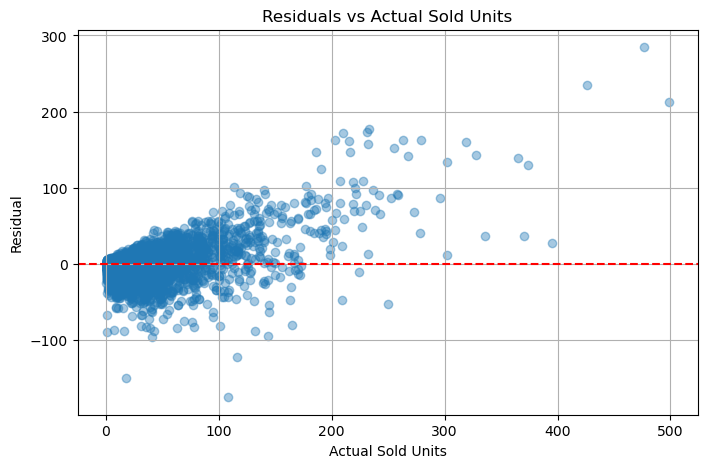

In [140]:
# Plot residuals 
plt.figure(figsize=(8, 5))
plt.scatter(sd_lagged_model['sold_units'], sd_lagged_model['residual'], alpha=0.4)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Actual Sold Units')
plt.ylabel('Residual')
plt.title('Residuals vs Actual Sold Units')
plt.grid(True)
plt.show()

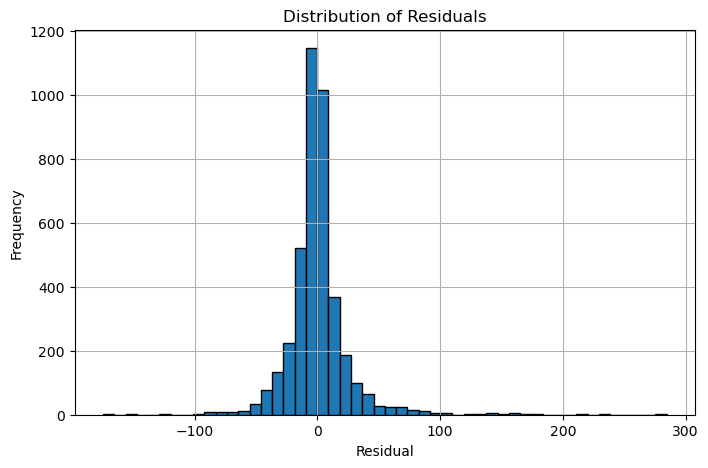

In [141]:
# Create a histrogram of residuals
sd_lagged_model['residual'].hist(bins=50, edgecolor='black', figsize=(8, 5))
plt.title('Distribution of Residuals')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.show()

In [142]:
# Group residuals by petrol station
residual_by_station = sd_lagged_model.groupby('petrol_station')['residual'].mean().sort_values()

# Top 10 stations where model under- or over-predicts
print(residual_by_station.head(10))
print(residual_by_station.tail(10))

petrol_station
PUENTE SAN FERNANDO II   -13.985714
LA FUENTE                -11.778955
CIEMPOZUELOS             -11.065309
GALAPAGAR                 -9.638433
SAN FERNANDO M50          -9.621940
ALBERTO AGUILERA          -7.951032
TRES CANTOS               -7.941563
FUENCARRAL                -7.477376
ALOVERA                   -7.326754
OFELIA NIETO              -7.160327
Name: residual, dtype: float64
petrol_station
MÓSTOLES DCHO.        6.375040
CTRA. FUENCARRAL      6.538225
PINTO AUTOVÍA         7.019380
POL. GALAPAGAR        8.105595
COLMENAR DE OREJA     9.569789
AZUQUECA             12.069887
VENTURADA            12.814091
CONCHA ESPINA        13.622970
HIPÓDROMO            16.404259
VALDEMORILLO         24.417671
Name: residual, dtype: float64


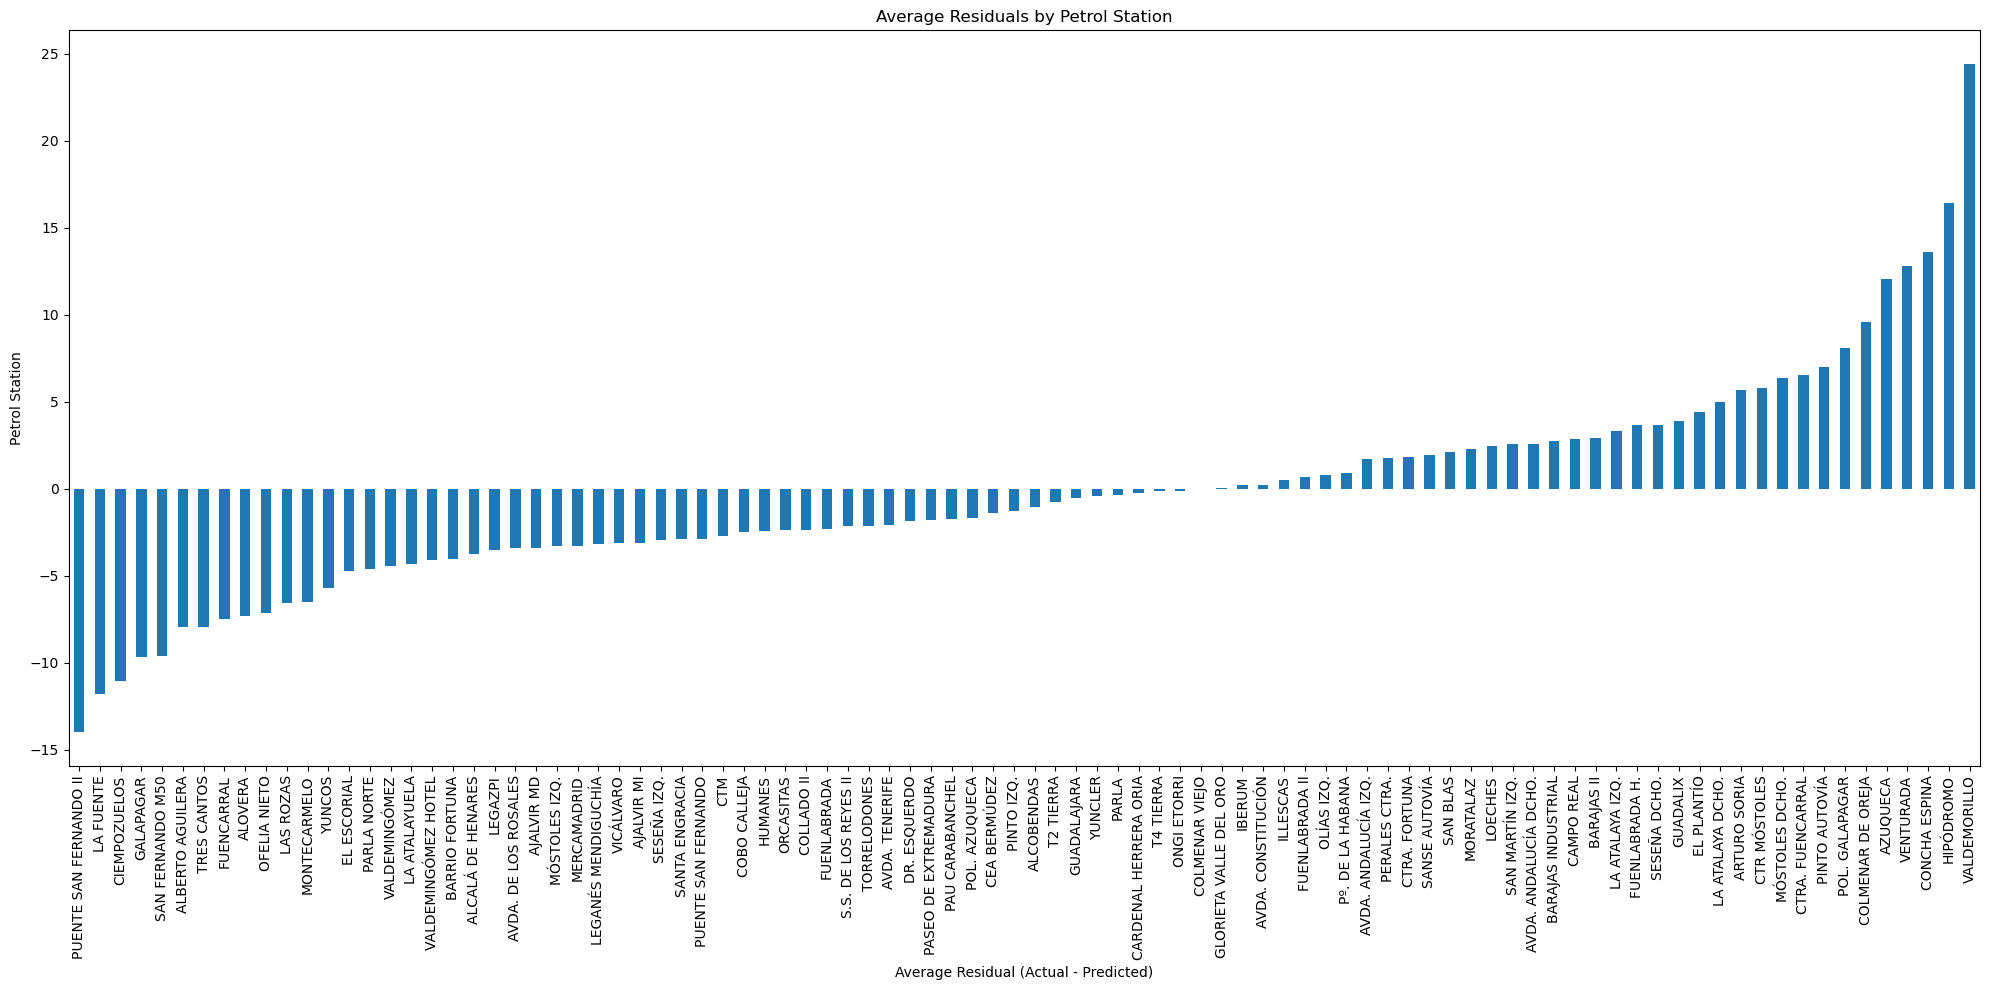

In [143]:
residual_by_station.plot(kind='bar', figsize=(20, 10))
plt.title('Average Residuals by Petrol Station')
plt.xlabel('Average Residual (Actual - Predicted)')
plt.ylabel('Petrol Station')
plt.tight_layout()

plt.savefig('residuals by station', dpi=300, bbox_inches='tight')

plt.show()

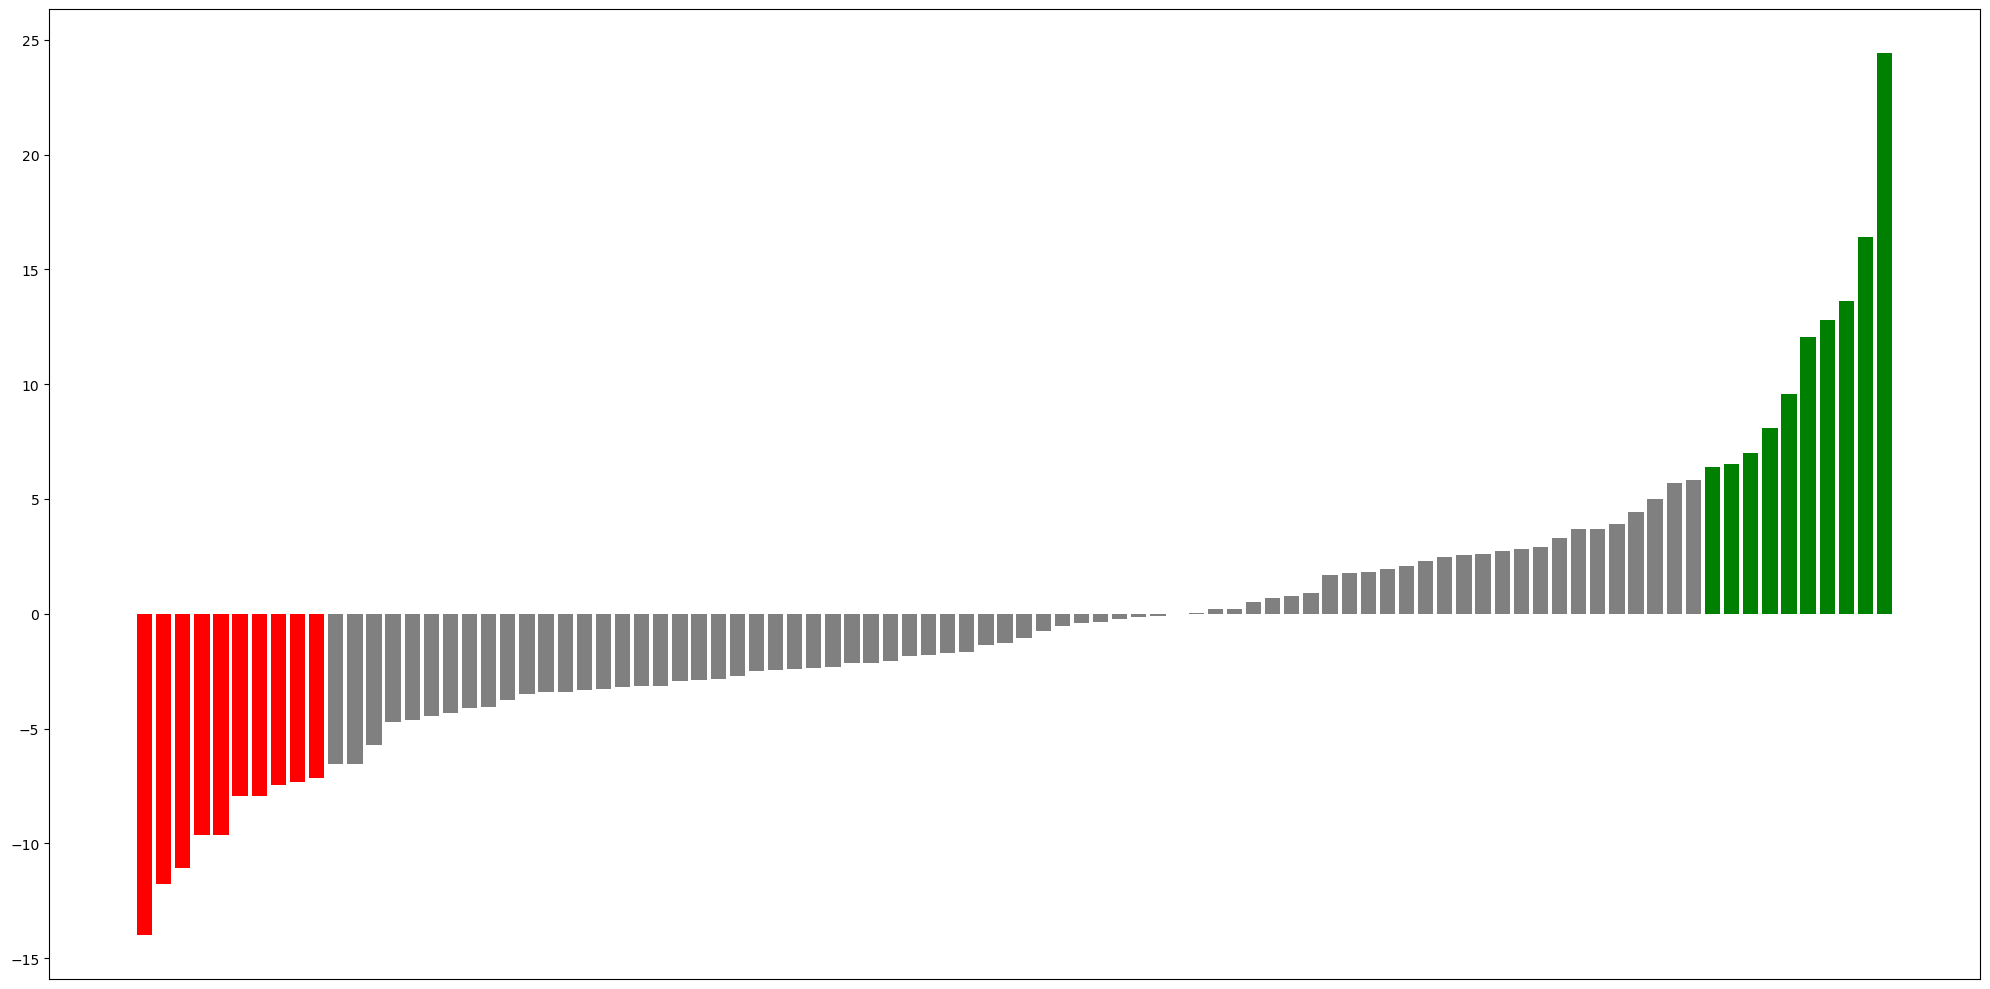

In [144]:
# Sort residuals
residual_by_station_sorted = residual_by_station.sort_values()

# Create a color list
colors = ['grey'] * len(residual_by_station_sorted)

# Get indices of top/bottom 10
top10_idx = residual_by_station_sorted.nlargest(10).index
bottom10_idx = residual_by_station_sorted.nsmallest(10).index

# Assign colors
for i, station in enumerate(residual_by_station_sorted.index):
    if station in top10_idx:
        colors[i] = 'green'
    elif station in bottom10_idx:
        colors[i] = 'red'

# Plot
plt.figure(figsize=(20, 10))
plt.bar(range(len(residual_by_station_sorted)), residual_by_station_sorted.values, color=colors)

# Remove x-axis tick labels (station names)
plt.xticks([], [])
plt.tight_layout()

# Save plot
plt.savefig('residuals_by_station.png', dpi=300, bbox_inches='tight')
plt.show()

In [145]:
bottom10_idx

Index(['PUENTE SAN FERNANDO II', 'LA FUENTE', 'CIEMPOZUELOS', 'GALAPAGAR',
       'SAN FERNANDO M50', 'ALBERTO AGUILERA', 'TRES CANTOS', 'FUENCARRAL',
       'ALOVERA', 'OFELIA NIETO'],
      dtype='object', name='petrol_station')

In [146]:
plt.savefig('residuals by station', dpi=300, bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

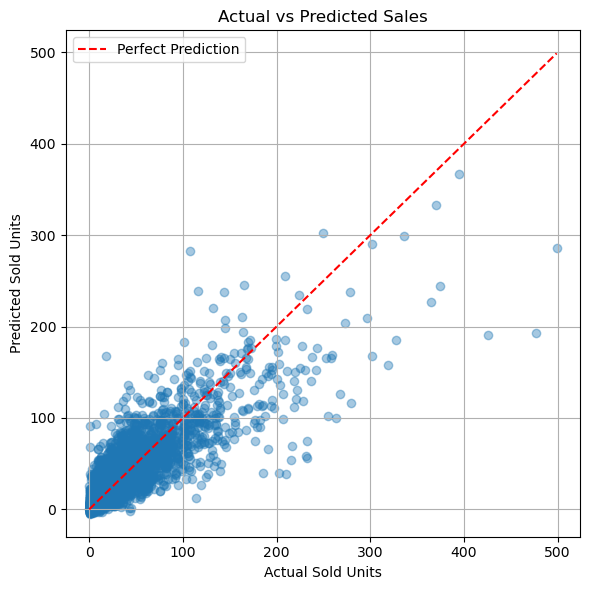

In [147]:
plt.figure(figsize=(6, 6))
plt.scatter(sd_lagged_model['sold_units'], sd_lagged_model['predicted_sold_units'], alpha=0.4)
plt.plot([0, sd_lagged_model['sold_units'].max()],
         [0, sd_lagged_model['sold_units'].max()],
         color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Sold Units')
plt.ylabel('Predicted Sold Units')
plt.title('Actual vs Predicted Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

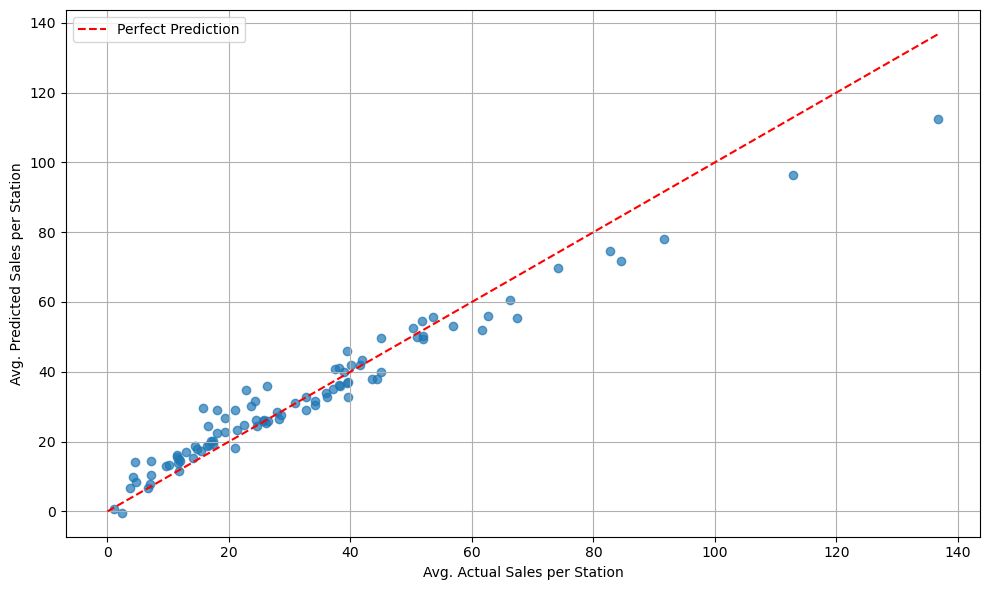

In [148]:
# Group actual and predicted sales by petrol station
station_summary = sd_lagged_model.groupby('petrol_station')[['sold_units', 'predicted_sold_units']].mean().reset_index()

# Sort the values
station_summary = station_summary.sort_values('sold_units')

# Plot the model
plt.figure(figsize=(10, 6))
plt.scatter(station_summary['sold_units'], station_summary['predicted_sold_units'], alpha=0.7)

# Perfect Prediction line
max_val = max(station_summary['sold_units'].max(), station_summary['predicted_sold_units'].max())
plt.plot([0, max_val], [0, max_val], color='red', linestyle='--', label='Perfect Prediction')

plt.xlabel('Avg. Actual Sales per Station')
plt.ylabel('Avg. Predicted Sales per Station')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Save image
plt.savefig('predicted_vs_actual.png', dpi=300, bbox_inches='tight')

plt.show()

In [149]:
plt.savefig('predicted_vs_actual.png', dpi=300, bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

#### n) Explore potential lost sales from out of stocks
- Filtered out weeks over average tmax over 28 degrees, as these hot weeks likely to be vunerable to out of stocks
- Identify out of stocks as stations where actuals are >30% lower than predicted on days over 28
- Total lost sales (if assumed standard ice at 1.49) -€17,612.44
- The 3 top stations in terms of out of stocks are all in the North West of Madrid

In [151]:
sd_lagged_model.head()

direction town_city petrol_station  week_number  sold_units       tmax  \
1225        NE   AJALVIR     AJALVIR MD          3.0         8.0  10.066667   
1226        NE   AJALVIR     AJALVIR MD          4.0         6.0  13.200000   
1227        NE   AJALVIR     AJALVIR MD          5.0         7.0  14.266667   
1228        NE   AJALVIR     AJALVIR MD          6.0         5.0  15.666667   
1229        NE   AJALVIR     AJALVIR MD          7.0         6.0  15.266667   

      hot_saturday  hot_friday  hot_sunday  festivals  public_holiday  \
1225             0           0           0        0.0             0.0   
1226             0           0           0        0.0             0.0   
1227             0           0           0        2.0             0.0   
1228             0           0           0        0.0             0.0   
1229             0           0           0        0.0             0.0   

      distance_madrid_km  season  month  sold_units_lag1  sold_units_lag2  \
1225                36.9  winter    1.0             13.0              6.0   
1226                36.9  winter    1.0              8.0             13.0   
1227                36.9  winter    2.0              6.0              8.0   
1228                36.9  winter    2.0              7.0              6.0   
1229                36.9  winter    2.0              5.0              7.0   

      predicted_sold_units  residual  
1225              7.802084  0.197916  
1226              7.092125 -1.092125  
1227              8.394644 -1.394644  
1228              6.173199 -1.173199  
1229              5.163645  0.836355

In [152]:
# Identify weeks with tmax over 28
sd_lagged_model_over28 = sd_lagged_model[(
    sd_lagged_model['tmax'] > 28)].copy()

sd_lagged_model_over28

direction town_city petrol_station  week_number  sold_units       tmax  \
1242        NE   AJALVIR     AJALVIR MD         20.0        21.0  30.250000   
1243        NE   AJALVIR     AJALVIR MD         21.0        23.0  31.700000   
1244        NE   AJALVIR     AJALVIR MD         22.0        30.0  28.660000   
1245        NE   AJALVIR     AJALVIR MD         23.0        58.0  32.642857   
1246        NE   AJALVIR     AJALVIR MD         24.0        76.0  36.857143   
...        ...       ...            ...          ...         ...        ...   
4209        SW    YUNCOS         YUNCOS         31.0         9.0  38.000000   
4210        SW    YUNCOS         YUNCOS         33.0        12.0  32.400000   
4211        SW    YUNCOS         YUNCOS         34.0         8.0  35.433333   
4212        SW    YUNCOS         YUNCOS         35.0         4.0  31.025000   
4213        SW    YUNCOS         YUNCOS         36.0         2.0  31.450000   

      hot_saturday  hot_friday  hot_sunday  festivals  public_holiday  \
1242             0           0           0        0.0             0.0   
1243             0           0           0        0.0             0.0   
1244             0           0           0        1.0             0.0   
1245             1           1           0        2.0             0.0   
1246             1           1           0        0.0             0.0   
...            ...         ...         ...        ...             ...   
4209             0           0           0        0.0             0.0   
4210             0           0           1        0.0             0.0   
4211             0           0           0        0.0             0.0   
4212             0           0           0        0.0             0.0   
4213             0           0           0        1.0             0.0   

      distance_madrid_km  season  month  sold_units_lag1  sold_units_lag2  \
1242                36.9  spring    5.0             27.0             12.0   
1243                36.9  spring    5.0             21.0             27.0   
1244                36.9  spring    5.0             23.0             21.0   
1245                36.9  summer    6.0             30.0             23.0   
1246                36.9  summer    6.0             58.0             30.0   
...                  ...     ...    ...              ...              ...   
4209                43.5  summer    8.0              9.0             15.0   
4210                43.5  summer    8.0              9.0              9.0   
4211                43.5  summer    8.0             12.0              9.0   
4212                43.5  summer    8.0              8.0             12.0   
4213                43.5  autumn    9.0              4.0              8.0   

      predicted_sold_units  residual  
1242             21.595248 -0.595248  
1243             21.117758  1.882242  
1244             21.839254  8.160746  
1245             56.630456  1.369544  
1246             70.758762  5.241238  
...                    ...       ...  
4209             13.232874 -4.232874  
4210             10.790036  1.209964  
4211             13.197219 -5.197219  
4212             10.345188 -6.345188  
4213              9.159458 -7.159458  

[1299 rows x 18 columns]

In [153]:
# Create column with residuals as % of forecasted
sd_lagged_model_over28['residual_%'] = sd_lagged_model_over28['residual'] / sd_lagged_model_over28['predicted_sold_units']

sd_lagged_model_over28.head()

direction town_city petrol_station  week_number  sold_units       tmax  \
1242        NE   AJALVIR     AJALVIR MD         20.0        21.0  30.250000   
1243        NE   AJALVIR     AJALVIR MD         21.0        23.0  31.700000   
1244        NE   AJALVIR     AJALVIR MD         22.0        30.0  28.660000   
1245        NE   AJALVIR     AJALVIR MD         23.0        58.0  32.642857   
1246        NE   AJALVIR     AJALVIR MD         24.0        76.0  36.857143   

      hot_saturday  hot_friday  hot_sunday  festivals  public_holiday  \
1242             0           0           0        0.0             0.0   
1243             0           0           0        0.0             0.0   
1244             0           0           0        1.0             0.0   
1245             1           1           0        2.0             0.0   
1246             1           1           0        0.0             0.0   

      distance_madrid_km  season  month  sold_units_lag1  sold_units_lag2  \
1242                36.9  spring    5.0             27.0             12.0   
1243                36.9  spring    5.0             21.0             27.0   
1244                36.9  spring    5.0             23.0             21.0   
1245                36.9  summer    6.0             30.0             23.0   
1246                36.9  summer    6.0             58.0             30.0   

      predicted_sold_units  residual  residual_%  
1242             21.595248 -0.595248   -0.027564  
1243             21.117758  1.882242    0.089131  
1244             21.839254  8.160746    0.373673  
1245             56.630456  1.369544    0.024184  
1246             70.758762  5.241238    0.074072

In [154]:
# Identify out of stocks as stations where actuals are >30% lower than predicted on days over 28
out_of_stocks = sd_lagged_model_over28[sd_lagged_model_over28['residual_%'] < -0.3]

out_of_stocks.head()

direction town_city petrol_station  week_number  sold_units   tmax  \
1249        NE   AJALVIR     AJALVIR MD         27.0        24.0  35.30   
1255        NE   AJALVIR     AJALVIR MD         33.0        33.0  31.95   
1256        NE   AJALVIR     AJALVIR MD         34.0        11.0  33.90   
1273        NE   AJALVIR     AJALVIR MI         33.0         4.0  31.40   
1274        NE   AJALVIR     AJALVIR MI         34.0         3.0  35.35   

      hot_saturday  hot_friday  hot_sunday  festivals  public_holiday  \
1249             1           0           1        2.0             0.0   
1255             0           0           1        0.0             1.0   
1256             0           0           0        0.0             0.0   
1273             0           0           0        0.0             0.0   
1274             0           0           0        0.0             0.0   

      distance_madrid_km  season  month  sold_units_lag1  sold_units_lag2  \
1249                36.9  summer    7.0             38.0             15.0   
1255                36.9  summer    8.0             55.0             86.0   
1256                36.9  summer    8.0             33.0             55.0   
1273                36.9  summer    8.0              3.0              6.0   
1274                36.9  summer    8.0              4.0              3.0   

      predicted_sold_units   residual  residual_%  
1249             56.194287 -32.194287   -0.572910  
1255             51.761208 -18.761208   -0.362457  
1256             32.298714 -21.298714   -0.659429  
1273              8.363773  -4.363773   -0.521747  
1274              9.511702  -6.511702   -0.684599

In [155]:
out_of_stocks.info()

<class 'pandas.core.frame.DataFrame'>
Index: 407 entries, 1249 to 4213
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   direction             407 non-null    object 
 1   town_city             407 non-null    object 
 2   petrol_station        407 non-null    object 
 3   week_number           407 non-null    float64
 4   sold_units            407 non-null    float64
 5   tmax                  407 non-null    float64
 6   hot_saturday          407 non-null    int64  
 7   hot_friday            407 non-null    int64  
 8   hot_sunday            407 non-null    int64  
 9   festivals             407 non-null    float64
 10  public_holiday        407 non-null    float64
 11  distance_madrid_km    407 non-null    float64
 12  season                407 non-null    object 
 13  month                 407 non-null    float64
 14  sold_units_lag1       407 non-null    float64
 15  sold_units_lag2       40

In [156]:
# Group the out of stocks by stations
out_of_stocks_by_station = out_of_stocks.groupby(['direction', 'petrol_station'])['residual'].sum().reset_index()

In [157]:
out_of_stocks_by_station.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   direction       89 non-null     object 
 1   petrol_station  89 non-null     object 
 2   residual        89 non-null     float64
dtypes: float64(1), object(2)
memory usage: 2.2+ KB


In [158]:
out_of_stocks_by_station

direction         petrol_station    residual
0          -       ALBERTO AGUILERA -193.994500
1          -           ARTURO SORIA -124.722197
2          -  AVDA. ANDALUCÍA DCHO.  -93.674323
3          -   AVDA. ANDALUCÍA IZQ.  -27.950198
4          -           CEA BERMÚDEZ -162.725629
..       ...                    ...         ...
84        SW   PASEO DE EXTREMADURA -152.586807
85        SW        PAU CARABANCHEL -135.180585
86        SW        SAN MARTÍN IZQ. -121.441238
87        SW                YUNCLER  -89.491439
88        SW                 YUNCOS -173.398573

[89 rows x 3 columns]

In [159]:
# Export dataframe to excel to help build visualisations
out_of_stocks_by_station.to_excel('out_of_stocks..xlsx', index=False)

In [160]:
# Group the out of stocks by direction
out_of_stocks_by_direction = out_of_stocks.groupby(['direction'])['residual'].sum().reset_index()

<BarContainer object of 9 artists>

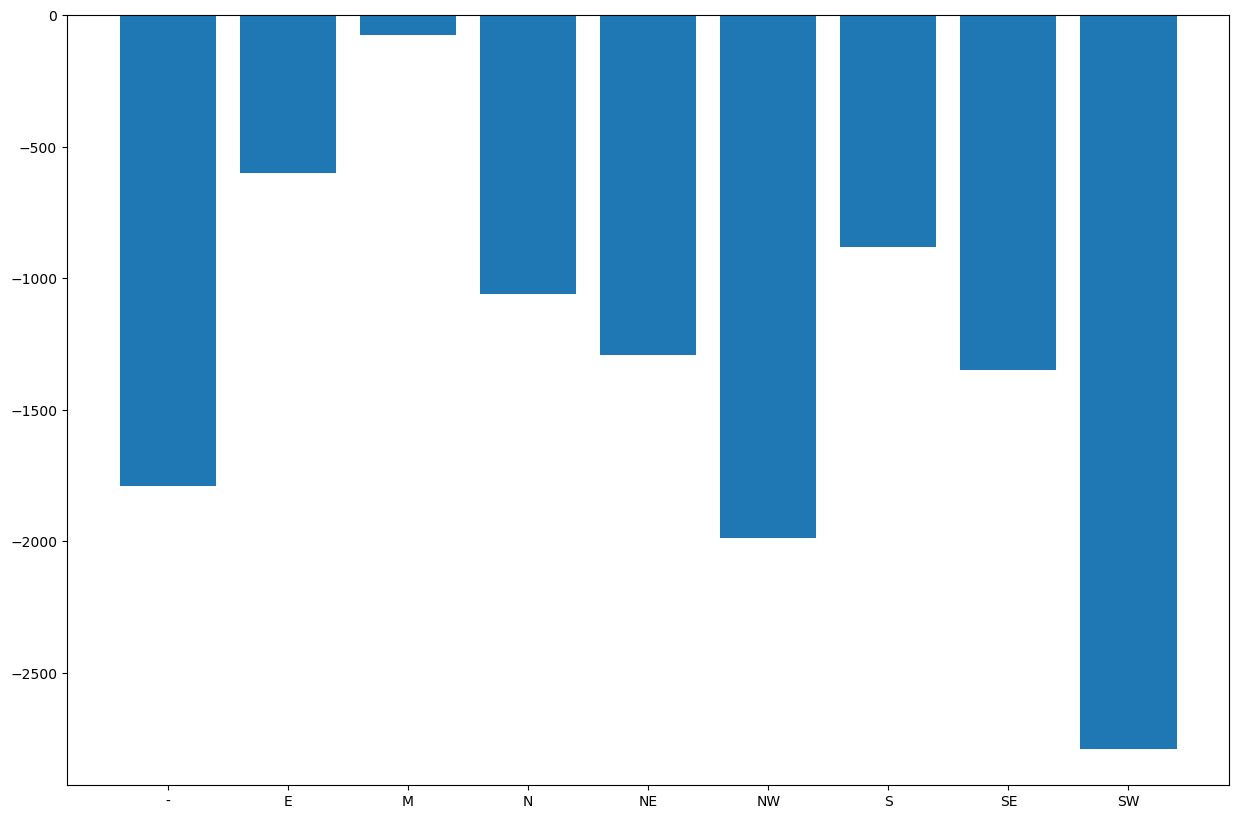

In [161]:
# Plot out of stocks by direction
plt.figure(figsize=(15,10))
plt.bar(out_of_stocks_by_direction['direction'], out_of_stocks_by_direction['residual'])

In [162]:
# Group by week to identify lost sales vs. predicted
sd_lagged_model_over28_by_week = sd_lagged_model_over28.groupby(
    'week_number')[['predicted_sold_units', 'sold_units', 'residual']].sum().reset_index()

In [163]:
sd_lagged_model_over28_by_week

week_number  predicted_sold_units  sold_units     residual
0          19.0            631.218067       632.0     0.781933
1          20.0           3052.829706      5182.0  2129.170294
2          21.0           1899.964999      2166.0   266.035001
3          22.0           1008.963759       981.0   -27.963759
4          23.0           6048.477209      5812.0  -236.477209
5          24.0           6773.890403      7733.0   959.109597
6          26.0           3855.005702      4440.0   584.994298
7          27.0           5907.000094      4730.0 -1177.000094
8          28.0           6408.284163      7624.0  1215.715837
9          29.0           8455.217996      8558.0   102.782004
10         30.0           8769.432614      8210.0  -559.432614
11         31.0           8481.088617      7480.0 -1001.088617
12         32.0           6532.676508      4862.0 -1670.676508
13         33.0           4556.836891      3242.0 -1314.836891
14         34.0           3172.253522      3454.0   281.746478
15         35.0           2957.327935      4122.0  1164.672065
16         36.0           3669.966961      4154.0   484.033039
17         37.0            157.053625       122.0   -35.053625
18         38.0             13.150683         9.0    -4.150683
19         40.0             13.073015         5.0    -8.073015

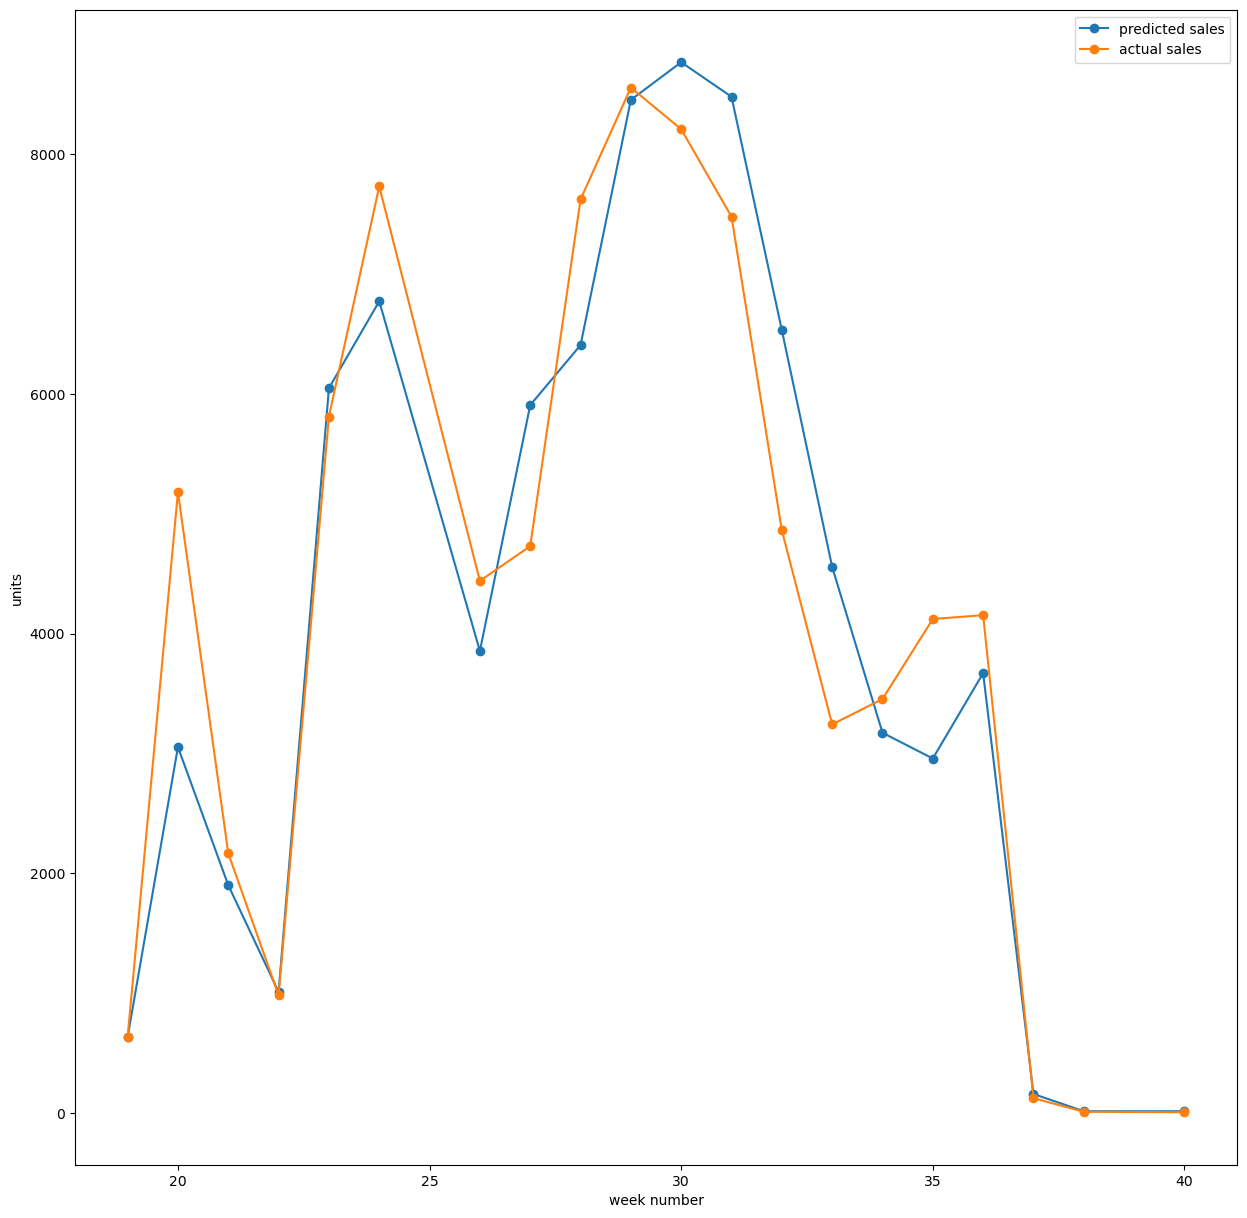

In [164]:
plt.figure(figsize = (15,15))

plt.plot(sd_lagged_model_over28_by_week['week_number'], 
         sd_lagged_model_over28_by_week['predicted_sold_units'], label='predicted sales', marker='o')
plt.plot(sd_lagged_model_over28_by_week['week_number'], 
         sd_lagged_model_over28_by_week['sold_units'], label='actual sales', marker='o')

plt.xlabel('week number')
plt.ylabel('units')
plt.legend()

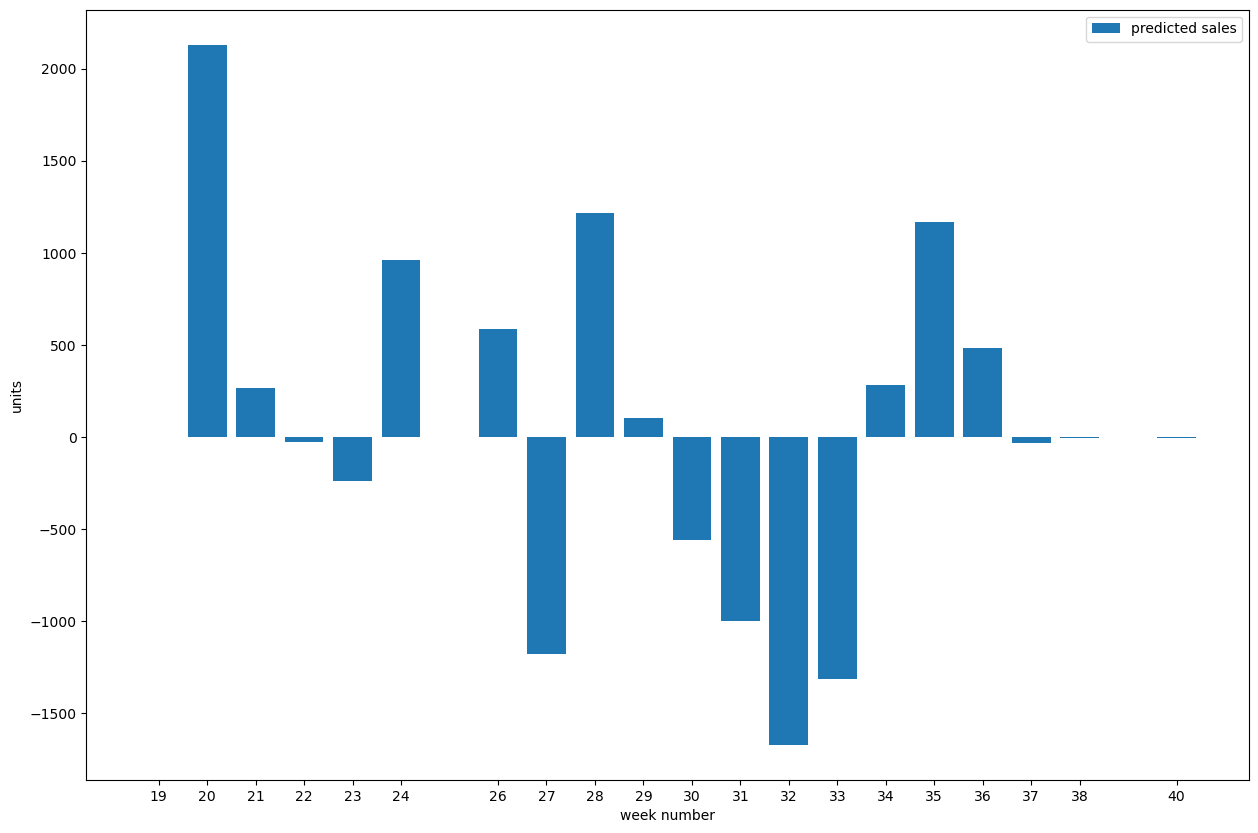

In [165]:
plt.figure(figsize = (15,10))

plt.bar(sd_lagged_model_over28_by_week['week_number'], 
         sd_lagged_model_over28_by_week['residual'], label='predicted sales')

plt.xlabel('week number')
plt.xticks(sd_lagged_model_over28_by_week['week_number'])
plt.ylabel('units')
plt.legend()

In [166]:
# Group by week to identify lost sales vs. predicted (including temperature
sd_lagged_model_over28_by_week_temp = sd_lagged_model_over28.groupby(
    'week_number')[['tmax','predicted_sold_units', 'sold_units', 'residual']].agg({
    'tmax': 'mean',
    'predicted_sold_units': 'sum',
    'sold_units': 'sum', 
    'residual': 'sum'}).reset_index()

sd_lagged_model_over28_by_week_temp

week_number       tmax  predicted_sold_units  sold_units     residual
0          19.0  28.168431            631.218067       632.0     0.781933
1          20.0  30.446913           3052.829706      5182.0  2129.170294
2          21.0  29.539327           1899.964999      2166.0   266.035001
3          22.0  28.555101           1008.963759       981.0   -27.963759
4          23.0  33.166773           6048.477209      5812.0  -236.477209
5          24.0  36.826180           6773.890403      7733.0   959.109597
6          26.0  32.520348           3855.005702      4440.0   584.994298
7          27.0  35.045301           5907.000094      4730.0 -1177.000094
8          28.0  39.144962           6408.284163      7624.0  1215.715837
9          29.0  37.555581           8455.217996      8558.0   102.782004
10         30.0  36.878175           8769.432614      8210.0  -559.432614
11         31.0  37.334475           8481.088617      7480.0 -1001.088617
12         32.0  34.598439           6532.676508      4862.0 -1670.676508
13         33.0  31.949909           4556.836891      3242.0 -1314.836891
14         34.0  34.204768           3172.253522      3454.0   281.746478
15         35.0  31.133081           2957.327935      4122.0  1164.672065
16         36.0  30.905852           3669.966961      4154.0   484.033039
17         37.0  28.491667            157.053625       122.0   -35.053625
18         38.0  28.625000             13.150683         9.0    -4.150683
19         40.0  28.900000             13.073015         5.0    -8.073015

In [167]:
# Group by week to identify lost sales vs. predicted (including temperature
out_of_stocks_by_week = out_of_stocks.groupby(
    'week_number')[['tmax','predicted_sold_units', 'sold_units', 'residual', 'residual_%']].agg({
    'tmax': 'mean',
    'predicted_sold_units': 'sum',
    'sold_units': 'sum', 
    'residual': 'sum',
    'residual_%': 'mean'}).reset_index()

out_of_stocks_by_week

week_number       tmax  predicted_sold_units  sold_units     residual  \
0          19.0  28.270833            242.073750       106.0  -136.073750   
1          20.0  30.288370            270.928547       147.0  -123.928547   
2          21.0  30.077167            286.423961       110.0  -176.423961   
3          22.0  28.700833            343.058511       187.0  -156.058511   
4          23.0  33.493014           1940.453104       948.0  -992.453104   
5          24.0  36.501138            929.194636       447.0  -482.194636   
6          26.0  32.637619            580.441912       325.0  -255.441912   
7          27.0  35.126687           2539.471023      1148.0 -1391.471023   
8          28.0  39.192417           1044.670062       506.0  -538.670062   
9          29.0  37.655064           1977.657461      1107.0  -870.657461   
10         30.0  37.011026           2090.666652      1084.0 -1006.666652   
11         31.0  37.415494           2514.887928      1258.0 -1256.887928   
12         32.0  34.554363           3345.882761      1638.0 -1707.882761   
13         33.0  32.202082           2732.934401      1262.0 -1470.934401   
14         34.0  34.319940            961.514883       421.0  -540.514883   
15         35.0  30.970408            403.471226       208.0  -195.471226   
16         36.0  31.025379            770.864226       309.0  -461.864226   
17         37.0  28.637500             78.126379        36.0   -42.126379   
18         38.0  28.300000             12.632004         6.0    -6.632004   
19         40.0  28.900000             13.073015         5.0    -8.073015   

    residual_%  
0    -0.584749  
1    -0.471235  
2    -0.577373  
3    -0.488187  
4    -0.538294  
5    -0.530276  
6    -0.476457  
7    -0.575313  
8    -0.541747  
9    -0.452624  
10   -0.510147  
11   -0.543725  
12   -0.510448  
13   -0.529635  
14   -0.560648  
15   -0.520147  
16   -0.601467  
17   -0.585683  
18   -0.525016  
19   -0.617533

In [168]:
# Add a totals row to the dataframe
# Calculate totals and averages
totals_row = pd.DataFrame({
    'week_number': ['TOTAL'],
    'tmax': [out_of_stocks_by_week['tmax'].mean()],
    'predicted_sold_units': [out_of_stocks_by_week['predicted_sold_units'].sum()],
    'sold_units': [out_of_stocks_by_week['sold_units'].sum()],
    'residual': [out_of_stocks_by_week['residual'].sum()],
    'residual_%': [out_of_stocks_by_week['residual'].sum()/out_of_stocks_by_week['predicted_sold_units'].sum()]
})

# Append the totals row
out_of_stocks_with_total = pd.concat([out_of_stocks_by_week, totals_row], ignore_index=True)

out_of_stocks_with_total

week_number       tmax  predicted_sold_units  sold_units      residual  \
0         19.0  28.270833            242.073750       106.0   -136.073750   
1         20.0  30.288370            270.928547       147.0   -123.928547   
2         21.0  30.077167            286.423961       110.0   -176.423961   
3         22.0  28.700833            343.058511       187.0   -156.058511   
4         23.0  33.493014           1940.453104       948.0   -992.453104   
5         24.0  36.501138            929.194636       447.0   -482.194636   
6         26.0  32.637619            580.441912       325.0   -255.441912   
7         27.0  35.126687           2539.471023      1148.0  -1391.471023   
8         28.0  39.192417           1044.670062       506.0   -538.670062   
9         29.0  37.655064           1977.657461      1107.0   -870.657461   
10        30.0  37.011026           2090.666652      1084.0  -1006.666652   
11        31.0  37.415494           2514.887928      1258.0  -1256.887928   
12        32.0  34.554363           3345.882761      1638.0  -1707.882761   
13        33.0  32.202082           2732.934401      1262.0  -1470.934401   
14        34.0  34.319940            961.514883       421.0   -540.514883   
15        35.0  30.970408            403.471226       208.0   -195.471226   
16        36.0  31.025379            770.864226       309.0   -461.864226   
17        37.0  28.637500             78.126379        36.0    -42.126379   
18        38.0  28.300000             12.632004         6.0     -6.632004   
19        40.0  28.900000             13.073015         5.0     -8.073015   
20       TOTAL  32.763967          23078.426442     11258.0 -11820.426442   

    residual_%  
0    -0.584749  
1    -0.471235  
2    -0.577373  
3    -0.488187  
4    -0.538294  
5    -0.530276  
6    -0.476457  
7    -0.575313  
8    -0.541747  
9    -0.452624  
10   -0.510147  
11   -0.543725  
12   -0.510448  
13   -0.529635  
14   -0.560648  
15   -0.520147  
16   -0.601467  
17   -0.585683  
18   -0.525016  
19   -0.617533  
20   -0.512185

Text(0.5, 0, 'Week Number')

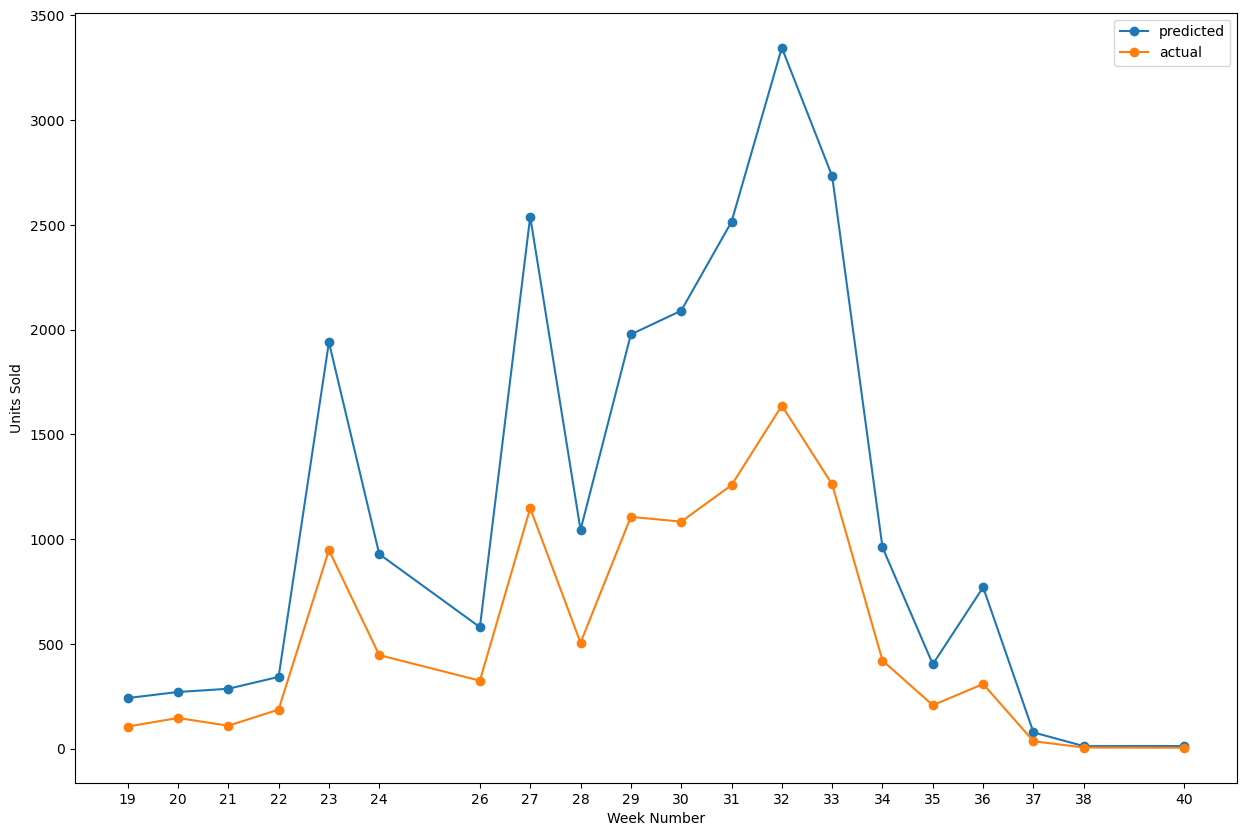

In [169]:
# Plot total sales vs. predicted in those stations where likely out of stock
plt.figure(figsize = (15,10))
plt.plot(out_of_stocks_by_week['week_number'], out_of_stocks_by_week['predicted_sold_units'], label='predicted', marker='o')
plt.plot(out_of_stocks_by_week['week_number'], out_of_stocks_by_week['sold_units'], label='actual', marker='o')

plt.xticks(out_of_stocks_by_week['week_number'])
plt.legend()
plt.ylabel('Units Sold')
plt.xlabel('Week Number')
           

In [170]:
# Add in monetary value of Predicted sales using 1.49 as price per unit
out_of_stocks_with_total['predicted_revenue'] = (out_of_stocks_with_total['predicted_sold_units']*1.49).round(2)

out_of_stocks_with_total

week_number       tmax  predicted_sold_units  sold_units      residual  \
0         19.0  28.270833            242.073750       106.0   -136.073750   
1         20.0  30.288370            270.928547       147.0   -123.928547   
2         21.0  30.077167            286.423961       110.0   -176.423961   
3         22.0  28.700833            343.058511       187.0   -156.058511   
4         23.0  33.493014           1940.453104       948.0   -992.453104   
5         24.0  36.501138            929.194636       447.0   -482.194636   
6         26.0  32.637619            580.441912       325.0   -255.441912   
7         27.0  35.126687           2539.471023      1148.0  -1391.471023   
8         28.0  39.192417           1044.670062       506.0   -538.670062   
9         29.0  37.655064           1977.657461      1107.0   -870.657461   
10        30.0  37.011026           2090.666652      1084.0  -1006.666652   
11        31.0  37.415494           2514.887928      1258.0  -1256.887928   
12        32.0  34.554363           3345.882761      1638.0  -1707.882761   
13        33.0  32.202082           2732.934401      1262.0  -1470.934401   
14        34.0  34.319940            961.514883       421.0   -540.514883   
15        35.0  30.970408            403.471226       208.0   -195.471226   
16        36.0  31.025379            770.864226       309.0   -461.864226   
17        37.0  28.637500             78.126379        36.0    -42.126379   
18        38.0  28.300000             12.632004         6.0     -6.632004   
19        40.0  28.900000             13.073015         5.0     -8.073015   
20       TOTAL  32.763967          23078.426442     11258.0 -11820.426442   

    residual_%  predicted_revenue  
0    -0.584749             360.69  
1    -0.471235             403.68  
2    -0.577373             426.77  
3    -0.488187             511.16  
4    -0.538294            2891.28  
5    -0.530276            1384.50  
6    -0.476457             864.86  
7    -0.575313            3783.81  
8    -0.541747            1556.56  
9    -0.452624            2946.71  
10   -0.510147            3115.09  
11   -0.543725            3747.18  
12   -0.510448            4985.37  
13   -0.529635            4072.07  
14   -0.560648            1432.66  
15   -0.520147             601.17  
16   -0.601467            1148.59  
17   -0.585683             116.41  
18   -0.525016              18.82  
19   -0.617533              19.48  
20   -0.512185           34386.86

In [171]:
# Add in monetary value of Actual sales using 1.49 as price per unit
out_of_stocks_with_total['actual_revenue'] = (out_of_stocks_with_total['sold_units']*1.49).round(2)

out_of_stocks_with_total

week_number       tmax  predicted_sold_units  sold_units      residual  \
0         19.0  28.270833            242.073750       106.0   -136.073750   
1         20.0  30.288370            270.928547       147.0   -123.928547   
2         21.0  30.077167            286.423961       110.0   -176.423961   
3         22.0  28.700833            343.058511       187.0   -156.058511   
4         23.0  33.493014           1940.453104       948.0   -992.453104   
5         24.0  36.501138            929.194636       447.0   -482.194636   
6         26.0  32.637619            580.441912       325.0   -255.441912   
7         27.0  35.126687           2539.471023      1148.0  -1391.471023   
8         28.0  39.192417           1044.670062       506.0   -538.670062   
9         29.0  37.655064           1977.657461      1107.0   -870.657461   
10        30.0  37.011026           2090.666652      1084.0  -1006.666652   
11        31.0  37.415494           2514.887928      1258.0  -1256.887928   
12        32.0  34.554363           3345.882761      1638.0  -1707.882761   
13        33.0  32.202082           2732.934401      1262.0  -1470.934401   
14        34.0  34.319940            961.514883       421.0   -540.514883   
15        35.0  30.970408            403.471226       208.0   -195.471226   
16        36.0  31.025379            770.864226       309.0   -461.864226   
17        37.0  28.637500             78.126379        36.0    -42.126379   
18        38.0  28.300000             12.632004         6.0     -6.632004   
19        40.0  28.900000             13.073015         5.0     -8.073015   
20       TOTAL  32.763967          23078.426442     11258.0 -11820.426442   

    residual_%  predicted_revenue  actual_revenue  
0    -0.584749             360.69          157.94  
1    -0.471235             403.68          219.03  
2    -0.577373             426.77          163.90  
3    -0.488187             511.16          278.63  
4    -0.538294            2891.28         1412.52  
5    -0.530276            1384.50          666.03  
6    -0.476457             864.86          484.25  
7    -0.575313            3783.81         1710.52  
8    -0.541747            1556.56          753.94  
9    -0.452624            2946.71         1649.43  
10   -0.510147            3115.09         1615.16  
11   -0.543725            3747.18         1874.42  
12   -0.510448            4985.37         2440.62  
13   -0.529635            4072.07         1880.38  
14   -0.560648            1432.66          627.29  
15   -0.520147             601.17          309.92  
16   -0.601467            1148.59          460.41  
17   -0.585683             116.41           53.64  
18   -0.525016              18.82            8.94  
19   -0.617533              19.48            7.45  
20   -0.512185           34386.86        16774.42

In [172]:
# Add in monetary value of Lost sales using 1.49 as price per unit
out_of_stocks_with_total['Lost_revenue'] = (out_of_stocks_with_total['residual']*1.49).round(2)

out_of_stocks_with_total

week_number       tmax  predicted_sold_units  sold_units      residual  \
0         19.0  28.270833            242.073750       106.0   -136.073750   
1         20.0  30.288370            270.928547       147.0   -123.928547   
2         21.0  30.077167            286.423961       110.0   -176.423961   
3         22.0  28.700833            343.058511       187.0   -156.058511   
4         23.0  33.493014           1940.453104       948.0   -992.453104   
5         24.0  36.501138            929.194636       447.0   -482.194636   
6         26.0  32.637619            580.441912       325.0   -255.441912   
7         27.0  35.126687           2539.471023      1148.0  -1391.471023   
8         28.0  39.192417           1044.670062       506.0   -538.670062   
9         29.0  37.655064           1977.657461      1107.0   -870.657461   
10        30.0  37.011026           2090.666652      1084.0  -1006.666652   
11        31.0  37.415494           2514.887928      1258.0  -1256.887928   
12        32.0  34.554363           3345.882761      1638.0  -1707.882761   
13        33.0  32.202082           2732.934401      1262.0  -1470.934401   
14        34.0  34.319940            961.514883       421.0   -540.514883   
15        35.0  30.970408            403.471226       208.0   -195.471226   
16        36.0  31.025379            770.864226       309.0   -461.864226   
17        37.0  28.637500             78.126379        36.0    -42.126379   
18        38.0  28.300000             12.632004         6.0     -6.632004   
19        40.0  28.900000             13.073015         5.0     -8.073015   
20       TOTAL  32.763967          23078.426442     11258.0 -11820.426442   

    residual_%  predicted_revenue  actual_revenue  Lost_revenue  
0    -0.584749             360.69          157.94       -202.75  
1    -0.471235             403.68          219.03       -184.65  
2    -0.577373             426.77          163.90       -262.87  
3    -0.488187             511.16          278.63       -232.53  
4    -0.538294            2891.28         1412.52      -1478.76  
5    -0.530276            1384.50          666.03       -718.47  
6    -0.476457             864.86          484.25       -380.61  
7    -0.575313            3783.81         1710.52      -2073.29  
8    -0.541747            1556.56          753.94       -802.62  
9    -0.452624            2946.71         1649.43      -1297.28  
10   -0.510147            3115.09         1615.16      -1499.93  
11   -0.543725            3747.18         1874.42      -1872.76  
12   -0.510448            4985.37         2440.62      -2544.75  
13   -0.529635            4072.07         1880.38      -2191.69  
14   -0.560648            1432.66          627.29       -805.37  
15   -0.520147             601.17          309.92       -291.25  
16   -0.601467            1148.59          460.41       -688.18  
17   -0.585683             116.41           53.64        -62.77  
18   -0.525016              18.82            8.94         -9.88  
19   -0.617533              19.48            7.45        -12.03  
20   -0.512185           34386.86        16774.42     -17612.44

In [173]:
# Add in monetary value of Predicted sales using 1.49 as price per unit to dataframe without total row
out_of_stocks_by_week['predicted_revenue'] = (out_of_stocks_with_total['predicted_sold_units']*1.49).round(2)

out_of_stocks_by_week

week_number       tmax  predicted_sold_units  sold_units     residual  \
0          19.0  28.270833            242.073750       106.0  -136.073750   
1          20.0  30.288370            270.928547       147.0  -123.928547   
2          21.0  30.077167            286.423961       110.0  -176.423961   
3          22.0  28.700833            343.058511       187.0  -156.058511   
4          23.0  33.493014           1940.453104       948.0  -992.453104   
5          24.0  36.501138            929.194636       447.0  -482.194636   
6          26.0  32.637619            580.441912       325.0  -255.441912   
7          27.0  35.126687           2539.471023      1148.0 -1391.471023   
8          28.0  39.192417           1044.670062       506.0  -538.670062   
9          29.0  37.655064           1977.657461      1107.0  -870.657461   
10         30.0  37.011026           2090.666652      1084.0 -1006.666652   
11         31.0  37.415494           2514.887928      1258.0 -1256.887928   
12         32.0  34.554363           3345.882761      1638.0 -1707.882761   
13         33.0  32.202082           2732.934401      1262.0 -1470.934401   
14         34.0  34.319940            961.514883       421.0  -540.514883   
15         35.0  30.970408            403.471226       208.0  -195.471226   
16         36.0  31.025379            770.864226       309.0  -461.864226   
17         37.0  28.637500             78.126379        36.0   -42.126379   
18         38.0  28.300000             12.632004         6.0    -6.632004   
19         40.0  28.900000             13.073015         5.0    -8.073015   

    residual_%  predicted_revenue  
0    -0.584749             360.69  
1    -0.471235             403.68  
2    -0.577373             426.77  
3    -0.488187             511.16  
4    -0.538294            2891.28  
5    -0.530276            1384.50  
6    -0.476457             864.86  
7    -0.575313            3783.81  
8    -0.541747            1556.56  
9    -0.452624            2946.71  
10   -0.510147            3115.09  
11   -0.543725            3747.18  
12   -0.510448            4985.37  
13   -0.529635            4072.07  
14   -0.560648            1432.66  
15   -0.520147             601.17  
16   -0.601467            1148.59  
17   -0.585683             116.41  
18   -0.525016              18.82  
19   -0.617533              19.48

In [174]:
# Add in monetary value of Actual sales using 1.49 as price per unit to dataframe without total row
out_of_stocks_by_week['actual_revenue'] = (out_of_stocks_by_week['sold_units']*1.49).round(2)

out_of_stocks_by_week

week_number       tmax  predicted_sold_units  sold_units     residual  \
0          19.0  28.270833            242.073750       106.0  -136.073750   
1          20.0  30.288370            270.928547       147.0  -123.928547   
2          21.0  30.077167            286.423961       110.0  -176.423961   
3          22.0  28.700833            343.058511       187.0  -156.058511   
4          23.0  33.493014           1940.453104       948.0  -992.453104   
5          24.0  36.501138            929.194636       447.0  -482.194636   
6          26.0  32.637619            580.441912       325.0  -255.441912   
7          27.0  35.126687           2539.471023      1148.0 -1391.471023   
8          28.0  39.192417           1044.670062       506.0  -538.670062   
9          29.0  37.655064           1977.657461      1107.0  -870.657461   
10         30.0  37.011026           2090.666652      1084.0 -1006.666652   
11         31.0  37.415494           2514.887928      1258.0 -1256.887928   
12         32.0  34.554363           3345.882761      1638.0 -1707.882761   
13         33.0  32.202082           2732.934401      1262.0 -1470.934401   
14         34.0  34.319940            961.514883       421.0  -540.514883   
15         35.0  30.970408            403.471226       208.0  -195.471226   
16         36.0  31.025379            770.864226       309.0  -461.864226   
17         37.0  28.637500             78.126379        36.0   -42.126379   
18         38.0  28.300000             12.632004         6.0    -6.632004   
19         40.0  28.900000             13.073015         5.0    -8.073015   

    residual_%  predicted_revenue  actual_revenue  
0    -0.584749             360.69          157.94  
1    -0.471235             403.68          219.03  
2    -0.577373             426.77          163.90  
3    -0.488187             511.16          278.63  
4    -0.538294            2891.28         1412.52  
5    -0.530276            1384.50          666.03  
6    -0.476457             864.86          484.25  
7    -0.575313            3783.81         1710.52  
8    -0.541747            1556.56          753.94  
9    -0.452624            2946.71         1649.43  
10   -0.510147            3115.09         1615.16  
11   -0.543725            3747.18         1874.42  
12   -0.510448            4985.37         2440.62  
13   -0.529635            4072.07         1880.38  
14   -0.560648            1432.66          627.29  
15   -0.520147             601.17          309.92  
16   -0.601467            1148.59          460.41  
17   -0.585683             116.41           53.64  
18   -0.525016              18.82            8.94  
19   -0.617533              19.48            7.45

In [175]:
# Add in monetary value of Lost sales using 1.49 as price per unit to dataframe without total row
out_of_stocks_by_week['Lost_revenue'] = (out_of_stocks_by_week['residual']*1.49).round(2)

out_of_stocks_by_week

week_number       tmax  predicted_sold_units  sold_units     residual  \
0          19.0  28.270833            242.073750       106.0  -136.073750   
1          20.0  30.288370            270.928547       147.0  -123.928547   
2          21.0  30.077167            286.423961       110.0  -176.423961   
3          22.0  28.700833            343.058511       187.0  -156.058511   
4          23.0  33.493014           1940.453104       948.0  -992.453104   
5          24.0  36.501138            929.194636       447.0  -482.194636   
6          26.0  32.637619            580.441912       325.0  -255.441912   
7          27.0  35.126687           2539.471023      1148.0 -1391.471023   
8          28.0  39.192417           1044.670062       506.0  -538.670062   
9          29.0  37.655064           1977.657461      1107.0  -870.657461   
10         30.0  37.011026           2090.666652      1084.0 -1006.666652   
11         31.0  37.415494           2514.887928      1258.0 -1256.887928   
12         32.0  34.554363           3345.882761      1638.0 -1707.882761   
13         33.0  32.202082           2732.934401      1262.0 -1470.934401   
14         34.0  34.319940            961.514883       421.0  -540.514883   
15         35.0  30.970408            403.471226       208.0  -195.471226   
16         36.0  31.025379            770.864226       309.0  -461.864226   
17         37.0  28.637500             78.126379        36.0   -42.126379   
18         38.0  28.300000             12.632004         6.0    -6.632004   
19         40.0  28.900000             13.073015         5.0    -8.073015   

    residual_%  predicted_revenue  actual_revenue  Lost_revenue  
0    -0.584749             360.69          157.94       -202.75  
1    -0.471235             403.68          219.03       -184.65  
2    -0.577373             426.77          163.90       -262.87  
3    -0.488187             511.16          278.63       -232.53  
4    -0.538294            2891.28         1412.52      -1478.76  
5    -0.530276            1384.50          666.03       -718.47  
6    -0.476457             864.86          484.25       -380.61  
7    -0.575313            3783.81         1710.52      -2073.29  
8    -0.541747            1556.56          753.94       -802.62  
9    -0.452624            2946.71         1649.43      -1297.28  
10   -0.510147            3115.09         1615.16      -1499.93  
11   -0.543725            3747.18         1874.42      -1872.76  
12   -0.510448            4985.37         2440.62      -2544.75  
13   -0.529635            4072.07         1880.38      -2191.69  
14   -0.560648            1432.66          627.29       -805.37  
15   -0.520147             601.17          309.92       -291.25  
16   -0.601467            1148.59          460.41       -688.18  
17   -0.585683             116.41           53.64        -62.77  
18   -0.525016              18.82            8.94         -9.88  
19   -0.617533              19.48            7.45        -12.03

<function matplotlib.pyplot.show(close=None, block=None)>

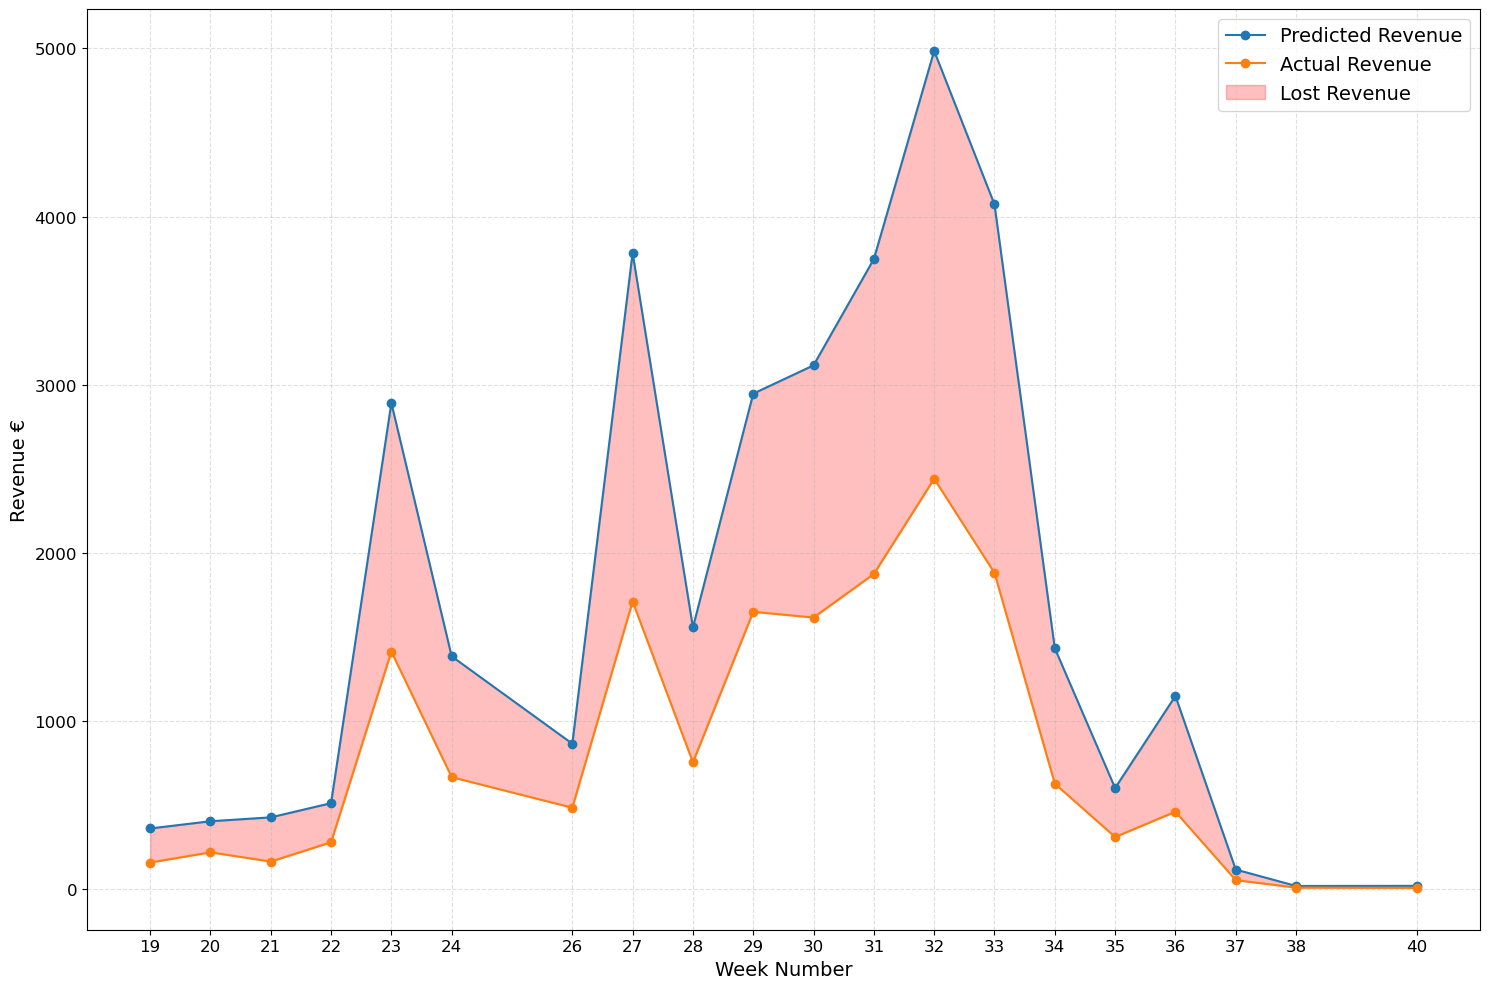

In [176]:
# Create same line graph as above, but with revenue and shading between lines to demonstrate lost revenue
plt.figure(figsize = (15,10))

# Define variables
x= out_of_stocks_by_week['week_number']
pred_rev= out_of_stocks_by_week['predicted_revenue']
act_rev= out_of_stocks_by_week['actual_revenue']

# plot on a line graph
plt.plot(x, pred_rev, label='Predicted Revenue', marker='o')
plt.plot(x, act_rev, label='Actual Revenue', marker='o')

# fill between the lines
plt.fill_between(x, pred_rev, act_rev, where= pred_rev > act_rev,
                 alpha=0.25,
                 color='red',
                 label='Lost Revenue')

plt.xticks(out_of_stocks_by_week['week_number'], fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=14)
plt.ylabel('Revenue €', fontsize=14)
plt.xlabel('Week Number', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()

# Export as image
plt.savefig('revenue_projection.png')

plt.show

In [177]:
# Identify biggest lost sales by station
# Select the dataset containing predicted and actual sales at station week level
df = sd_lagged_model_over28

# Calculate the difference between predicted and actual sales
df['residual'] = df['predicted_sold_units'] - df['sold_units']

# Calculate lost revenue by multiplying lost units by average unit price
df['Lost_revenue'] = (df['residual'] * 1.49).round(2)

# Group by petrol station and include location info from the first occurrence of each
station_loss = df.groupby('petrol_station').agg({
    'Lost_revenue': 'sum',
    'town_city': 'first',
    'direction': 'first'
}).reset_index()

# Sort from highest to lowest total lost revenue
station_loss_sorted = station_loss.sort_values(by='Lost_revenue').reset_index(drop=True)

# Display top 25 stations with most lost revenue and location context
station_loss_sorted.head(25)

petrol_station  Lost_revenue                  town_city direction
0            VALDEMORILLO      -1207.67               VALDEMORILLO        NW
1               HIPÓDROMO      -1018.31                     MADRID        NW
2          POL. GALAPAGAR       -789.27                  GALAPAGAR        NW
3        CTRA. FUENCARRAL       -777.51                 ALCOBENDAS         N
4               VENTURADA       -719.35                  VENTURADA         N
5                AZUQUECA       -557.67        AZUQUECA DE HENARES        NE
6                GUADALIX       -432.39      GUADALIX DE LA SIERRA         N
7       COLMENAR DE OREJA       -412.27          COLMENAR DE OREJA        SE
8           CONCHA ESPINA       -382.01                     MADRID         -
9            ARTURO SORIA       -378.62                     MADRID         -
10             EL PLANTÍO       -363.99                     MADRID        NW
11             CAMPO REAL       -352.15                 CAMPO REAL        SE
12  AVDA. ANDALUCÍA DCHO.       -320.23                     MADRID         -
13         MÓSTOLES DCHO.       -298.60                   MOSTOLES        SW
14          PERALES CTRA.       -249.44          PERALES DE TAJUÑA        SE
15             COLLADO II       -245.64           COLLADO-VILLALBA        NW
16                LOECHES       -216.01                    LOECHES        SE
17           TORRELODONES       -198.73               TORRELODONES        NW
18           CTR MÓSTOLES       -198.61                   MOSTOLES        SW
19          PINTO AUTOVÍA       -192.63                      PINTO         S
20   AVDA. ANDALUCÍA IZQ.       -161.54                     MADRID         -
21        SAN MARTÍN IZQ.       -156.87  SAN MARTIN DE VALDEIGLESI        SW
22    PUENTE SAN FERNANDO       -122.98    SAN FERNANDO DE HENARES        NW
23       LA ATALAYA DCHO.       -120.88       VILLAVICIOSA DE ODON        SW
24  CARDENAL HERRERA ORIA       -100.71                     MADRID         N

In [178]:
df = sd_lagged_model_over28
df['residual'] = df['predicted_sold_units'] - df['sold_units']
df['Lost_revenue'] = (df['residual'] * 1.49).round(2)

station_loss = df.groupby('petrol_station').agg({
    'Lost_revenue': 'sum',
    'town_city': 'first',
    'direction': 'first'
}).reset_index()

station_loss_sorted = station_loss.sort_values(by='Lost_revenue').reset_index(drop=True)

/var/folders/py/k9sb858d5lx8k2x1x87bzh3c0000gn/T/ipykernel_35890/1627925307.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


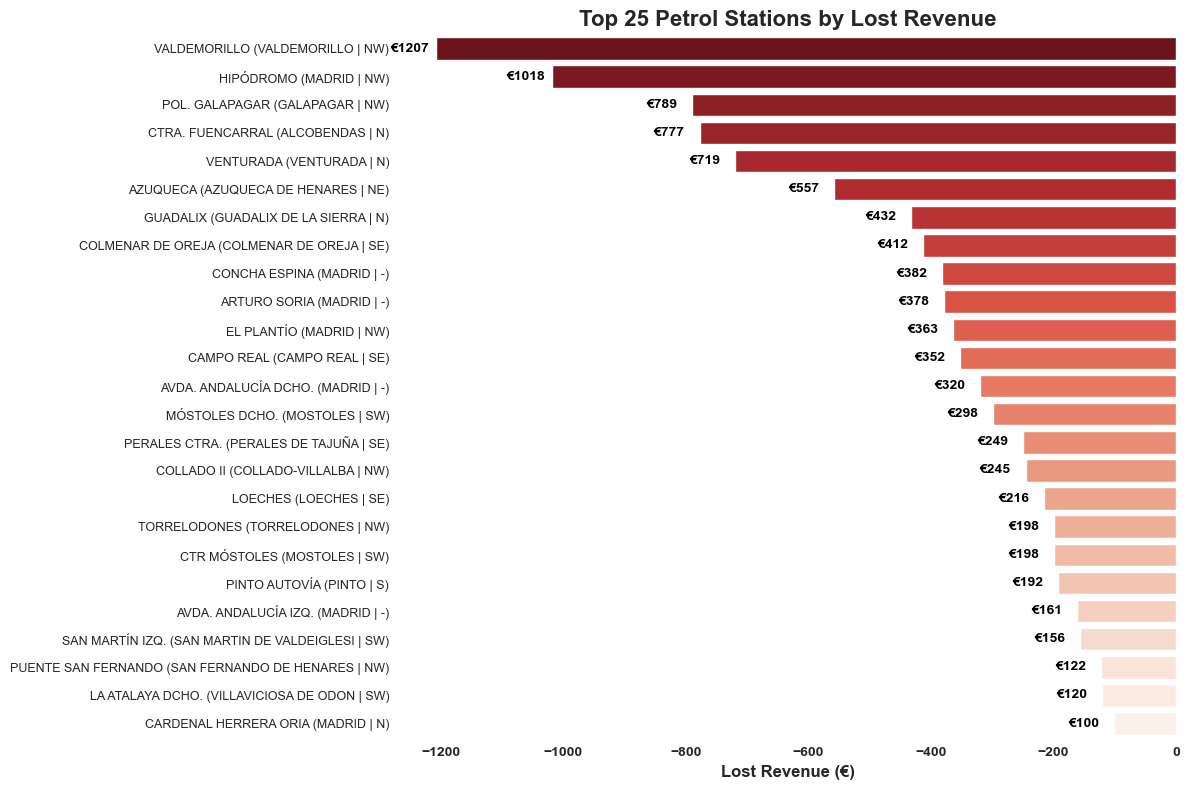

In [179]:
# Plot the stations with the most lost sales
df = sd_lagged_model_over28.copy()
df['residual'] = df['predicted_sold_units'] - df['sold_units']
df['Lost_revenue'] = (df['residual'] * 1.49).round(2)

station_loss = df.groupby('petrol_station').agg({
    'Lost_revenue': 'sum',
    'town_city': 'first',
    'direction': 'first'
}).reset_index()

station_loss_sorted = station_loss.sort_values(by='Lost_revenue').reset_index(drop=True)

# Create labels
station_loss_sorted['label'] = station_loss_sorted.apply(
    lambda row: f"{row['petrol_station']} ({row['town_city']} | {row['direction']})", axis=1)

# Plot
plt.figure(figsize=(12, 8))
sns.set_style("white")

# Create the barplot
barplot = sns.barplot(
    data=station_loss_sorted.head(25),
    y='label',
    x='Lost_revenue',
    palette='Reds_r')

# Add monetary value labels
for i, v in enumerate(station_loss_sorted.head(25)['Lost_revenue']):
    barplot.text(v - 75, i, f"€{abs(int(v))}", color='black', va='center', fontweight='bold')

# Format
plt.title('Top 25 Petrol Stations by Lost Revenue', fontsize=16, fontweight='bold')
plt.xlabel('Lost Revenue (€)', fontsize=12, fontweight='bold')
plt.ylabel('')
plt.xticks(fontsize=10, fontweight='bold')
plt.yticks(fontsize=9)
sns.despine(left=True, bottom=True)

# Export as image
plt.savefig('Top 25 Stations by Lost Revenue.png')

plt.tight_layout()
plt.show()

#### o) Running the model for 2023
- Imported 2023 festival and public holiday dates, as well as temperature data
- As we don't have actuals for 2023, used previous 2 weeks predicted ice sales as the lagged data for each week. Therefore, the model is likely not as accurate for predicting this far out, and is built for predicting the next weeks stock deliveries

In [181]:
# Create new dataframe starting from date the previous data stopped
# Create a list of dates in 2023
dates_2023 = pd.date_range(start='01.01.2023', end='31.12.2023', freq='D')

# Create a list of pertrol stations from 2022 data
stations_2023 = sd['petrol_station'].unique()

# Combine 2 lists to create a dataframe
base_df_2023 = pd.DataFrame([(date, station) for date in dates_2023 for station in stations_2023],
                            columns=['date', 'petrol_station'])

base_df_2023

date petrol_station
0     2023-01-01        ALOVERA
1     2023-01-01  POL. AZUQUECA
2     2023-01-01       AZUQUECA
3     2023-01-01    GUADALAJARA
4     2023-01-01    MERCAMADRID
...          ...            ...
33940 2023-12-31        YUNCLER
33941 2023-12-31         YUNCOS
33942 2023-12-31     AJALVIR MI
33943 2023-12-31         IBERUM
33944 2023-12-31            NaN

[33945 rows x 2 columns]

In [182]:
# Add in week number column
base_df_2023['week_number'] = base_df_2023['date'].dt.isocalendar().week

base_df_2023

date petrol_station  week_number
0     2023-01-01        ALOVERA           52
1     2023-01-01  POL. AZUQUECA           52
2     2023-01-01       AZUQUECA           52
3     2023-01-01    GUADALAJARA           52
4     2023-01-01    MERCAMADRID           52
...          ...            ...          ...
33940 2023-12-31        YUNCLER           52
33941 2023-12-31         YUNCOS           52
33942 2023-12-31     AJALVIR MI           52
33943 2023-12-31         IBERUM           52
33944 2023-12-31            NaN           52

[33945 rows x 3 columns]

In [183]:
# Import 2023 Temperature data
weather_2023 = pd.read_csv('Madrid_2023_weather.csv')

weather_2023.head()

name    datetime  tempmax  tempmin  temp  \
0  Madrid, Comunidad de Madrid, España  2023-01-01     15.3      6.0   9.5   
1  Madrid, Comunidad de Madrid, España  2023-01-02     11.9      8.2  10.1   
2  Madrid, Comunidad de Madrid, España  2023-01-03     11.8      4.6   7.8   
3  Madrid, Comunidad de Madrid, España  2023-01-04     12.9      1.5   6.2   
4  Madrid, Comunidad de Madrid, España  2023-01-05     12.9      1.6   6.1   

   feelslikemax  feelslikemin  feelslike  dew  humidity  ...  solarenergy  \
0          15.3           5.0        9.2  2.4      63.3  ...          8.0   
1          11.9           8.2       10.0  7.1      82.1  ...          8.1   
2          11.8           4.6        7.6  4.6      80.4  ...          9.2   
3          12.9           1.5        6.1  2.3      77.3  ...          7.4   
4          12.9           1.1        5.9  1.4      73.7  ...          9.3   

   uvindex  severerisk              sunrise               sunset  moonphase  \
0        4         NaN  2023-01-01T08:38:00  2023-01-01T17:58:38       0.31   
1        5         NaN  2023-01-02T08:38:07  2023-01-02T17:59:29       0.35   
2        4         NaN  2023-01-03T08:38:11  2023-01-03T18:00:21       0.38   
3        5         NaN  2023-01-04T08:38:13  2023-01-04T18:01:14       0.41   
4        5         NaN  2023-01-05T08:38:13  2023-01-05T18:02:09       0.45   

               conditions                                        description  \
0  Rain, Partially cloudy        Partly cloudy throughout the day with rain.   
1  Rain, Partially cloudy  Partly cloudy throughout the day with a chance...   
2        Partially cloudy                  Partly cloudy throughout the day.   
3                   Clear               Clear conditions throughout the day.   
4                   Clear               Clear conditions throughout the day.   

                icon                                           stations  
0               rain  08221099999,C1784,LEMD,LEVS,08226099999,F7959,...  
1               rain  08221099999,08224099999,C1784,LEMD,LEVS,082260...  
2  partly-cloudy-day  08221099999,08224099999,LEMD,LEVS,08226099999,...  
3          clear-day  08221099999,08224099999,C1784,LEMD,LEVS,082260...  
4          clear-day  08221099999,08224099999,LEMD,LEVS,08226099999,...  

[5 rows x 33 columns]

In [184]:
# Rename relevant columns for consistency
weather_2023 = weather_2023.rename(columns={
    'datetime':'date',
    'tempmax':'tmax'})

weather_2023.head()

name        date  tmax  tempmin  temp  \
0  Madrid, Comunidad de Madrid, España  2023-01-01  15.3      6.0   9.5   
1  Madrid, Comunidad de Madrid, España  2023-01-02  11.9      8.2  10.1   
2  Madrid, Comunidad de Madrid, España  2023-01-03  11.8      4.6   7.8   
3  Madrid, Comunidad de Madrid, España  2023-01-04  12.9      1.5   6.2   
4  Madrid, Comunidad de Madrid, España  2023-01-05  12.9      1.6   6.1   

   feelslikemax  feelslikemin  feelslike  dew  humidity  ...  solarenergy  \
0          15.3           5.0        9.2  2.4      63.3  ...          8.0   
1          11.9           8.2       10.0  7.1      82.1  ...          8.1   
2          11.8           4.6        7.6  4.6      80.4  ...          9.2   
3          12.9           1.5        6.1  2.3      77.3  ...          7.4   
4          12.9           1.1        5.9  1.4      73.7  ...          9.3   

   uvindex  severerisk              sunrise               sunset  moonphase  \
0        4         NaN  2023-01-01T08:38:00  2023-01-01T17:58:38       0.31   
1        5         NaN  2023-01-02T08:38:07  2023-01-02T17:59:29       0.35   
2        4         NaN  2023-01-03T08:38:11  2023-01-03T18:00:21       0.38   
3        5         NaN  2023-01-04T08:38:13  2023-01-04T18:01:14       0.41   
4        5         NaN  2023-01-05T08:38:13  2023-01-05T18:02:09       0.45   

               conditions                                        description  \
0  Rain, Partially cloudy        Partly cloudy throughout the day with rain.   
1  Rain, Partially cloudy  Partly cloudy throughout the day with a chance...   
2        Partially cloudy                  Partly cloudy throughout the day.   
3                   Clear               Clear conditions throughout the day.   
4                   Clear               Clear conditions throughout the day.   

                icon                                           stations  
0               rain  08221099999,C1784,LEMD,LEVS,08226099999,F7959,...  
1               rain  08221099999,08224099999,C1784,LEMD,LEVS,082260...  
2  partly-cloudy-day  08221099999,08224099999,LEMD,LEVS,08226099999,...  
3          clear-day  08221099999,08224099999,C1784,LEMD,LEVS,082260...  
4          clear-day  08221099999,08224099999,LEMD,LEVS,08226099999,...  

[5 rows x 33 columns]

In [185]:
weather_2023.dtypes

name                 object
date                 object
tmax                float64
tempmin             float64
temp                float64
feelslikemax        float64
feelslikemin        float64
feelslike           float64
dew                 float64
humidity            float64
precip              float64
precipprob            int64
precipcover         float64
preciptype           object
snow                  int64
snowdepth           float64
windgust            float64
windspeed           float64
winddir             float64
sealevelpressure    float64
cloudcover          float64
visibility          float64
solarradiation      float64
solarenergy         float64
uvindex               int64
severerisk          float64
sunrise              object
sunset               object
moonphase           float64
conditions           object
description          object
icon                 object
stations             object
dtype: object

In [186]:
# Convert date in weather_2023 to datetime object
weather_2023['date'] = pd.to_datetime(weather_2023['date'])

weather_2023.dtypes

name                        object
date                datetime64[ns]
tmax                       float64
tempmin                    float64
temp                       float64
feelslikemax               float64
feelslikemin               float64
feelslike                  float64
dew                        float64
humidity                   float64
precip                     float64
precipprob                   int64
precipcover                float64
preciptype                  object
snow                         int64
snowdepth                  float64
windgust                   float64
windspeed                  float64
winddir                    float64
sealevelpressure           float64
cloudcover                 float64
visibility                 float64
solarradiation             float64
solarenergy                float64
uvindex                      int64
severerisk                 float64
sunrise                     object
sunset                      object
moonphase           

In [187]:
# Add maxtemp data to 2023 dataframe
base_df_2023 = base_df_2023.merge(weather_2023[['date', 'tmax']], on='date', how='left')

base_df_2023

date petrol_station  week_number  tmax
0     2023-01-01        ALOVERA           52  15.3
1     2023-01-01  POL. AZUQUECA           52  15.3
2     2023-01-01       AZUQUECA           52  15.3
3     2023-01-01    GUADALAJARA           52  15.3
4     2023-01-01    MERCAMADRID           52  15.3
...          ...            ...          ...   ...
33940 2023-12-31        YUNCLER           52   9.3
33941 2023-12-31         YUNCOS           52   9.3
33942 2023-12-31     AJALVIR MI           52   9.3
33943 2023-12-31         IBERUM           52   9.3
33944 2023-12-31            NaN           52   9.3

[33945 rows x 4 columns]

In [188]:
# Add day of the week
base_df_2023['day_of_week'] = base_df_2023['date'].dt.day_name()

In [189]:
base_df_2023.head()

date petrol_station  week_number  tmax day_of_week
0 2023-01-01        ALOVERA           52  15.3      Sunday
1 2023-01-01  POL. AZUQUECA           52  15.3      Sunday
2 2023-01-01       AZUQUECA           52  15.3      Sunday
3 2023-01-01    GUADALAJARA           52  15.3      Sunday
4 2023-01-01    MERCAMADRID           52  15.3      Sunday

In [190]:
# Add hot_saturday tag
base_df_2023['hot_saturday'] = (base_df_2023['day_of_week'] == 'Saturday') & (base_df_2023['tmax'] > 35).astype(int)
base_df_2023['hot_friday'] = (base_df_2023['day_of_week'] == 'Friday') & (base_df_2023['tmax'] > 35).astype(int)

base_df_2023.head()

date petrol_station  week_number  tmax day_of_week  hot_saturday  \
0 2023-01-01        ALOVERA           52  15.3      Sunday         False   
1 2023-01-01  POL. AZUQUECA           52  15.3      Sunday         False   
2 2023-01-01       AZUQUECA           52  15.3      Sunday         False   
3 2023-01-01    GUADALAJARA           52  15.3      Sunday         False   
4 2023-01-01    MERCAMADRID           52  15.3      Sunday         False   

   hot_friday  
0       False  
1       False  
2       False  
3       False  
4       False

In [191]:
# Add direction from Madrid for each petrol station
station_directions = sd[['petrol_station', 'direction']].drop_duplicates()

# Merge direction info into your new base DataFrame
base_df_2023 = base_df_2023.merge(station_directions, on='petrol_station', how='left')

base_df_2023

date petrol_station  week_number  tmax day_of_week  hot_saturday  \
0     2023-01-01        ALOVERA           52  15.3      Sunday         False   
1     2023-01-01  POL. AZUQUECA           52  15.3      Sunday         False   
2     2023-01-01       AZUQUECA           52  15.3      Sunday         False   
3     2023-01-01    GUADALAJARA           52  15.3      Sunday         False   
4     2023-01-01    MERCAMADRID           52  15.3      Sunday         False   
...          ...            ...          ...   ...         ...           ...   
33940 2023-12-31        YUNCLER           52   9.3      Sunday         False   
33941 2023-12-31         YUNCOS           52   9.3      Sunday         False   
33942 2023-12-31     AJALVIR MI           52   9.3      Sunday         False   
33943 2023-12-31         IBERUM           52   9.3      Sunday         False   
33944 2023-12-31            NaN           52   9.3      Sunday         False   

       hot_friday direction  
0           False        NE  
1           False        NE  
2           False        NE  
3           False        NE  
4           False        SE  
...           ...       ...  
33940       False        SW  
33941       False        SW  
33942       False        NE  
33943       False        SW  
33944       False       NaN  

[33945 rows x 8 columns]

In [192]:
# Import festivals and public holiday data
festival_holidays = pd.read_excel('Festivals 2023.xlsx')

festival_holidays.head()

Description       Date                       Type  \
0    Primavera Sound 2023-06-08  Festival / Cultural Event   
1    Primavera Sound 2023-06-09  Festival / Cultural Event   
2    Primavera Sound 2023-06-10  Festival / Cultural Event   
3    Primavera Sound 2023-06-11  Festival / Cultural Event   
4  Mad Cool Festival 2023-07-06  Festival / Cultural Event   

                                   Notes  \
0         an estimated 150,000 attendees   
1         an estimated 150,000 attendees   
2         an estimated 150,000 attendees   
3         an estimated 150,000 attendees   
4  attracted over 65,000 daily attendees   

                                            location  festival_weight  
0  Ciudad del Rock in Arganda del Rey, an open-ai...              NaN  
1  Ciudad del Rock in Arganda del Rey, an open-ai...              NaN  
2  Ciudad del Rock in Arganda del Rey, an open-ai...              NaN  
3  Ciudad del Rock in Arganda del Rey, an open-ai...              NaN  
4  Villaverde area of Madrid, specifically at the...              NaN

In [193]:
festival_holidays.dtypes

Description                object
Date               datetime64[ns]
Type                       object
Notes                      object
location                   object
festival_weight           float64
dtype: object

In [194]:
# Create a list of dates where a festival is happening
festivals_2023 = festival_holidays[festival_holidays['Type'] == 'Festival / Cultural Event']['Date'].unique()

festivals_2023

<DatetimeArray>
['2023-06-08 00:00:00', '2023-06-09 00:00:00', '2023-06-10 00:00:00',
 '2023-06-11 00:00:00', '2023-07-06 00:00:00', '2023-07-07 00:00:00',
 '2023-07-08 00:00:00', '2023-02-17 00:00:00', '2023-02-18 00:00:00',
 '2023-02-19 00:00:00', '2023-02-20 00:00:00', '2023-02-21 00:00:00',
 '2023-02-22 00:00:00', '2023-05-26 00:00:00', '2023-05-27 00:00:00',
 '2023-05-28 00:00:00', '2023-05-29 00:00:00', '2023-05-30 00:00:00',
 '2023-05-31 00:00:00', '2023-06-01 00:00:00', '2023-06-02 00:00:00',
 '2023-06-03 00:00:00', '2023-06-04 00:00:00', '2023-06-05 00:00:00',
 '2023-06-06 00:00:00', '2023-06-07 00:00:00', '2023-06-23 00:00:00',
 '2023-06-24 00:00:00', '2023-06-25 00:00:00', '2023-06-26 00:00:00',
 '2023-06-27 00:00:00', '2023-06-28 00:00:00', '2023-06-29 00:00:00',
 '2023-06-30 00:00:00', '2023-07-01 00:00:00', '2023-07-02 00:00:00',
 '2023-08-11 00:00:00', '2023-08-12 00:00:00', '2023-08-13 00:00:00',
 '2023-08-14 00:00:00', '2023-08-15 00:00:00', '2023-05-12 00:00:00',
 '20

In [195]:
# Create a column with festival booleen
base_df_2023['festivals'] = base_df_2023['date'].isin(festivals_2023)

In [196]:
base_df_2023.head()

date petrol_station  week_number  tmax day_of_week  hot_saturday  \
0 2023-01-01        ALOVERA           52  15.3      Sunday         False   
1 2023-01-01  POL. AZUQUECA           52  15.3      Sunday         False   
2 2023-01-01       AZUQUECA           52  15.3      Sunday         False   
3 2023-01-01    GUADALAJARA           52  15.3      Sunday         False   
4 2023-01-01    MERCAMADRID           52  15.3      Sunday         False   

   hot_friday direction  festivals  
0       False        NE      False  
1       False        NE      False  
2       False        NE      False  
3       False        NE      False  
4       False        SE      False

In [197]:
# Create a list of dates where a public holidays are happening
holidays_2023 = festival_holidays[festival_holidays['Type'] == 'Public Holiday']['Date'].unique()

holidays_2023

<DatetimeArray>
['2023-05-15 00:00:00', '2023-04-01 00:00:00', '2023-04-02 00:00:00',
 '2023-04-03 00:00:00', '2023-04-04 00:00:00', '2023-04-05 00:00:00',
 '2023-04-06 00:00:00', '2023-04-07 00:00:00', '2023-04-08 00:00:00',
 '2023-04-09 00:00:00', '2023-01-01 00:00:00', '2023-01-06 00:00:00',
 '2023-03-20 00:00:00', '2023-05-01 00:00:00', '2023-05-02 00:00:00',
 '2023-08-15 00:00:00', '2023-10-12 00:00:00', '2023-11-01 00:00:00',
 '2023-11-09 00:00:00', '2023-12-06 00:00:00', '2023-12-08 00:00:00',
 '2023-12-25 00:00:00']
Length: 22, dtype: datetime64[ns]

In [198]:
# Create a column with public holiday booleen
base_df_2023['public_holiday'] = base_df_2023['date'].isin(holidays_2023)

base_df_2023.head()

date petrol_station  week_number  tmax day_of_week  hot_saturday  \
0 2023-01-01        ALOVERA           52  15.3      Sunday         False   
1 2023-01-01  POL. AZUQUECA           52  15.3      Sunday         False   
2 2023-01-01       AZUQUECA           52  15.3      Sunday         False   
3 2023-01-01    GUADALAJARA           52  15.3      Sunday         False   
4 2023-01-01    MERCAMADRID           52  15.3      Sunday         False   

   hot_friday direction  festivals  public_holiday  
0       False        NE      False            True  
1       False        NE      False            True  
2       False        NE      False            True  
3       False        NE      False            True  
4       False        SE      False            True

In [199]:
# Group data by week to run model at week level
weekly_2023 = base_df_2023.groupby(['petrol_station', 'week_number']).agg({
    'tmax': 'mean',
    'hot_saturday': 'sum',
    'hot_friday': 'sum',
    'festivals': 'sum',
    'public_holiday': 'sum',
    'direction':'first'
}).reset_index()

weekly_2023.head()

petrol_station  week_number       tmax  hot_saturday  hot_friday  festivals  \
0     AJALVIR MD            1  11.500000             0           0          0   
1     AJALVIR MD            2  11.100000             0           0          0   
2     AJALVIR MD            3   9.357143             0           0          0   
3     AJALVIR MD            4   8.242857             0           0          0   
4     AJALVIR MD            5  14.171429             0           0          0   

   public_holiday direction  
0               1        NE  
1               0        NE  
2               0        NE  
3               0        NE  
4               0        NE

In [200]:
# Fit the model to 2023 data
# Create direction dummies in-line with 2022 trained model
direction_dummies_2023 = pd.get_dummies(weekly_2023['direction'], prefix='direction', drop_first=True)

# Build 2023 variable list
X_2023 = pd.concat([
    weekly_2023[['tmax', 'hot_saturday', 'hot_friday', 'public_holiday', 'festivals']],
    direction_dummies_2023
], axis=1)

# Add constant to 2023 data
X_2023 = sm.add_constant(X_2023)

# Compare the 2 datasets to ensure consistent
print(X.columns)
print(X_2023.columns)


Index(['const', 'tmax', 'hot_saturday', 'hot_friday', 'public_holiday',
       'festivals', 'sold_units_lag1', 'sold_units_lag2', 'direction_E',
       'direction_M', 'direction_N', 'direction_NE', 'direction_NW',
       'direction_S', 'direction_SE', 'direction_SW'],
      dtype='object')
Index(['const', 'tmax', 'hot_saturday', 'hot_friday', 'public_holiday',
       'festivals', 'direction_E', 'direction_M', 'direction_N',
       'direction_NE', 'direction_NW', 'direction_S', 'direction_SE',
       'direction_SW'],
      dtype='object')


In [201]:
# Add in lagged data columns (using last two weeks of 2022 data, then predicted data)
# Add columns to X_2023
X_2023['sold_units_lag1'] = 0.0
X_2023['sold_units_lag2'] = 0.0

X_2023.head()

const       tmax  hot_saturday  hot_friday  public_holiday  festivals  \
0    1.0  11.500000             0           0               1          0   
1    1.0  11.100000             0           0               0          0   
2    1.0   9.357143             0           0               0          0   
3    1.0   8.242857             0           0               0          0   
4    1.0  14.171429             0           0               0          0   

   direction_E  direction_M  direction_N  direction_NE  direction_NW  \
0        False        False        False          True         False   
1        False        False        False          True         False   
2        False        False        False          True         False   
3        False        False        False          True         False   
4        False        False        False          True         False   

   direction_S  direction_SE  direction_SW  sold_units_lag1  sold_units_lag2  
0        False         False         False              0.0              0.0  
1        False         False         False              0.0              0.0  
2        False         False         False              0.0              0.0  
3        False         False         False              0.0              0.0  
4        False         False         False              0.0              0.0

In [202]:
# Reorder 2023 columns to ensure they are aligned to original model 
X_2023 = X_2023[X.columns]

# Compare the 2 datasets to ensure consistent
print(X.columns)
print(X_2023.columns)

Index(['const', 'tmax', 'hot_saturday', 'hot_friday', 'public_holiday',
       'festivals', 'sold_units_lag1', 'sold_units_lag2', 'direction_E',
       'direction_M', 'direction_N', 'direction_NE', 'direction_NW',
       'direction_S', 'direction_SE', 'direction_SW'],
      dtype='object')
Index(['const', 'tmax', 'hot_saturday', 'hot_friday', 'public_holiday',
       'festivals', 'sold_units_lag1', 'sold_units_lag2', 'direction_E',
       'direction_M', 'direction_N', 'direction_NE', 'direction_NW',
       'direction_S', 'direction_SE', 'direction_SW'],
      dtype='object')


In [203]:
# Create a fresh copy of previous 2022 model data
weekly_2022 = sd_lagged_model.copy()
weekly_2022 = weekly_2022.sort_values(['petrol_station', 'week_number'])

# Get last 2 weeks of 2022 sales per station to seed lags
lag_seed = (
    weekly_2022.groupby('petrol_station')
    .apply(lambda g: g[['week_number', 'sold_units']].tail(2).reset_index(drop=True))
    .reset_index(level=1, drop=True))

/var/folders/py/k9sb858d5lx8k2x1x87bzh3c0000gn/T/ipykernel_35890/1357956850.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: g[['week_number', 'sold_units']].tail(2).reset_index(drop=True))


In [204]:
# Loop through each petrol station and update lags & predictions
for station in weekly_2023['petrol_station'].unique():
    # Get index positions in X_2023
    station_mask = weekly_2023['petrol_station'] == station
    station_indices = weekly_2023[station_mask].sort_values('week_number').index.tolist()

    # Get last 2 weeks of 2022 sales for seeding
    lag_rows = lag_seed.loc[station].sort_values('week_number').reset_index(drop=True)
    lag2 = lag_rows.loc[0, 'sold_units']
    lag1 = lag_rows.loc[1, 'sold_units']

    for idx in station_indices:
        # Set lag values
        X_2023.at[idx, 'sold_units_lag1'] = lag1
        X_2023.at[idx, 'sold_units_lag2'] = lag2

        # Predict
        X_row = X_2023.loc[[idx]]  # Single-row DataFrame
        pred = model.predict(X_row).iloc[0]

        # Store prediction
        weekly_2023.at[idx, 'predicted_sold_units'] = pred

        # Update lags for next prediction
        lag2 = lag1
        lag1 = pred

In [205]:
weekly_2023.head()

petrol_station  week_number       tmax  hot_saturday  hot_friday  festivals  \
0     AJALVIR MD            1  11.500000             0           0          0   
1     AJALVIR MD            2  11.100000             0           0          0   
2     AJALVIR MD            3   9.357143             0           0          0   
3     AJALVIR MD            4   8.242857             0           0          0   
4     AJALVIR MD            5  14.171429             0           0          0   

   public_holiday direction  predicted_sold_units  
0               1        NE             10.848837  
1               0        NE              7.408931  
2               0        NE              5.404150  
3               0        NE              3.520847  
4               0        NE              3.843043

In [206]:
# Group weeks without petrol station to allow for visualisation
weekly_2023_total = weekly_2023.groupby('week_number')[['predicted_sold_units']].sum().reset_index()

In [207]:
weekly_2023_total.head()

week_number  predicted_sold_units
0            1           1337.318774
1            2           1078.862573
2            3            886.611684
3            4            718.072496
4            5            749.011589

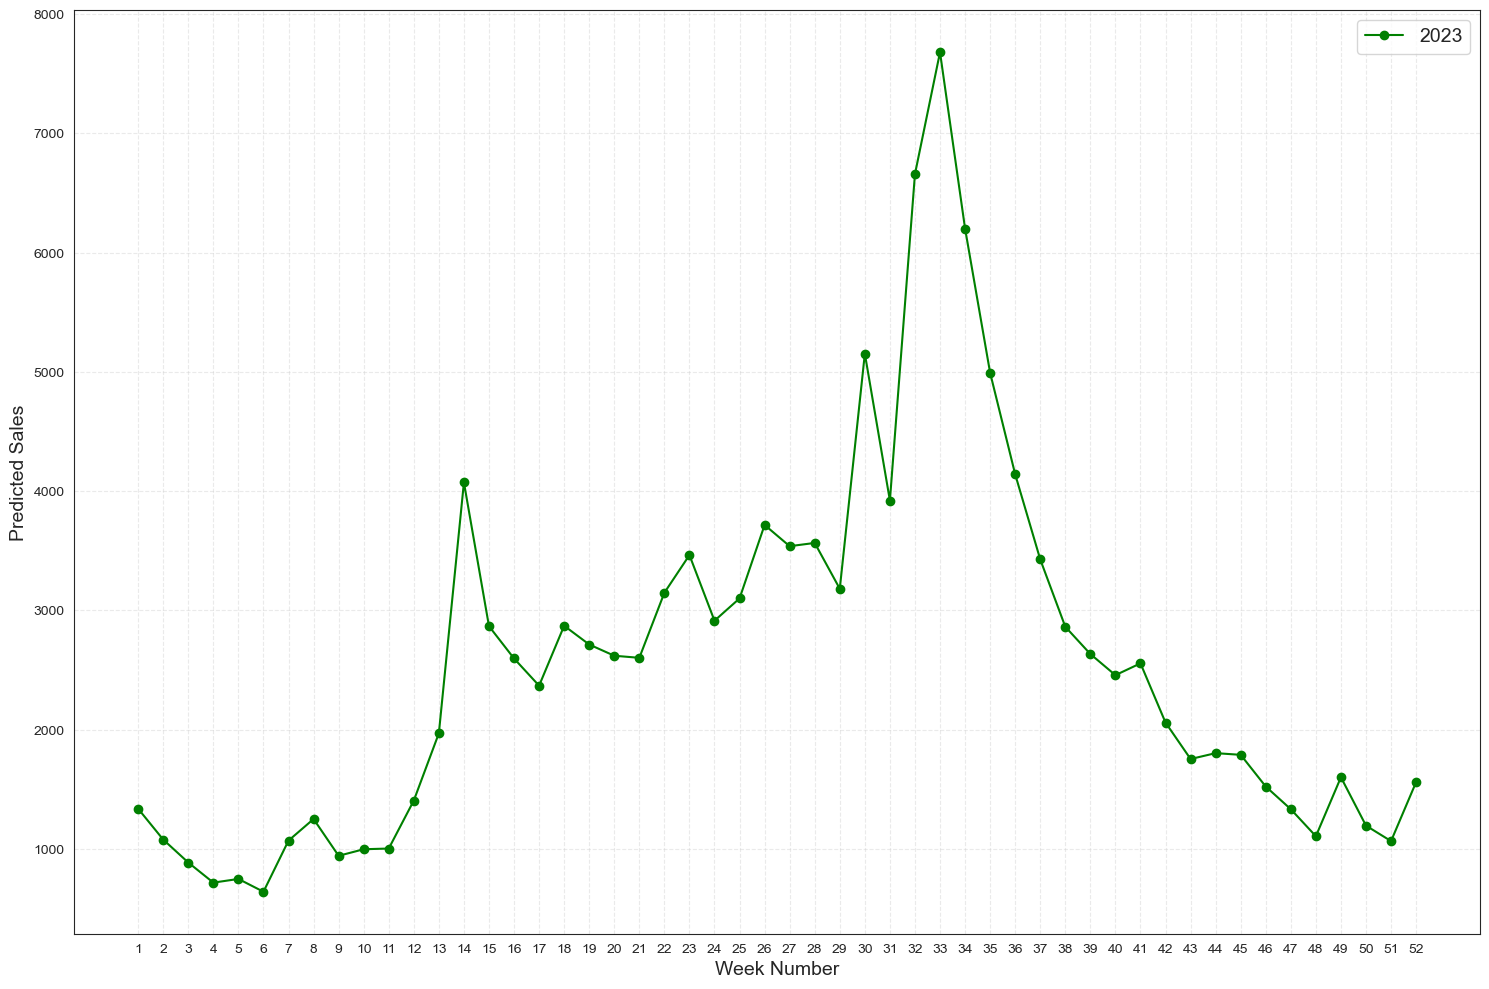

In [208]:
# Plot 2023 Predicted values over time
plt.figure(figsize=(15,10))
plt.plot(weekly_2023_total['week_number'], weekly_2023_total['predicted_sold_units'], label='2023', marker='o', color='green')

plt.xlabel('Week Number', fontsize=14)
plt.ylabel('Predicted Sales', fontsize=14)
plt.xticks(weekly_2023_total['week_number'], fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=14)
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.savefig('2023_predictions.png', dpi=300, bbox_inches='tight')
plt.show()

In [209]:
# Add 2022 actual and predicted sales as comparison
# Group the 2022 into weeks for comparison
weekly_2022 = sd_lagged_model.groupby('week_number')[['predicted_sold_units', 'sold_units']].sum().reset_index()

In [210]:
sd_lagged_model.head()

direction town_city petrol_station  week_number  sold_units       tmax  \
1225        NE   AJALVIR     AJALVIR MD          3.0         8.0  10.066667   
1226        NE   AJALVIR     AJALVIR MD          4.0         6.0  13.200000   
1227        NE   AJALVIR     AJALVIR MD          5.0         7.0  14.266667   
1228        NE   AJALVIR     AJALVIR MD          6.0         5.0  15.666667   
1229        NE   AJALVIR     AJALVIR MD          7.0         6.0  15.266667   

      hot_saturday  hot_friday  hot_sunday  festivals  public_holiday  \
1225             0           0           0        0.0             0.0   
1226             0           0           0        0.0             0.0   
1227             0           0           0        2.0             0.0   
1228             0           0           0        0.0             0.0   
1229             0           0           0        0.0             0.0   

      distance_madrid_km  season  month  sold_units_lag1  sold_units_lag2  \
1225                36.9  winter    1.0             13.0              6.0   
1226                36.9  winter    1.0              8.0             13.0   
1227                36.9  winter    2.0              6.0              8.0   
1228                36.9  winter    2.0              7.0              6.0   
1229                36.9  winter    2.0              5.0              7.0   

      predicted_sold_units  residual  
1225              7.802084  0.197916  
1226              7.092125 -1.092125  
1227              8.394644 -1.394644  
1228              6.173199 -1.173199  
1229              5.163645  0.836355

In [211]:
weekly_2022.head()

week_number  predicted_sold_units  sold_units
0          3.0            783.948393       848.0
1          4.0            812.110069       942.0
2          5.0           1029.510131      1251.0
3          6.0           1119.848901      1076.0
4          7.0           1025.975597      1260.0

In [212]:
weekly_2023_total.head()

week_number  predicted_sold_units
0            1           1337.318774
1            2           1078.862573
2            3            886.611684
3            4            718.072496
4            5            749.011589

In [213]:
sd_lagged_model.columns

Index(['direction', 'town_city', 'petrol_station', 'week_number', 'sold_units',
       'tmax', 'hot_saturday', 'hot_friday', 'hot_sunday', 'festivals',
       'public_holiday', 'distance_madrid_km', 'season', 'month',
       'sold_units_lag1', 'sold_units_lag2', 'predicted_sold_units',
       'residual'],
      dtype='object')

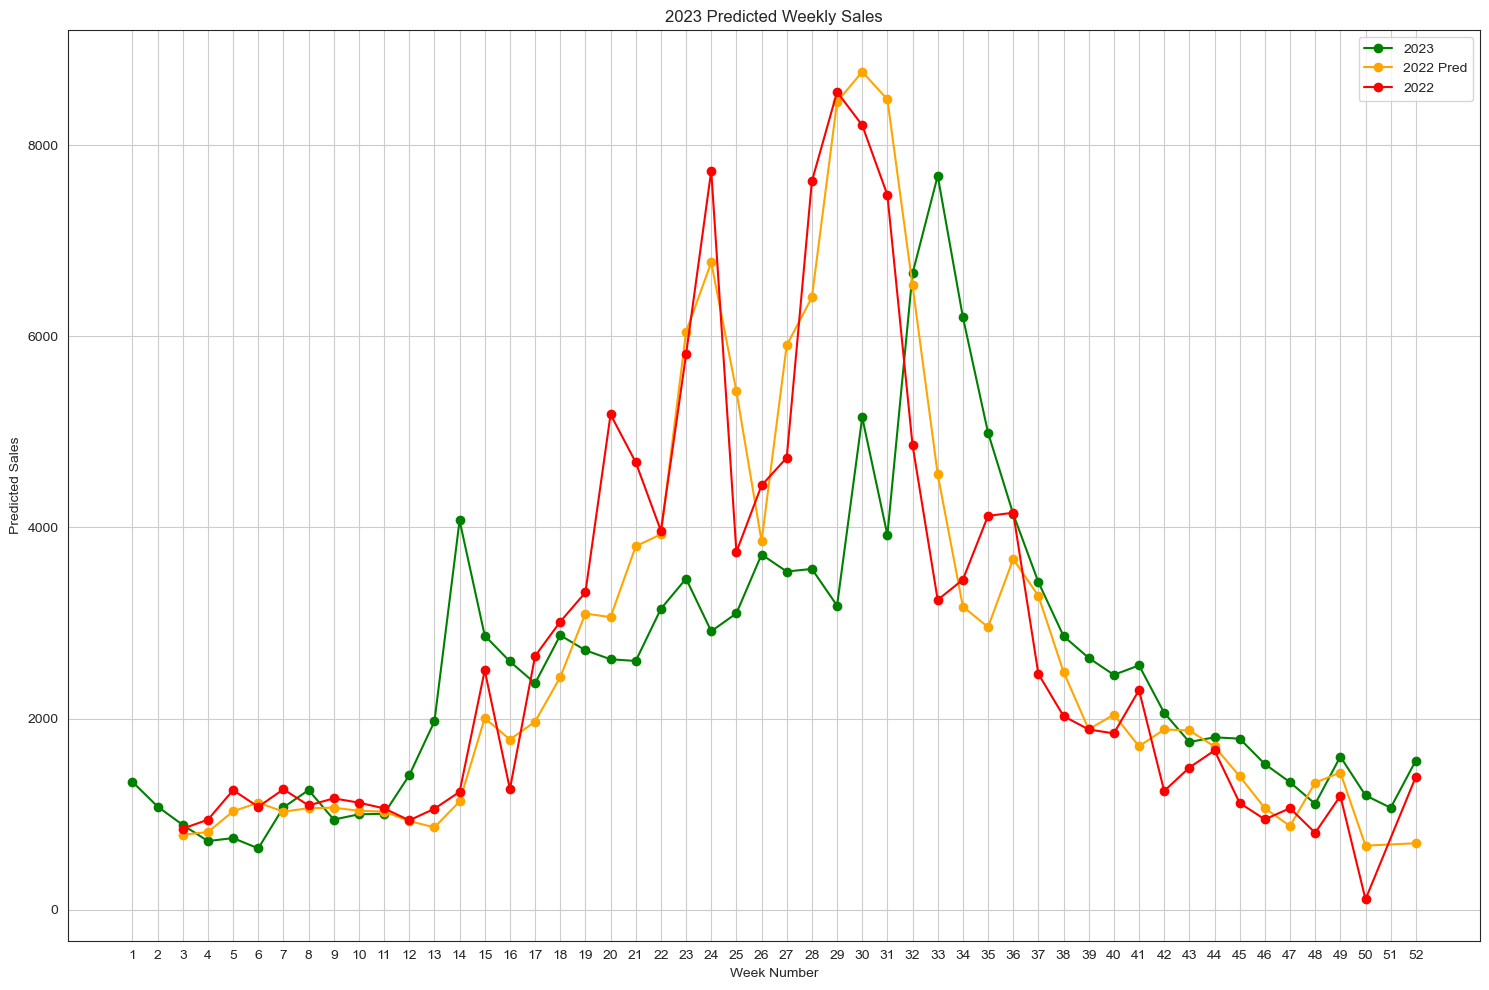

In [214]:
# Plot 2023 Predicted values over time
plt.figure(figsize=(15,10))
plt.plot(weekly_2023_total['week_number'], weekly_2023_total['predicted_sold_units'], label='2023', marker='o', color='green')
plt.plot(weekly_2022['week_number'], weekly_2022['predicted_sold_units'], label='2022 Pred', marker='o', color='orange')
plt.plot(weekly_2022['week_number'], weekly_2022['sold_units'], label='2022', marker='o', color='red')
plt.xlabel('Week Number')
plt.ylabel('Predicted Sales')
plt.title('2023 Predicted Weekly Sales')
plt.legend()
plt.xticks(weekly_2023_total['week_number'])
plt.grid(True)
plt.tight_layout()
plt.show()

#### p) Incremental Revenue from optimising Products
- Built baseline model to supply ice cubes upto by running same model but capping demand at 28 degrees, removing hot_sat, hot_fri, festivals and public holiday tags
- Then using total unit sales from the 2023 predicted variables, anything over the baseline demand, assumed supply of Premium ice
- Using this approach, total revenue for 2023 would be:
Total Premium Ice Revenue: €50,730.20
Total Ice Cube Revenue: €158,021.70
Total Revenue: €208,751.90

In [216]:
# Create a baseline demand model where max temp is capped at 28 degrees and removing hot_sat, hot_fri, festivals and public holiday tags
X_baseline = X_2023.copy()
X_baseline['tmax'] = X_baseline['tmax'].clip(upper=20)
X_baseline['hot_saturday'] = 0
X_baseline['hot_friday'] = 0
X_baseline['public_holiday'] = 0
X_baseline['festivals'] = 0

X_baseline.head()

const       tmax  hot_saturday  hot_friday  public_holiday  festivals  \
0    1.0  11.500000             0           0               0          0   
1    1.0  11.100000             0           0               0          0   
2    1.0   9.357143             0           0               0          0   
3    1.0   8.242857             0           0               0          0   
4    1.0  14.171429             0           0               0          0   

   sold_units_lag1  sold_units_lag2  direction_E  direction_M  direction_N  \
0         9.000000        13.000000        False        False        False   
1        10.848837         9.000000        False        False        False   
2         7.408931        10.848837        False        False        False   
3         5.404150         7.408931        False        False        False   
4         3.520847         5.404150        False        False        False   

   direction_NE  direction_NW  direction_S  direction_SE  direction_SW  
0          True         False        False         False         False  
1          True         False        False         False         False  
2          True         False        False         False         False  
3          True         False        False         False         False  
4          True         False        False         False         False

In [217]:
# Run model again on baseline data (i.e. where max temp capped)
weekly_2023['baseline_units'] = model.predict(X_baseline)

weekly_2023.head()

petrol_station  week_number       tmax  hot_saturday  hot_friday  festivals  \
0     AJALVIR MD            1  11.500000             0           0          0   
1     AJALVIR MD            2  11.100000             0           0          0   
2     AJALVIR MD            3   9.357143             0           0          0   
3     AJALVIR MD            4   8.242857             0           0          0   
4     AJALVIR MD            5  14.171429             0           0          0   

   public_holiday direction  predicted_sold_units baseline_units  
0               1        NE             10.848837       7.154274  
1               0        NE              7.408931       7.408931  
2               0        NE              5.404150        5.40415  
3               0        NE              3.520847       3.520847  
4               0        NE              3.843043       3.843043

In [218]:
# Compare predicted vs. baseline for each week
product_comparison_2023 = weekly_2023.groupby('week_number')[['predicted_sold_units','baseline_units']].sum().reset_index()

product_comparison_2023.head()

week_number  predicted_sold_units baseline_units
0            1           1337.318774     997.418997
1            2           1078.862573    1078.862573
2            3            886.611684     886.611684
3            4            718.072496     718.072496
4            5            749.011589     749.011589

In [219]:
product_comparison_2023.dtypes

week_number              UInt32
predicted_sold_units    float64
baseline_units           object
dtype: object

In [220]:
# Convert predicted and baseline units to numbers
product_comparison_2023['predicted_sold_units'] = pd.to_numeric(
    product_comparison_2023['predicted_sold_units'], errors='coerce')

product_comparison_2023['baseline_units'] = pd.to_numeric(
    product_comparison_2023['baseline_units'], errors='coerce')

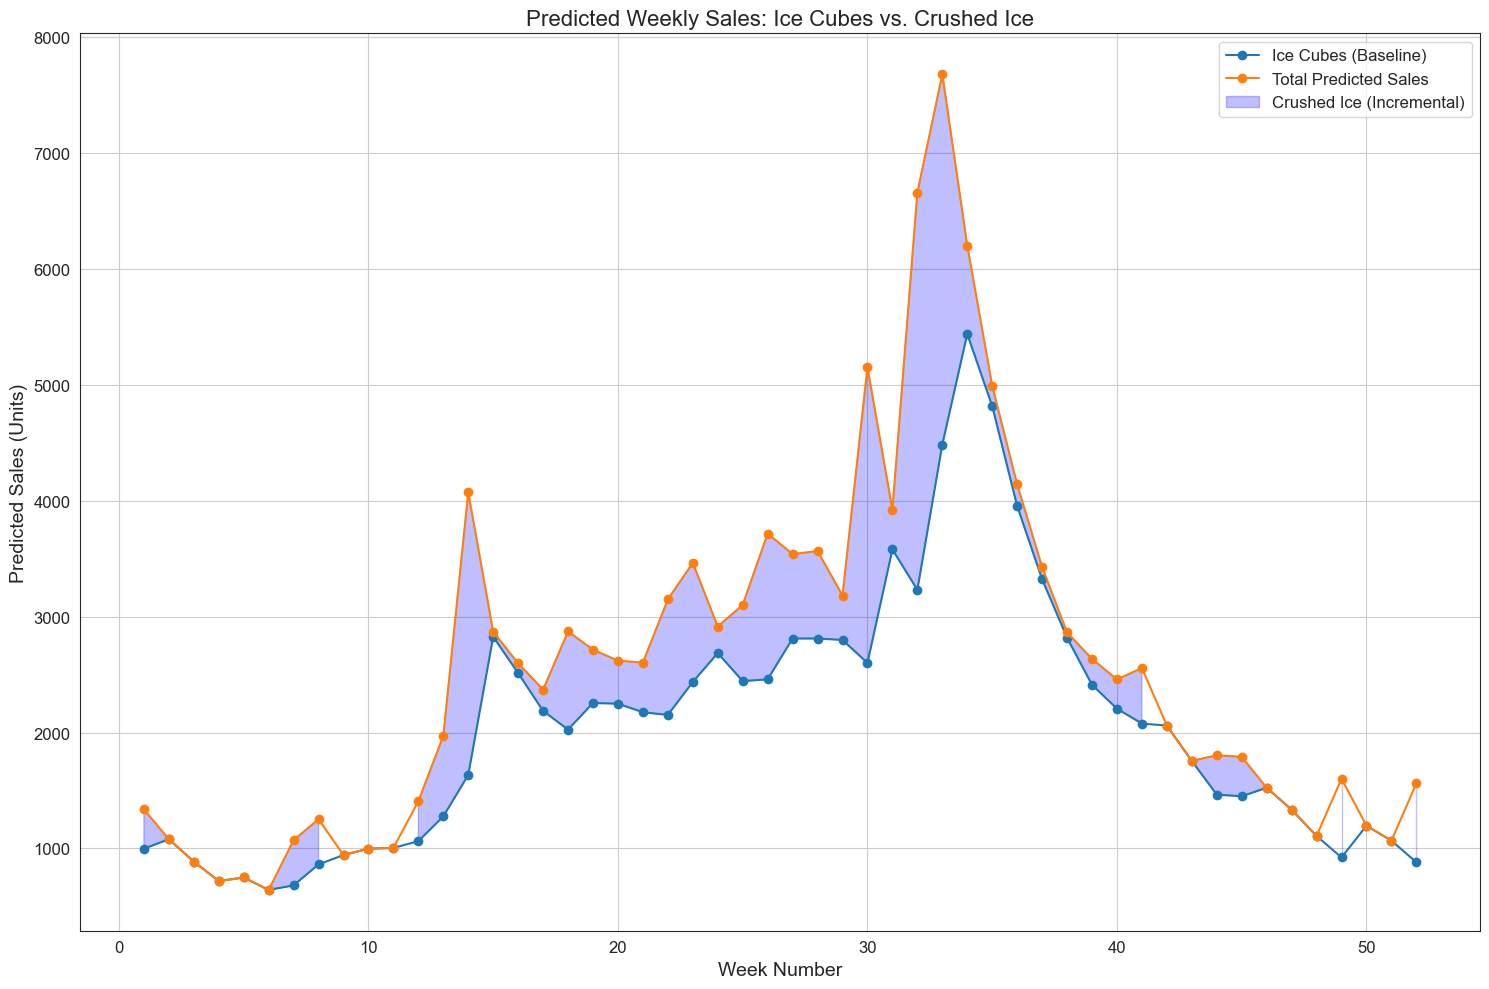

In [221]:
plt.figure(figsize=(15,10))

# Define variables
x = product_comparison_2023['week_number']
ice_cubes = product_comparison_2023['baseline_units']
total_sales = product_comparison_2023['predicted_sold_units']

# Line plots
plt.plot(x, ice_cubes, label='Ice Cubes (Baseline)', marker='o')
plt.plot(x, total_sales, label='Total Predicted Sales', marker='o')

# Shading for premium product sales
plt.fill_between(x, ice_cubes, total_sales, where=total_sales > ice_cubes,
                 alpha=0.25, color='blue', label='Crushed Ice (Incremental)')

plt.xlabel('Week Number', fontsize=14)
plt.ylabel('Predicted Sales (Units)', fontsize=14)
plt.title('Predicted Weekly Sales: Ice Cubes vs. Crushed Ice', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.legend(fontsize=12)
plt.tight_layout()

# Save chart
plt.savefig('product_sales_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

In [222]:
product_comparison_2023.head()

week_number  predicted_sold_units  baseline_units
0            1           1337.318774      997.418997
1            2           1078.862573     1078.862573
2            3            886.611684      886.611684
3            4            718.072496      718.072496
4            5            749.011589      749.011589

In [223]:
# Add in a premium product column (i.e. predicted_sold_units - baseline_units)
product_comparison_2023['premium_units'] = product_comparison_2023['predicted_sold_units'] - product_comparison_2023['baseline_units']

product_comparison_2023.head()

week_number  predicted_sold_units  baseline_units  premium_units
0            1           1337.318774      997.418997   3.398998e+02
1            2           1078.862573     1078.862573   4.547474e-13
2            3            886.611684      886.611684   2.273737e-13
3            4            718.072496      718.072496   0.000000e+00
4            5            749.011589      749.011589  -2.273737e-13

In [224]:
# Add revenue lines for each product
product_comparison_2023['ice_cube_rev'] = (product_comparison_2023['baseline_units']*1.49).round(2)

product_comparison_2023.head()

week_number  predicted_sold_units  baseline_units  premium_units  \
0            1           1337.318774      997.418997   3.398998e+02   
1            2           1078.862573     1078.862573   4.547474e-13   
2            3            886.611684      886.611684   2.273737e-13   
3            4            718.072496      718.072496   0.000000e+00   
4            5            749.011589      749.011589  -2.273737e-13   

   ice_cube_rev  
0       1486.15  
1       1607.51  
2       1321.05  
3       1069.93  
4       1116.03

In [225]:
# Add revenue lines for each product
product_comparison_2023['premium_rev'] = (product_comparison_2023['premium_units']*1.89).round(2)

product_comparison_2023.head()

week_number  predicted_sold_units  baseline_units  premium_units  \
0            1           1337.318774      997.418997   3.398998e+02   
1            2           1078.862573     1078.862573   4.547474e-13   
2            3            886.611684      886.611684   2.273737e-13   
3            4            718.072496      718.072496   0.000000e+00   
4            5            749.011589      749.011589  -2.273737e-13   

   ice_cube_rev  premium_rev  
0       1486.15       642.41  
1       1607.51         0.00  
2       1321.05         0.00  
3       1069.93         0.00  
4       1116.03        -0.00

In [226]:
product_comparison_2023['total_rev'] = (product_comparison_2023['ice_cube_rev']+product_comparison_2023['premium_rev']).round(2)

product_comparison_2023.head()

week_number  predicted_sold_units  baseline_units  premium_units  \
0            1           1337.318774      997.418997   3.398998e+02   
1            2           1078.862573     1078.862573   4.547474e-13   
2            3            886.611684      886.611684   2.273737e-13   
3            4            718.072496      718.072496   0.000000e+00   
4            5            749.011589      749.011589  -2.273737e-13   

   ice_cube_rev  premium_rev  total_rev  
0       1486.15       642.41    2128.56  
1       1607.51         0.00    1607.51  
2       1321.05         0.00    1321.05  
3       1069.93         0.00    1069.93  
4       1116.03        -0.00    1116.03

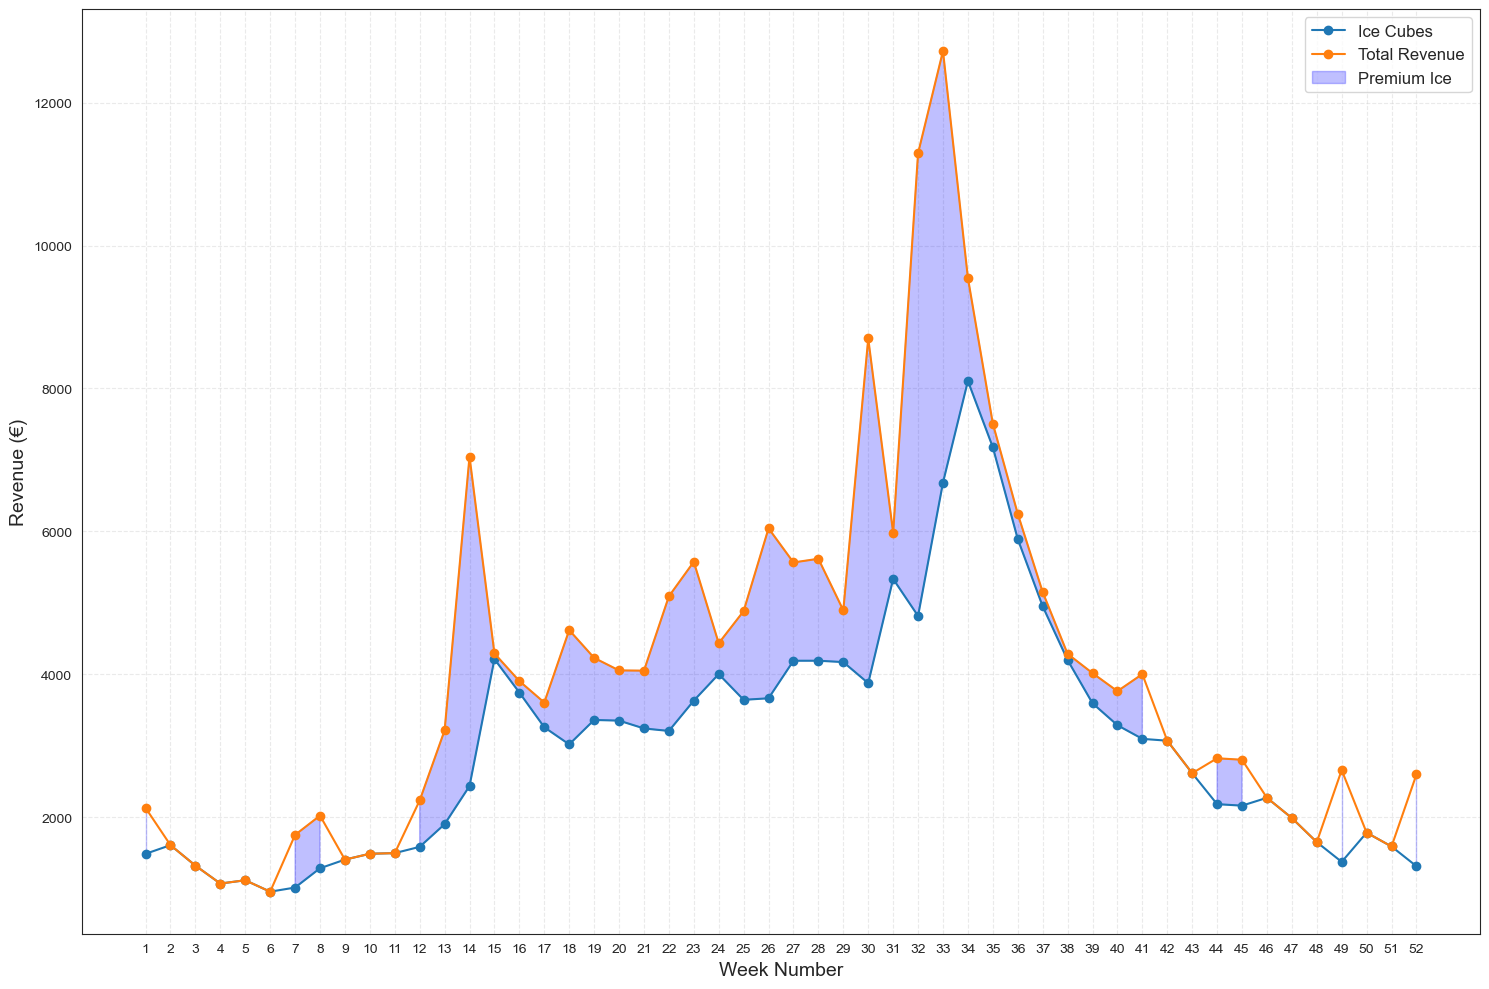

In [227]:
plt.figure(figsize=(15,10))

# Define variables
x = product_comparison_2023['week_number']
ice_cubes_rev = product_comparison_2023['ice_cube_rev']
total_sales_rev = product_comparison_2023['total_rev']

# Line plots
plt.plot(x, ice_cubes_rev, label='Ice Cubes', marker='o')
plt.plot(x, total_sales_rev, label='Total Revenue', marker='o')

# Shading for premium product sales
plt.fill_between(x, ice_cubes_rev, total_sales_rev, where=total_sales_rev > ice_cubes_rev,
                 alpha=0.25, color='blue', label='Premium Ice')

# Labels and styling
plt.xlabel('Week Number', fontsize=14)
plt.ylabel('Revenue (€)', fontsize=14)
plt.xticks(product_comparison_2023['week_number'],fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.4)
plt.legend(fontsize=12)
plt.tight_layout()

# Save chart
plt.savefig('product_rev_comparison_20.png', dpi=300, bbox_inches='tight')
plt.show()

In [228]:
# Work out total value of incremental revenue through premium ice
total_premium_revenue = product_comparison_2023['premium_rev'].sum()
print(f"Total Premium Ice Revenue: €{total_premium_revenue:,.2f}")

total_ice_cube_revenue = product_comparison_2023['ice_cube_rev'].sum()
print(f"Total Ice Cube Revenue: €{total_ice_cube_revenue:,.2f}")

total_revenue = product_comparison_2023['total_rev'].sum()
print(f"Total Revenue: €{total_revenue:,.2f}")

Total Premium Ice Revenue: €50,730.20
Total Ice Cube Revenue: €158,021.70
Total Revenue: €208,751.90


In [229]:
# Work out how much additional revenue this is for the business
product_comparison_2023['additional_rev'] = (product_comparison_2023['premium_units']*.3).round(2)

product_comparison_2023.head()

week_number  predicted_sold_units  baseline_units  premium_units  \
0            1           1337.318774      997.418997   3.398998e+02   
1            2           1078.862573     1078.862573   4.547474e-13   
2            3            886.611684      886.611684   2.273737e-13   
3            4            718.072496      718.072496   0.000000e+00   
4            5            749.011589      749.011589  -2.273737e-13   

   ice_cube_rev  premium_rev  total_rev  additional_rev  
0       1486.15       642.41    2128.56          101.97  
1       1607.51         0.00    1607.51            0.00  
2       1321.05         0.00    1321.05            0.00  
3       1069.93         0.00    1069.93            0.00  
4       1116.03        -0.00    1116.03           -0.00

In [230]:
# Sum-up additional revenue made through premium ice sales
total_incremental_rev = product_comparison_2023['additional_rev'].sum()
print(f"Total Revenue: €{total_incremental_rev:,.2f}")

Total Revenue: €8,052.40


In [231]:
sd.columns

Index(['year', 'province', 'town_city', 'post_code', 'company_code',
       'petrol_station_code', 'petrol_station', 'date', 'sold_units',
       'day_of_the_week', 'week_number', 'month', 'season_weight', 'season',
       'distance_madrid_km', 'direction', 'preferred_road_1',
       'preferred_road_2', 'road_type', 'total_holiday_weight', 'weekend',
       'public_holiday', 'festivals', 'tavg', 'tmin', 'tmax', 'prcp', 'snow',
       'wdir', 'wspd', 'wpgt', 'pres', 'tmax__35_or_above', 'month_year',
       'week'],
      dtype='object')

In [232]:
total_2023_rev = (weekly_2023['predicted_sold_units']*1.49).sum()
print(f"Total 2023 Revenue: €{total_2023_rev:,.2f}")

Total 2023 Revenue: €198,015.34


In [233]:
weekly_2023_total.head()

week_number  predicted_sold_units
0            1           1337.318774
1            2           1078.862573
2            3            886.611684
3            4            718.072496
4            5            749.011589

In [234]:
sd['sold_units'].max()

229.0

In [235]:
check_2022 = (sd_lagged_model['sold_units']*1.49).sum()

print(f"Total 2022 Revenue: €{check_2022:,.2f}")

Total 2022 Revenue: €207,589.78
